In [1]:
import sys
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/env/lib/python3.7/site-packages')
sys.path.append('/pl/active/banich/studies/Relevantstudies/abcd/data/clustering/analysis/')
from functions import *

from glob import glob

def show_code(function):  
    import inspect
    lines = inspect.getsource(function)
    print(lines)  

In [2]:
net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
ops_cols = ['#F0180A', '#F08B0A', '#6DAE45', '#0A5AF0']

In [3]:
group_analysis = 'group_sm_vector_spearman'
data_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/leiden/'
path = data_path+group_analysis+'/Output/Results/'+group_analysis +'_Full_Subtypes.csv'
tp = pd.read_csv(path, iterator=True, chunksize=100000) 
df1 = pd.concat(tp, ignore_index=True)
df1 = df1.drop(['Unnamed: 0'], axis =1)

In [4]:
main_grads = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/main_grads.csv')
replace_grads = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/replace_grads.csv')
suppress_grads = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/suppress_grads.csv')
clear_grads = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/grp/clear_grads.csv')

In [5]:
main_grads_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/grp/fc_main_grads.csv')
replace_grads_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/grp/fc_replace_grads.csv')
suppress_grads_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/grp/fc_suppress_grads.csv')
clear_grads_fc = pd.read_csv('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/grp/fc_clear_grads.csv')

# Apply the same operation to all dataframes
for df in [main_grads_fc, replace_grads_fc, suppress_grads_fc, clear_grads_fc]:
    df['g3'] = df['g3'] * -1
    df['g1'] = df['g1'] * -1

In [6]:
colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

In [7]:
def grad3d(grad, y_angle=205, gradient=None, outpath=None):
    
    global df1 
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot(111, projection='3d')
    
    if gradient is not None:
        scat = ax.scatter3D(grad.iloc[:,1], grad.iloc[:,2], zs=grad.iloc[:,3], alpha = 0.8, c =  grad.iloc[:,2], cmap = 'jet')  
    else: 
        scat = plt.scatter(grad.iloc[:,1], grad.iloc[:,2], zs=grad.iloc[:,3], s=30, c = colors, alpha=0.7)
 
    plt.et_edgecolors = plt.set_facecolors = lambda *args:None
    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, y_angle)

    # Get rid of colored axes planes
    # First remove fill
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]


    if outpath is not None:
        ## Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)

        anim.save(outpath+'.gif',writer=writergif, savefig_kwargs={'facecolor':'white'})

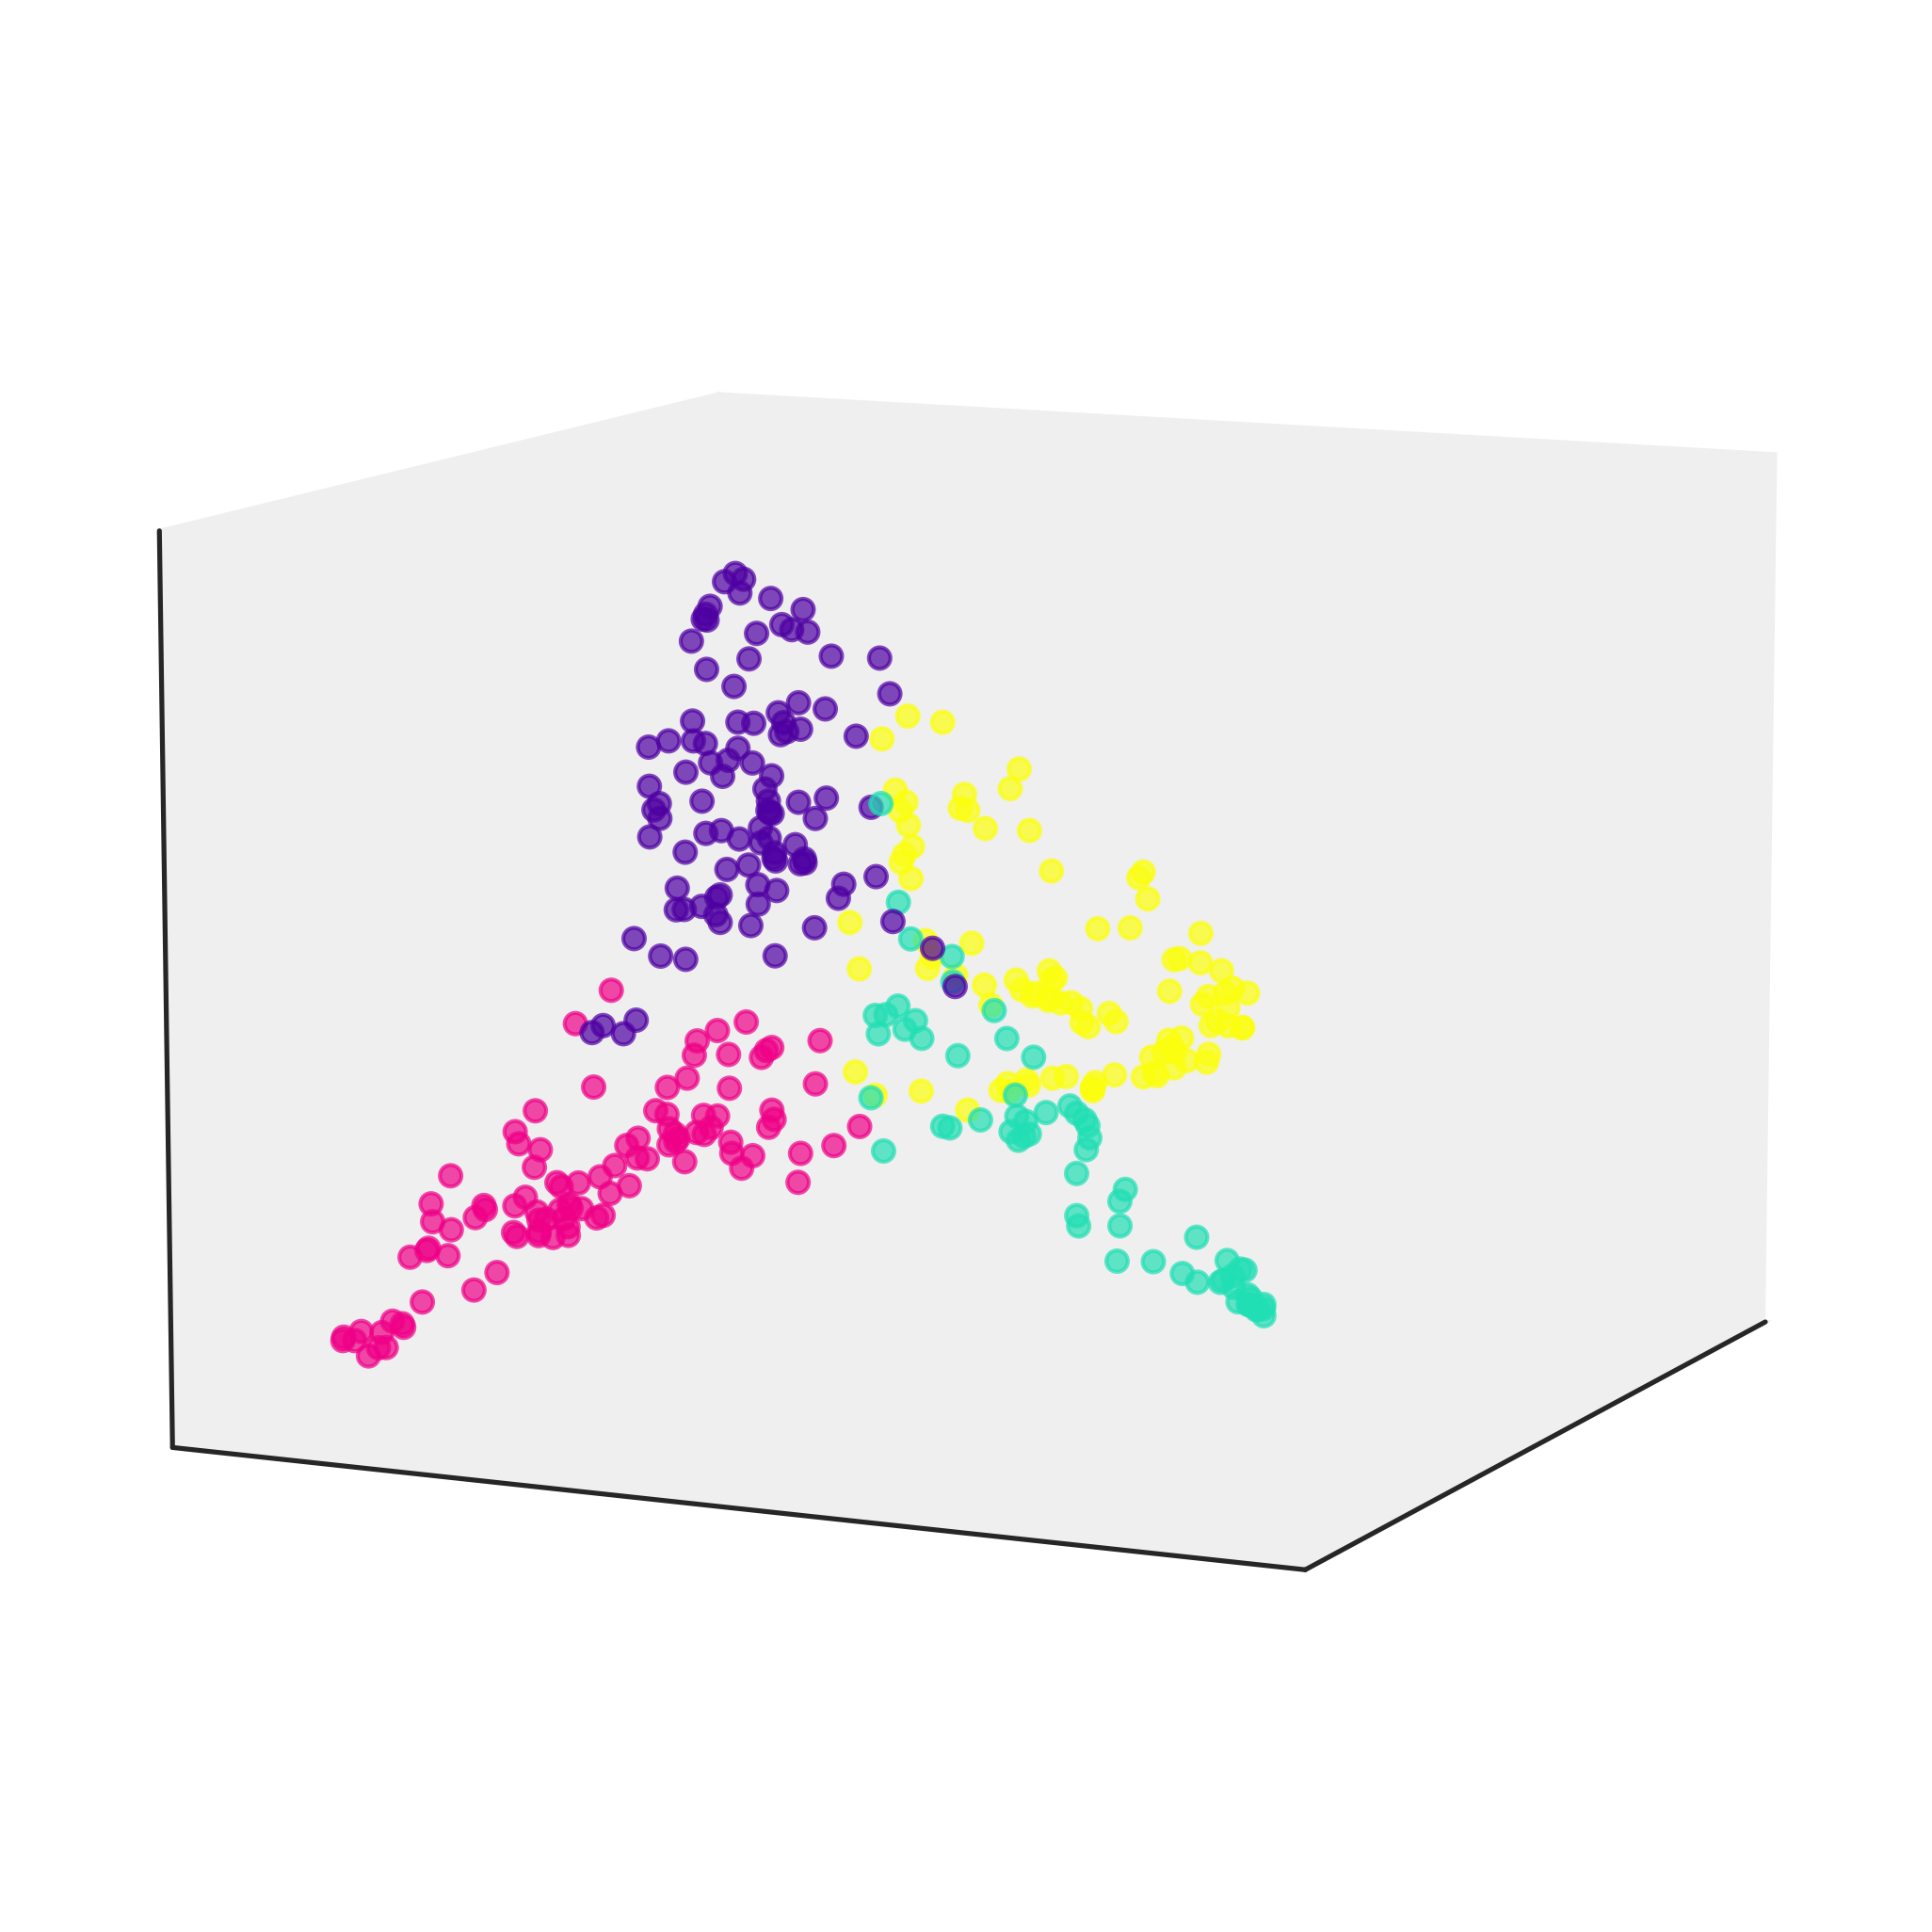

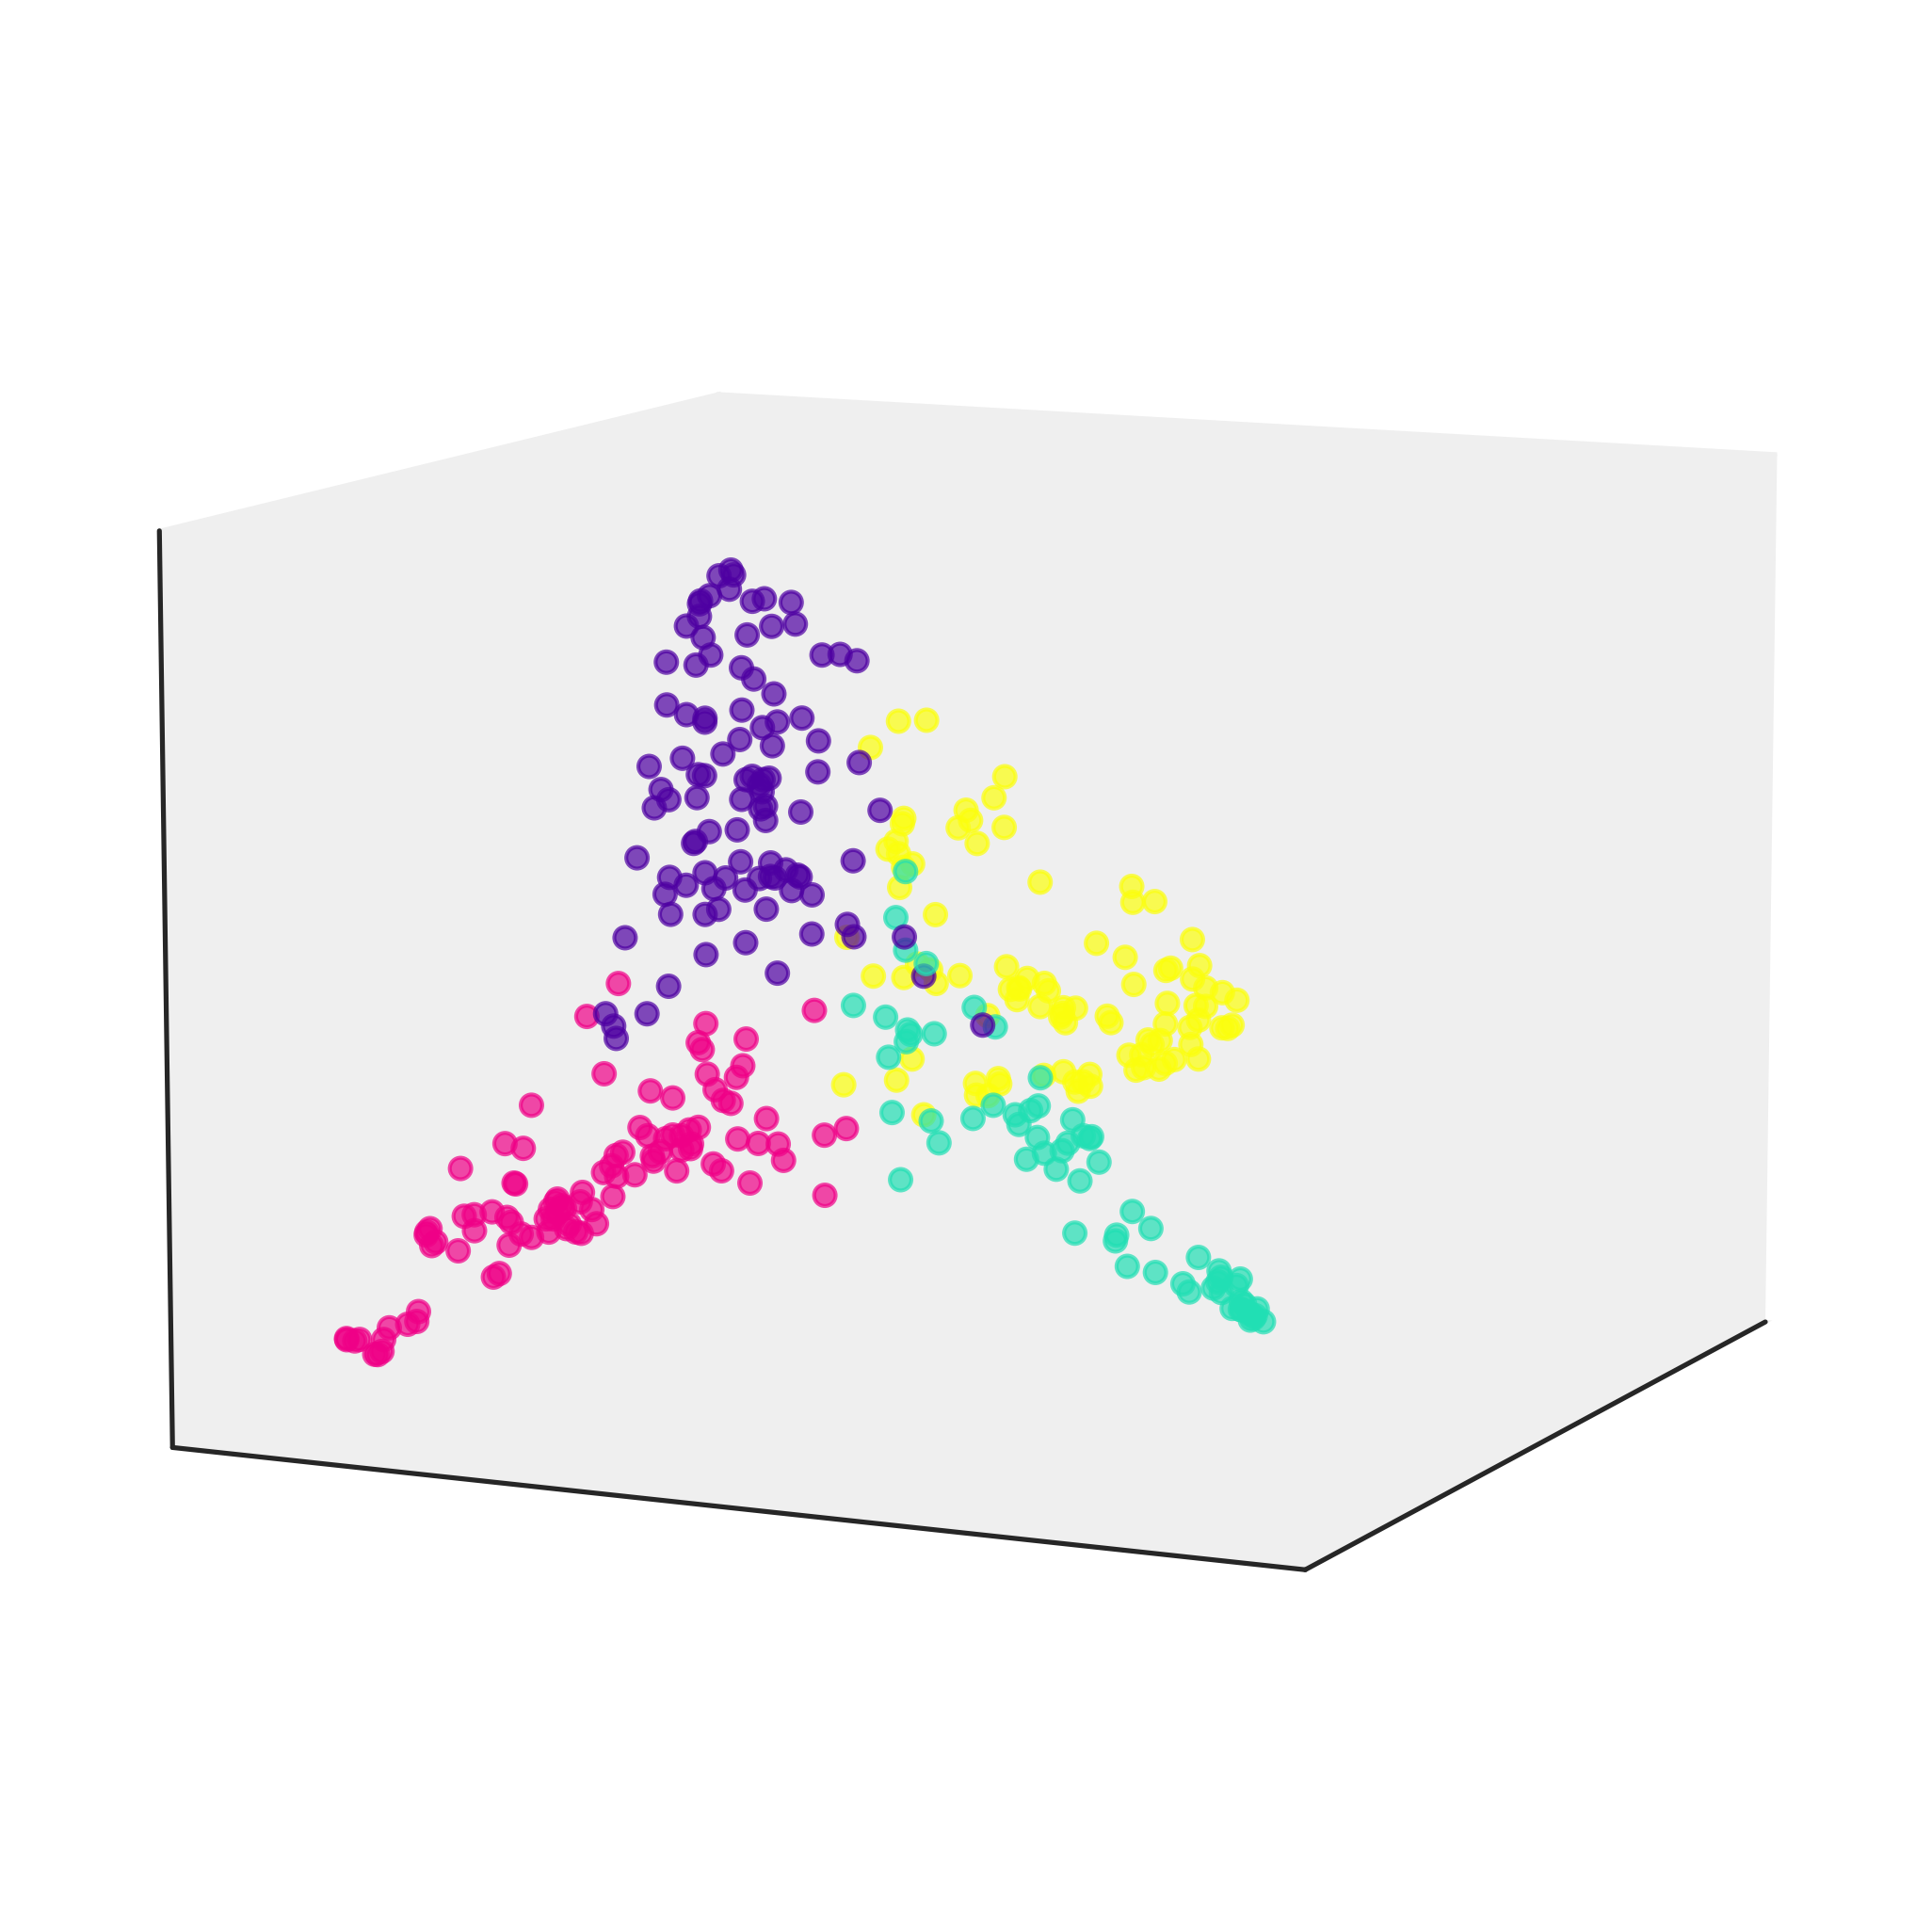

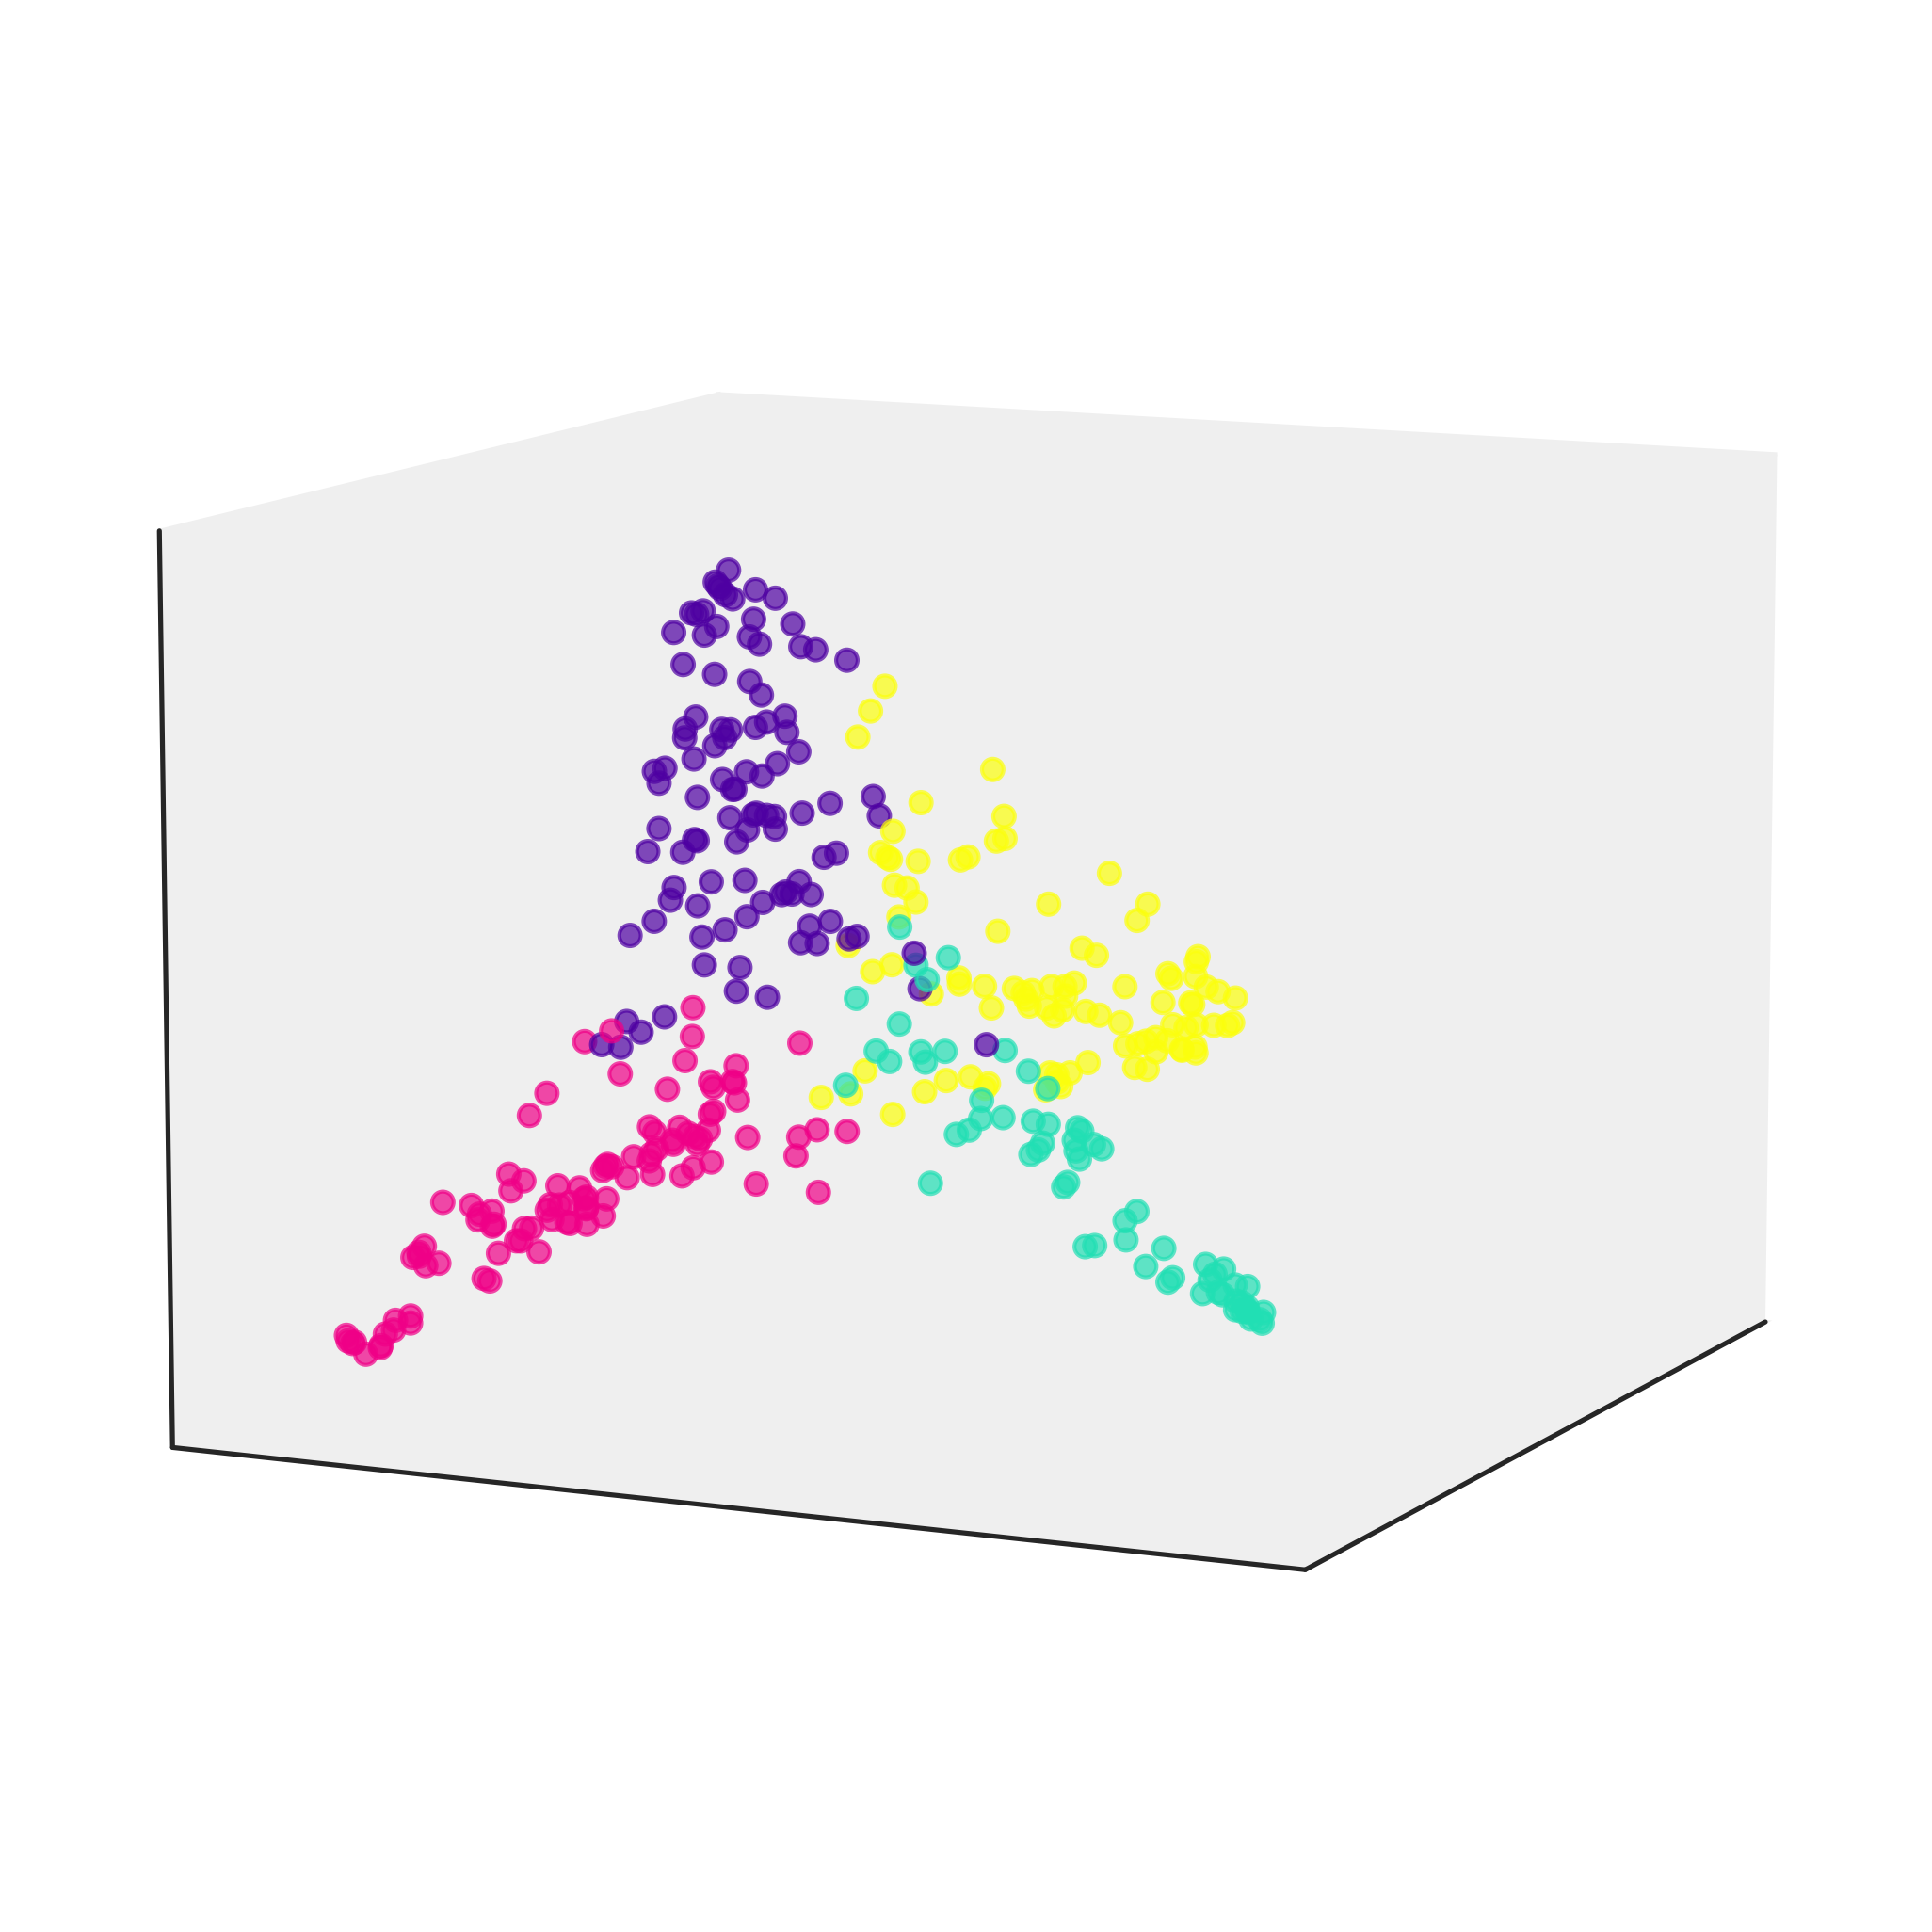

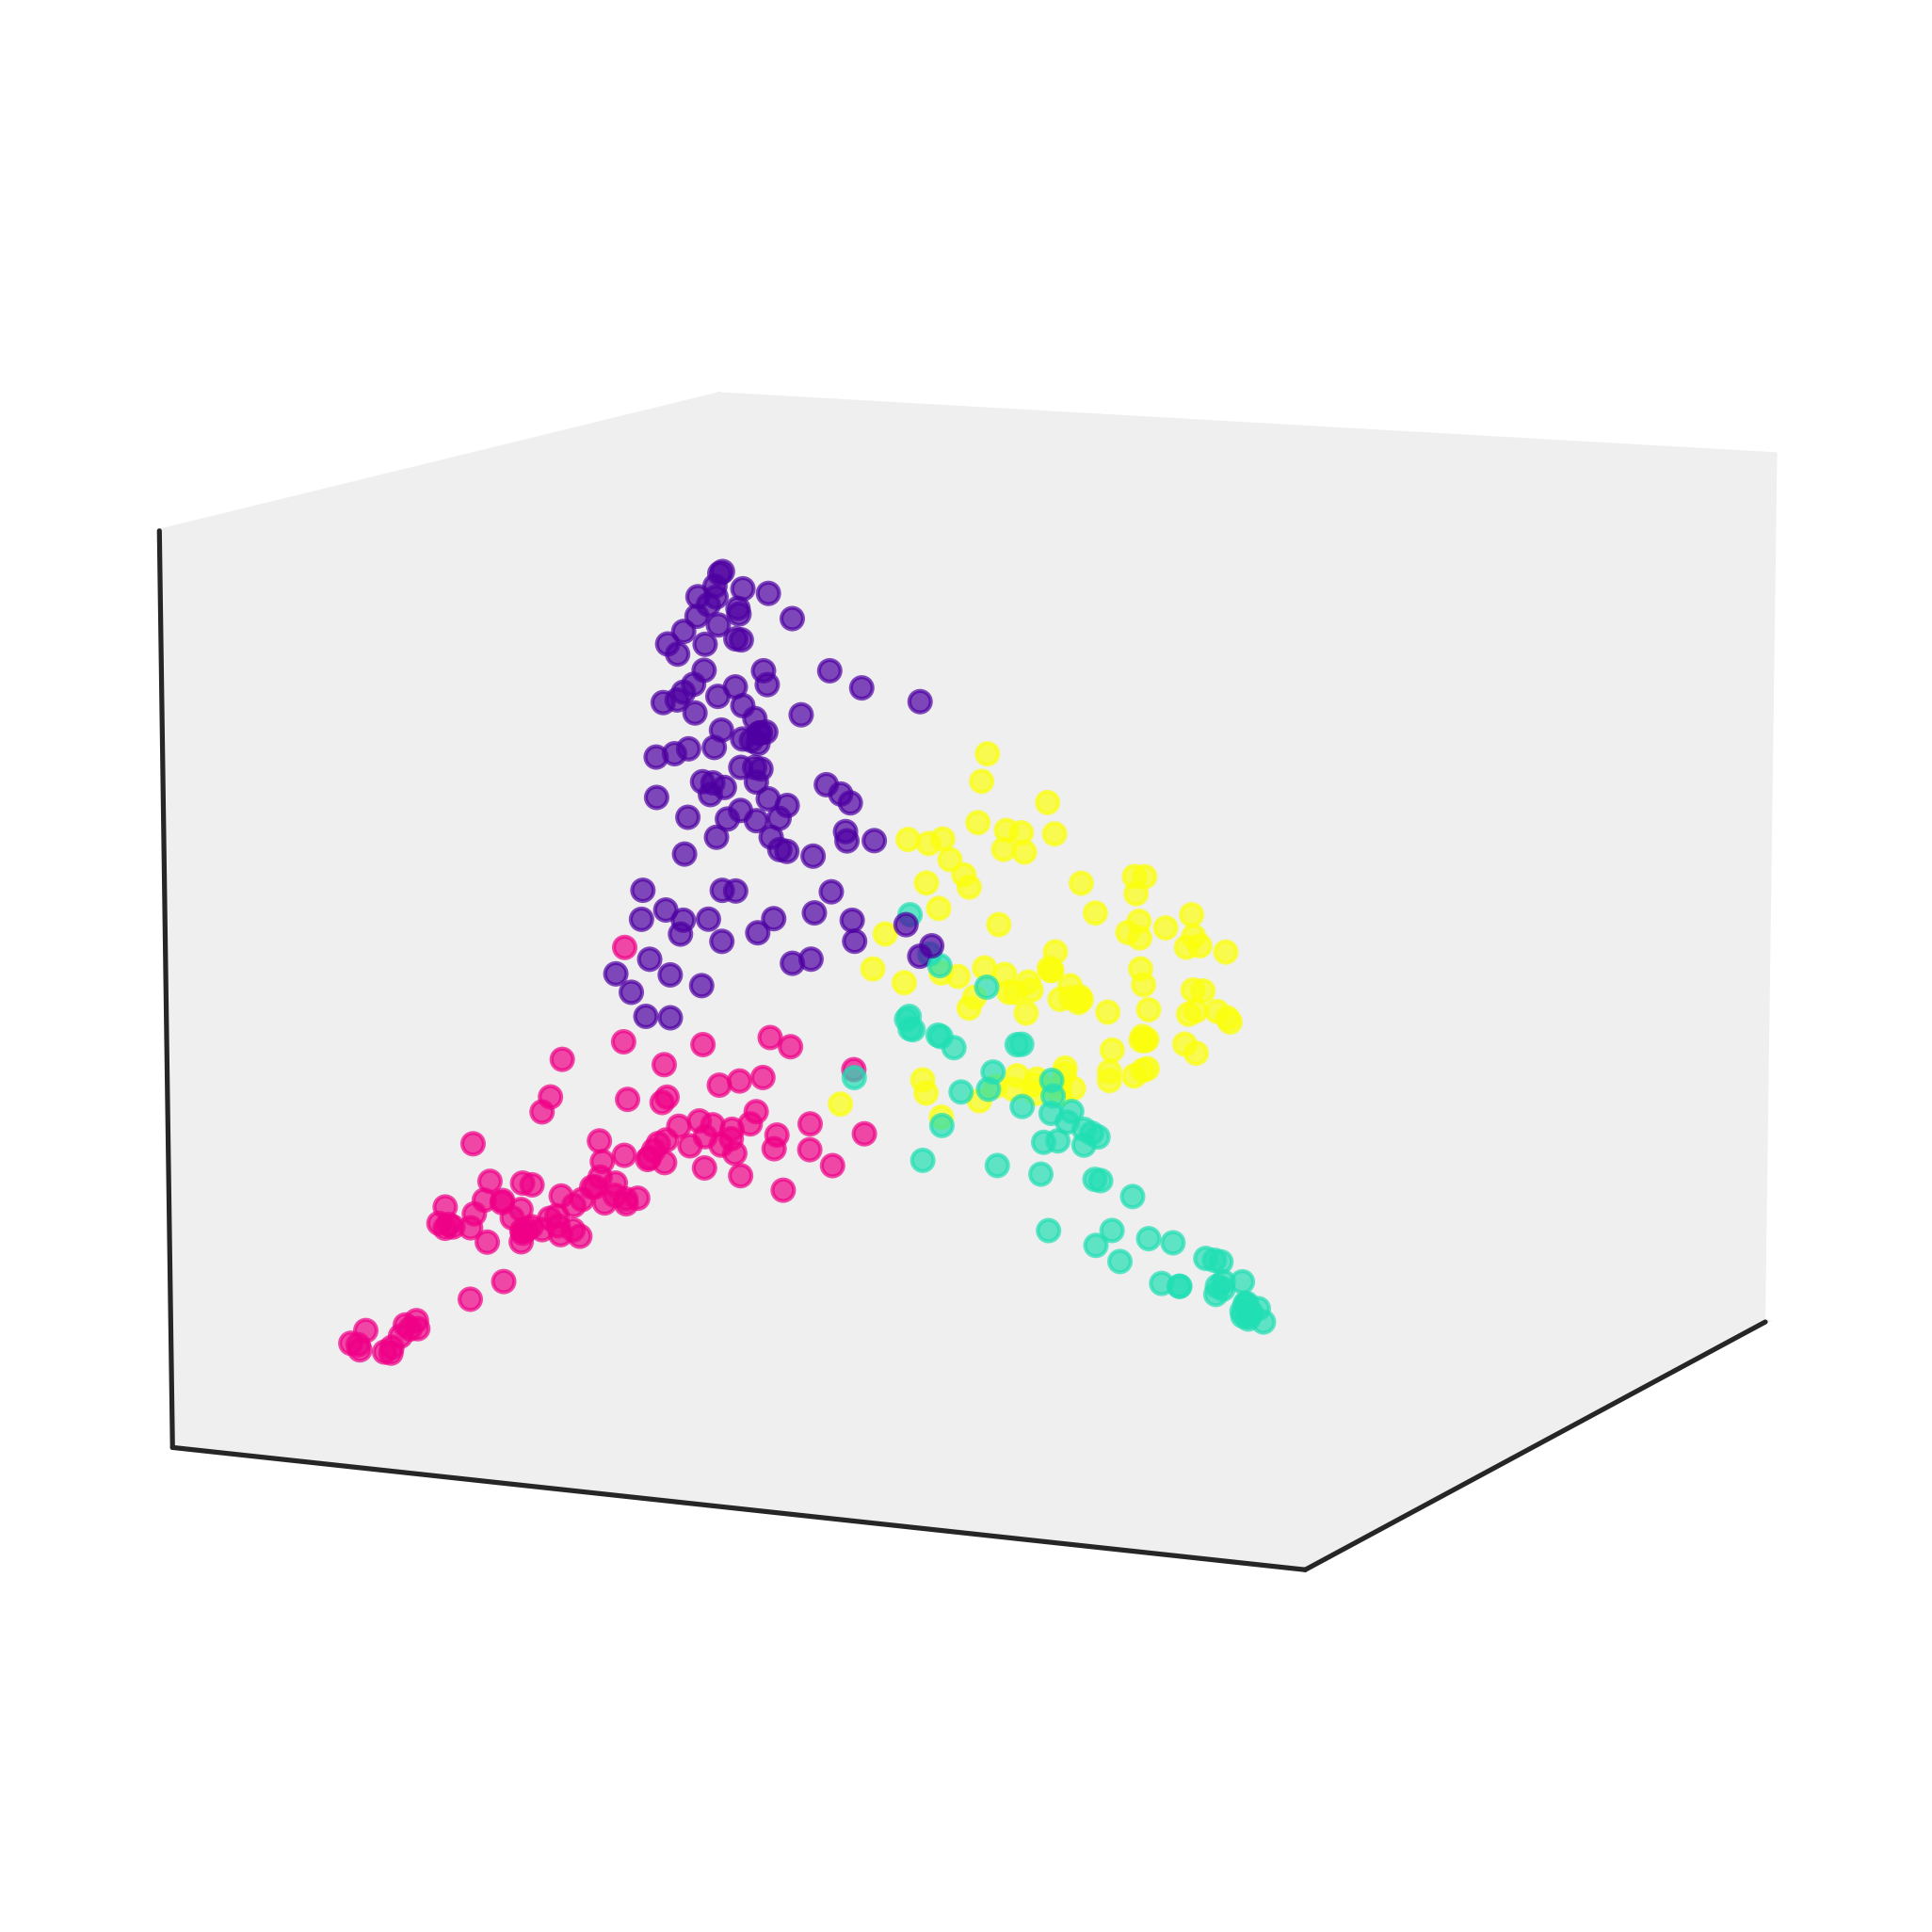

In [8]:
for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
               ['main_networks', 'replace_networks', 'suppress_networks', 'clear_networks']): 
               grad3d(i, 
                      outpath=None
                      #outpath = f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/{j}'
                     )

In [9]:
def grad3d(grad, y_angle=205, gradient=None, outpath=None):
    
    global df1 
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import seaborn as sns
    from matplotlib import animation

    sns.set(style='white', rc={'figure.figsize': (10, 7)})

    fig = plt.figure(dpi=300, facecolor='none')
    ax = fig.add_subplot(111, projection='3d')

    if gradient is not None:
        scat = ax.scatter3D(grad.iloc[:, 1], grad.iloc[:, 2], zs=grad.iloc[:, 3], alpha=0.8, c=grad.iloc[:, 2], cmap='jet')
    else:
        scat = ax.scatter(grad.iloc[:, 1], grad.iloc[:, 2], zs=grad.iloc[:, 3], s=30, c=colors, alpha=0.7)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, y_angle)

    # Set pane color to fully transparent
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Transparent
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Transparent
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # Transparent

    # Remove grid and axis lines
    ax.grid(False)
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make axis lines invisible
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make axis lines invisible
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make axis lines invisible

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    
    if outpath is not None:
        # Save as a PNG with a transparent background
        plt.savefig(outpath + '.png', transparent=True)
        
    

In [10]:
#for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
#               ['main_networks', 'replace_networks', 'suppress_networks', 'clear_networks']): 
#               grad3d(i, outpath = f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/{j}')

In [11]:
#for i,j in zip([main_grads_fc, replace_grads_fc, suppress_grads_fc, clear_grads_fc],
#               ['main_networks_fc', 'replace_networks_fc', 'suppress_networks_fc', 'clear_networks_fc']): 
#               grad3d(i, y_angle = 170, outpath = f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/{j}')

In [ ]:
def within_network_dispersion(grad, outpath=None):
    """
    Visualizes the within-network dispersion of subtypes in a 3D gradient space
    and optionally creates a rotating animation.

    Parameters:
    -----------
    grad : pandas.DataFrame
        A DataFrame containing gradient coordinates. The first column is assumed to be an index or identifier,
        and the subsequent columns represent the gradient dimensions (e.g., x, y, z).
        
    outpath : str, optional
        File path to save the output visualization and animation. If None, the plot is displayed but not saved.

    Global Dependencies:
    ---------------------
    df1 : pandas.DataFrame
        A DataFrame containing subtype information for each data point. The 'Subtype' column specifies the
        network subtype (e.g., 1 = VN, 2 = SMN, etc.).

    Returns:
    --------
    None
        Displays or saves the 3D visualization of network dispersion and optionally saves a rotating animation.
    """
    global df1  # Access the global DataFrame containing subtype information

    # Define the colors for each subtype (network)
    net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    colors = df1.Subtype.map({1: net_cols[0], 2: net_cols[1], 3: net_cols[2], 4: net_cols[3]})

    # Set the visualization style
    sns.set(style='white', rc={'figure.figsize': (10, 7)})

    # Create a 3D plot
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Identify indices for each subtype
    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    # Extract gradient data for each subtype
    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    # Compute mean coordinates for each subtype
    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    # Combine mean coordinates for all subtypes
    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    # Plot the individual gradient points
    plt.scatter(grad.iloc[:, 1], grad.iloc[:, 2], zs=grad.iloc[:, 3], s=30, c=colors, alpha=0.7)

    # Plot the mean points for each subtype
    plt.scatter(all_means[:, 0], all_means[:, 1], zs=all_means[:, 2],
                s=60, c=net_cols, alpha=1, edgecolors='black')

    # Remove axis labels and ticks for a cleaner visualization
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # Set the viewing angle for the 3D plot
    ax.view_init(10, 205)

    # Customize the axis planes to a neutral color
    pane_rgba = (239 / 255, 239 / 255, 239 / 255, 255 / 255)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)

    # Disable the grid for a cleaner look
    ax.grid(False)

    # Animation initialization function
    def init():
        """
        Sets the initial viewpoint for the 3D plot animation.
        """
        ax.view_init(elev=10., azim=0)
        return [fig]

    # Animation update function
    def animate(i):
        """
        Updates the azimuthal angle for each frame of the animation.
        """
        ax.view_init(elev=10., azim=i)
        return [fig]

    # Adjust the layout
    plt.draw()
    plt.tight_layout()

    # Save or display the plot and animation
    if outpath is not None:
        # Create and save the rotating animation as a GIF
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        writergif = animation.PillowWriter(fps=30)
        anim.save(f'{outpath}dispersion.gif', writer=writergif, savefig_kwargs={'facecolor': 'white'})

        # Save the static 3D visualization as a PNG
        fig.savefig(f'{outpath}dispersion_gradient_net.png', dpi=300, transparent=True)
    else:
        # Display the plot if no output path is specified
        plt.show()


In [12]:
def within_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
    net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    #net_cols = ['grey', 'grey', '#4E00A2', 'grey']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})
    
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    fx = all_means[:,0]
    fy = all_means[:,1]
    fz = all_means[:,2] 

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Add lines from VN parcels to VN mean
    vn_mask = df1['Subtype'] == 1
    vn_coords = noisy_grad.iloc[np.where(vn_mask)[0], 1:4].values
    vn_mean = all_means[0]
    for coord in vn_coords:
        line = np.array([coord, vn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2],
                c=net_cols[0], 
                alpha=0.5, lw=.8)

    # Add lines from SMN parcels to SMN mean
    smn_mask = df1['Subtype'] == 2
    smn_coords = noisy_grad.iloc[np.where(smn_mask)[0], 1:4].values
    smn_mean = all_means[1]
    for coord in smn_coords:
        line = np.array([coord, smn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[1], 
                alpha=0.5, lw=.8)
        
     # Add lines from FPCN parcels to FPCN mean
    fpcn_mask = df1['Subtype'] == 3
    fpcn_coords = noisy_grad.iloc[np.where(fpcn_mask)[0], 1:4].values
    fpcn_mean = all_means[2]
    for coord in fpcn_coords:
        line = np.array([coord, fpcn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[2], 
                alpha=0.5, lw=.8)

    # Add lines from DMN parcels to DMN mean
    dmn_mask = df1['Subtype'] == 4
    dmn_coords = noisy_grad.iloc[np.where(dmn_mask)[0], 1:4].values
    dmn_mean = all_means[3]
    for coord in dmn_coords:
        line = np.array([coord, dmn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[3], 
                alpha=.5, lw=.8,
               )
        
    scat = plt.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, c = colors, alpha=0.7)
    
    scat_means = plt.scatter(all_means[:,0], all_means[:,1], zs=all_means[:,2],
                             s=60, c = net_cols, alpha=1,  edgecolors='black')

    plt.set_edgecolors = plt.set_facecolors = lambda *args:None
    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Get rid of colored axes planes
    # First remove fill
    pane_rbga = (239/255, 239/255, 239/255, 255/255)

    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        #anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        #writergif = animation.PillowWriter(fps=30)
        #anim.save(f'{outpath}dispersion.gif',writer=writergif, savefig_kwargs={'facecolor':'white'})
        plt.show()
        fig.savefig(f'{outpath}dispersion_gradient_net.png', dpi=300, transparent=True)


In [2]:
for i,j in zip([main_grads],['main_networks_disp']):
    within_network_dispersion(i,
                              outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/', 
                              #outpath = None,
                              noise_level=0)

NameError: name 'main_grads' is not defined

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd

def within_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
    fpcn_color = '#4E00A2'  # FPCN color
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices and coordinates for FPCN only
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T

    # Calculate FPCN mean coordinates for line plotting
    fpcn_des = fpcn_mds.describe().T[['mean']]
    fpcn_mean = np.array([fpcn_des['mean'][0], fpcn_des['mean'][1], fpcn_des['mean'][2]])

    # Generate noise for FPCN points if needed
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Define FPCN points with noise
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values

    # Set axis limits based only on FPCN coordinates
    x_lim = [fpcn_coords[:, 0].min(), fpcn_coords[:, 0].max()]
    y_lim = [fpcn_coords[:, 1].min(), fpcn_coords[:, 1].max()]
    z_lim = [fpcn_coords[:, 2].min(), fpcn_coords[:, 2].max()]
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)

    # Plot lines from FPCN parcels to FPCN mean
    for coord in fpcn_coords:
        line = np.array([coord, fpcn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], c=fpcn_color, alpha=0.5, lw=0.8)

    # Scatter plot for FPCN points
    ax.scatter(fpcn_coords[:, 0], fpcn_coords[:, 1], fpcn_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)
    
    # Plot the FPCN mean
    ax.scatter(fpcn_mean[0], fpcn_mean[1], fpcn_mean[2], s=160, c=fpcn_color, alpha=1, edgecolors='black')

    # Remove tick labels and turn off axes visibility
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()  # Turns off the axes, removing all spines and borders

    ax.view_init(10, 205)

    # Remove colored axes planes for clarity
    pane_rgba = (239/255, 239/255, 239/255, 1)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)
    
    ax.grid(False)
    

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)


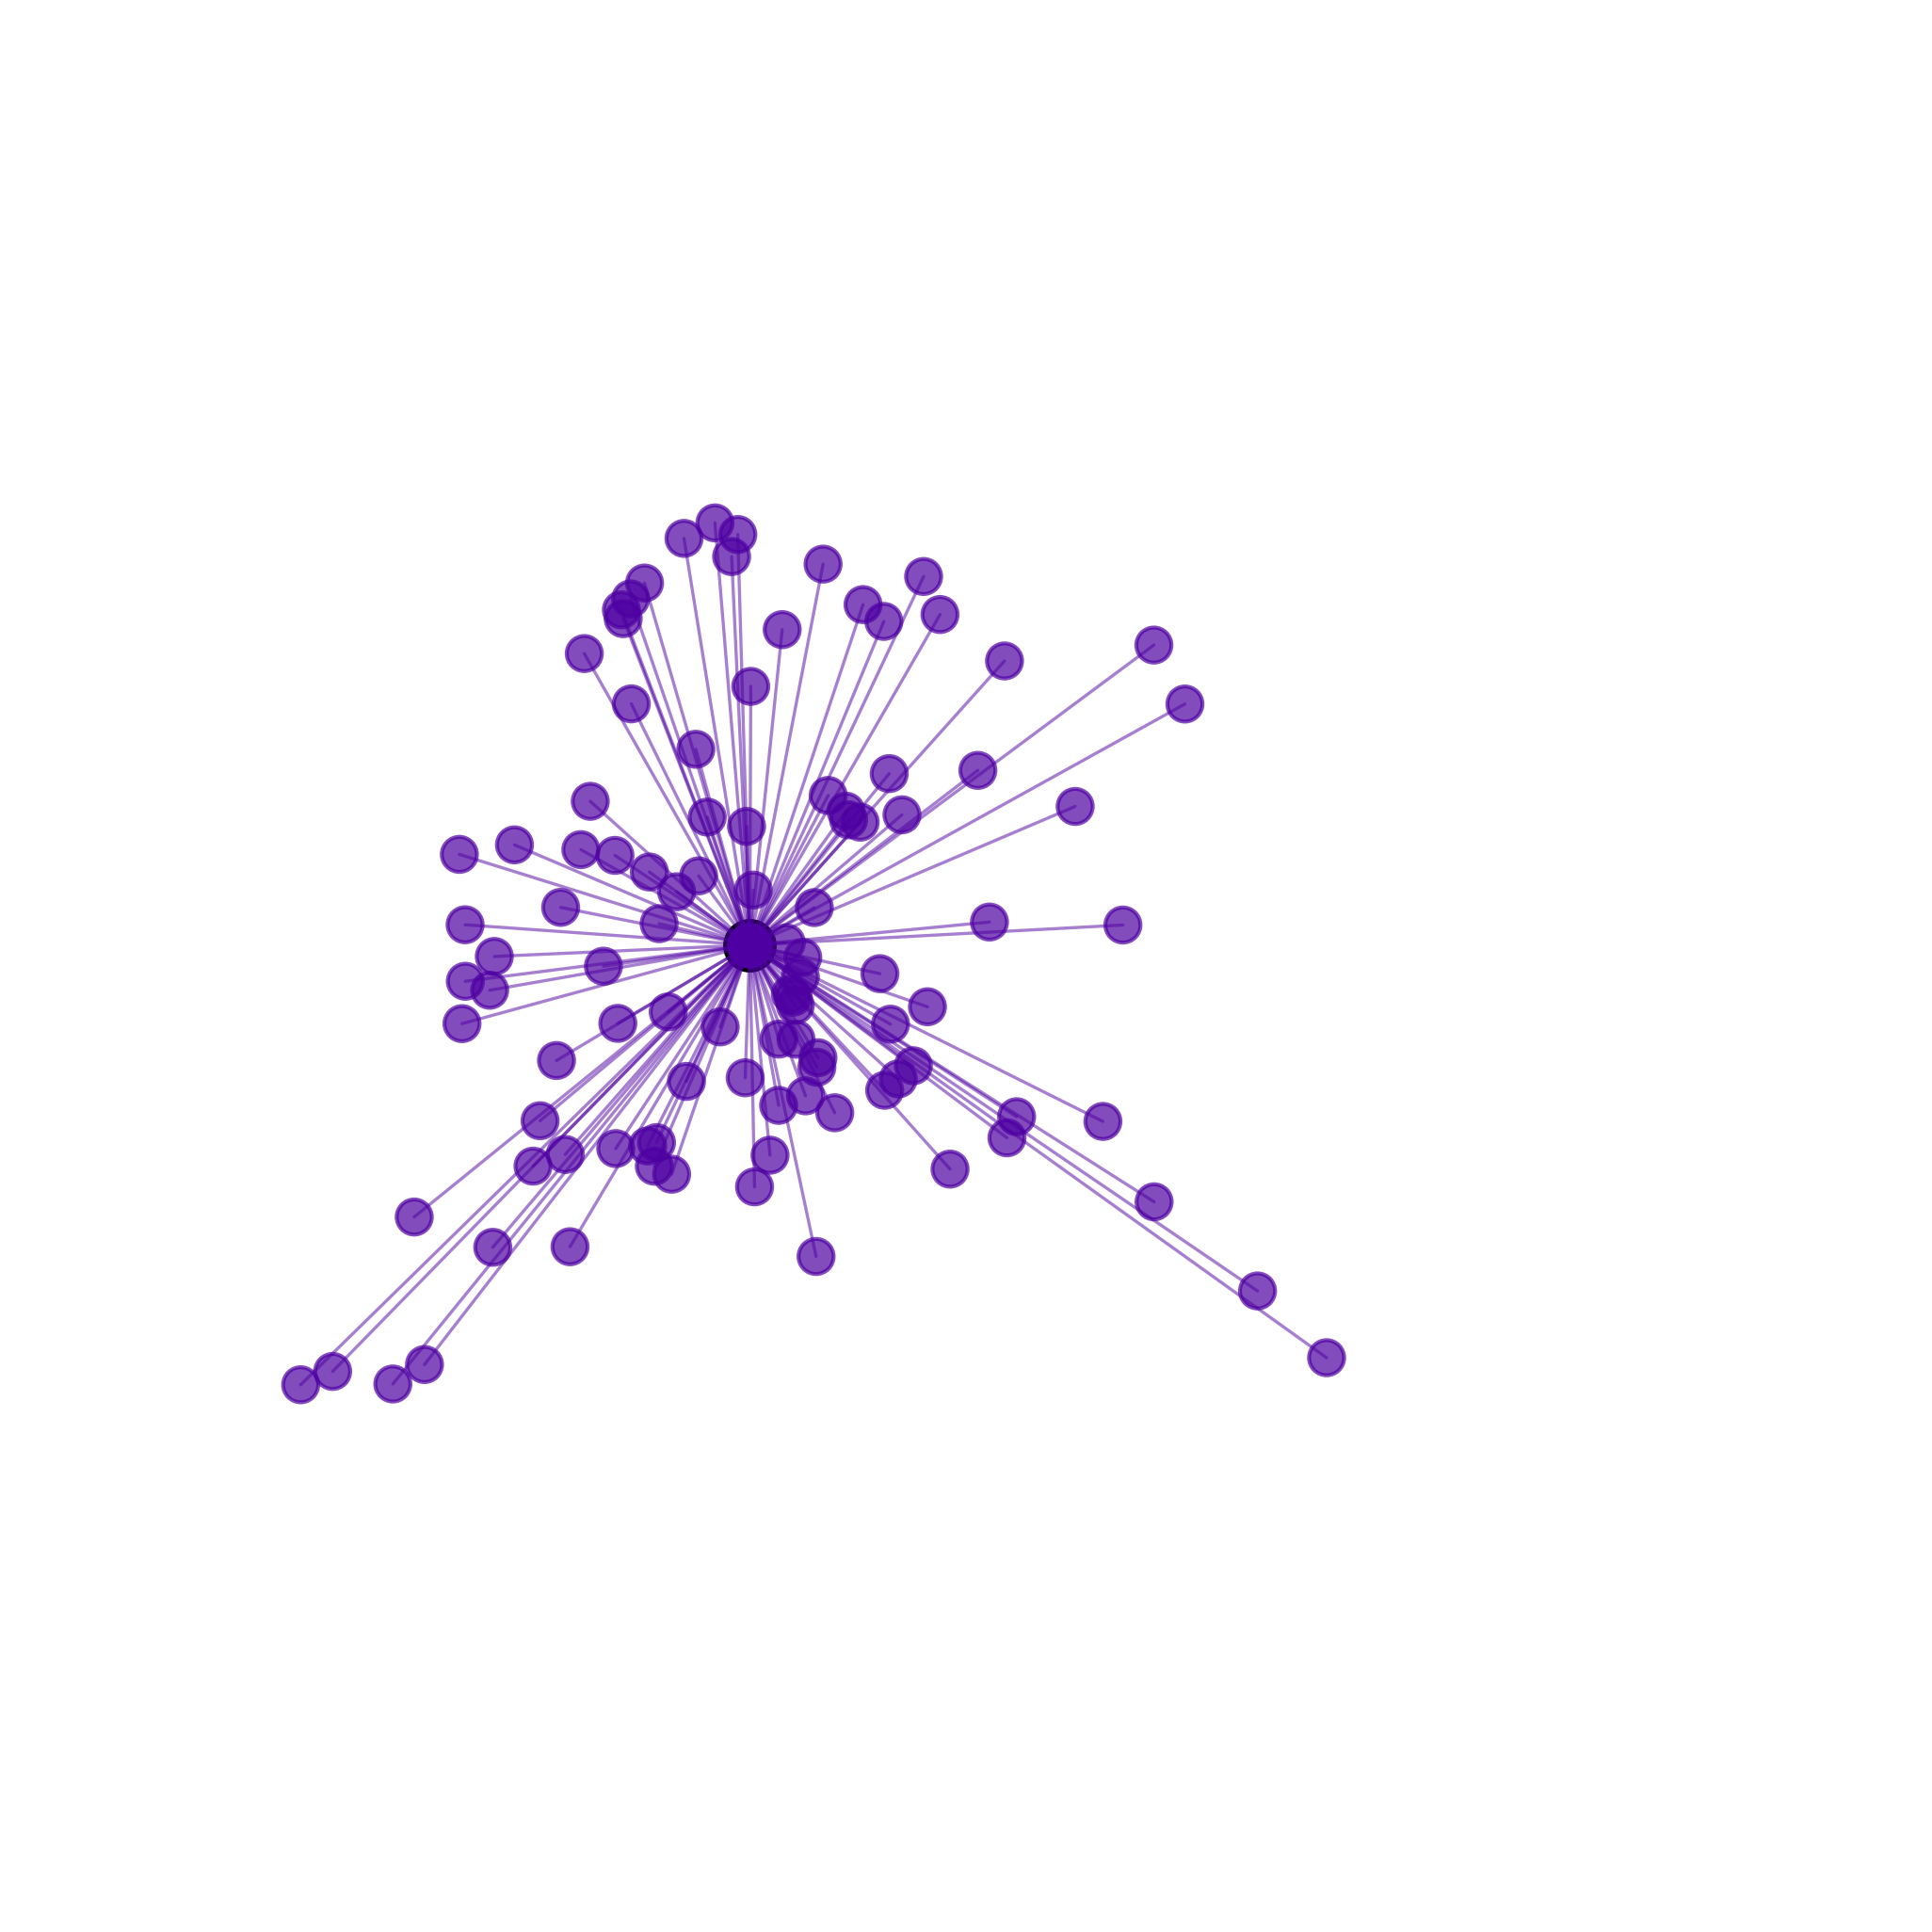

In [23]:
for i,j in zip([main_grads],['main_networks_disp']):
    within_network_dispersion(i,
                              outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_only_', 
                              #outpath = None,
                              noise_level=0)

In [24]:
#df1.query('Subtype == 4')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd

# Define the Arrow3D class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Function to draw arrows using Arrow3D with a larger arrowhead
def draw_3d_arrow(ax, start, end, color='blue', shorten_factor=.9):
    # Modify the end point to shorten the arrow
    end_short = start + shorten_factor * (end - start)
    # Increase the mutation_scale for a larger arrowhead
    arrow_prop_dict = dict(mutation_scale=30,  # Larger value for bigger arrowhead
                           arrowstyle='simple', 
                           color=color, 
                           lw=0, 
                           shrinkA=0, 
                           shrinkB=0, 
                           alpha=0.4)
    a = Arrow3D([start[0], end_short[0]], [start[1], end_short[1]], [start[2], end_short[2]], **arrow_prop_dict)
    ax.add_artist(a)

# Updated within_network_dispersion function with shortened arrows
def within_network_dispersion(grad, outpath=None, noise_level=0.0, num_points=20):
    global df1 
    # Only keep the FPCN color
    fpcn_color = '#4E00A2'
    
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Only focus on FPCN
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()

    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T

    fpcn_des = fpcn_mds.describe().T[['mean']]

    all_x_mean = np.array([fpcn_des['mean'][0]]).flatten()
    all_y_mean = np.array([fpcn_des['mean'][1]]).flatten()
    all_z_mean = np.array([fpcn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Get FPCN coordinates for scaling
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values

    # Select 10 evenly spaced points for the arrows
    indices = np.linspace(0, len(fpcn_coords) - 1, num_points, dtype=int)
    selected_coords = fpcn_coords[indices]

    # Draw 3D arrows for the selected FPCN points (arrows go from the center/mean to points but stop short)
    def ref_plot_arrows(selected_coords, mean, color):
        for coord in selected_coords:
            # Draw shortened arrows (90% of the way to the point)
            draw_3d_arrow(ax, mean, coord, color=color, shorten_factor=.9)
        
    # Plot only the selected FPCN points and arrows from the center
    ref_plot_arrows(selected_coords, all_means[0], fpcn_color)

    # Scatter the noisy FPCN points (the original scatter points, but only the selected points)
    ax.scatter(selected_coords[:, 0], selected_coords[:, 1], selected_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)

    # Set axis limits based on FPCN data to avoid cornering and ensure centering
    x_min, x_max = np.min(fpcn_coords[:, 0]), np.max(fpcn_coords[:, 0])
    y_min, y_max = np.min(fpcn_coords[:, 1]), np.max(fpcn_coords[:, 1])
    z_min, z_max = np.min(fpcn_coords[:, 2]), np.max(fpcn_coords[:, 2])

    # Adjust axis limits to make the plot centered
    center_x, center_y, center_z = all_means[0]
    range_x = (x_max - x_min) / 2
    range_y = (y_max - y_min) / 2
    range_z = (z_max - z_min) / 2

    ax.set_xlim(center_x - range_x, center_x + range_x)
    ax.set_ylim(center_y - range_y, center_y + range_y)
    ax.set_zlim(center_z - range_z, center_z + range_z)

    # Remove tick labels for a cleaner look
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 135)

    # Get rid of colored axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)

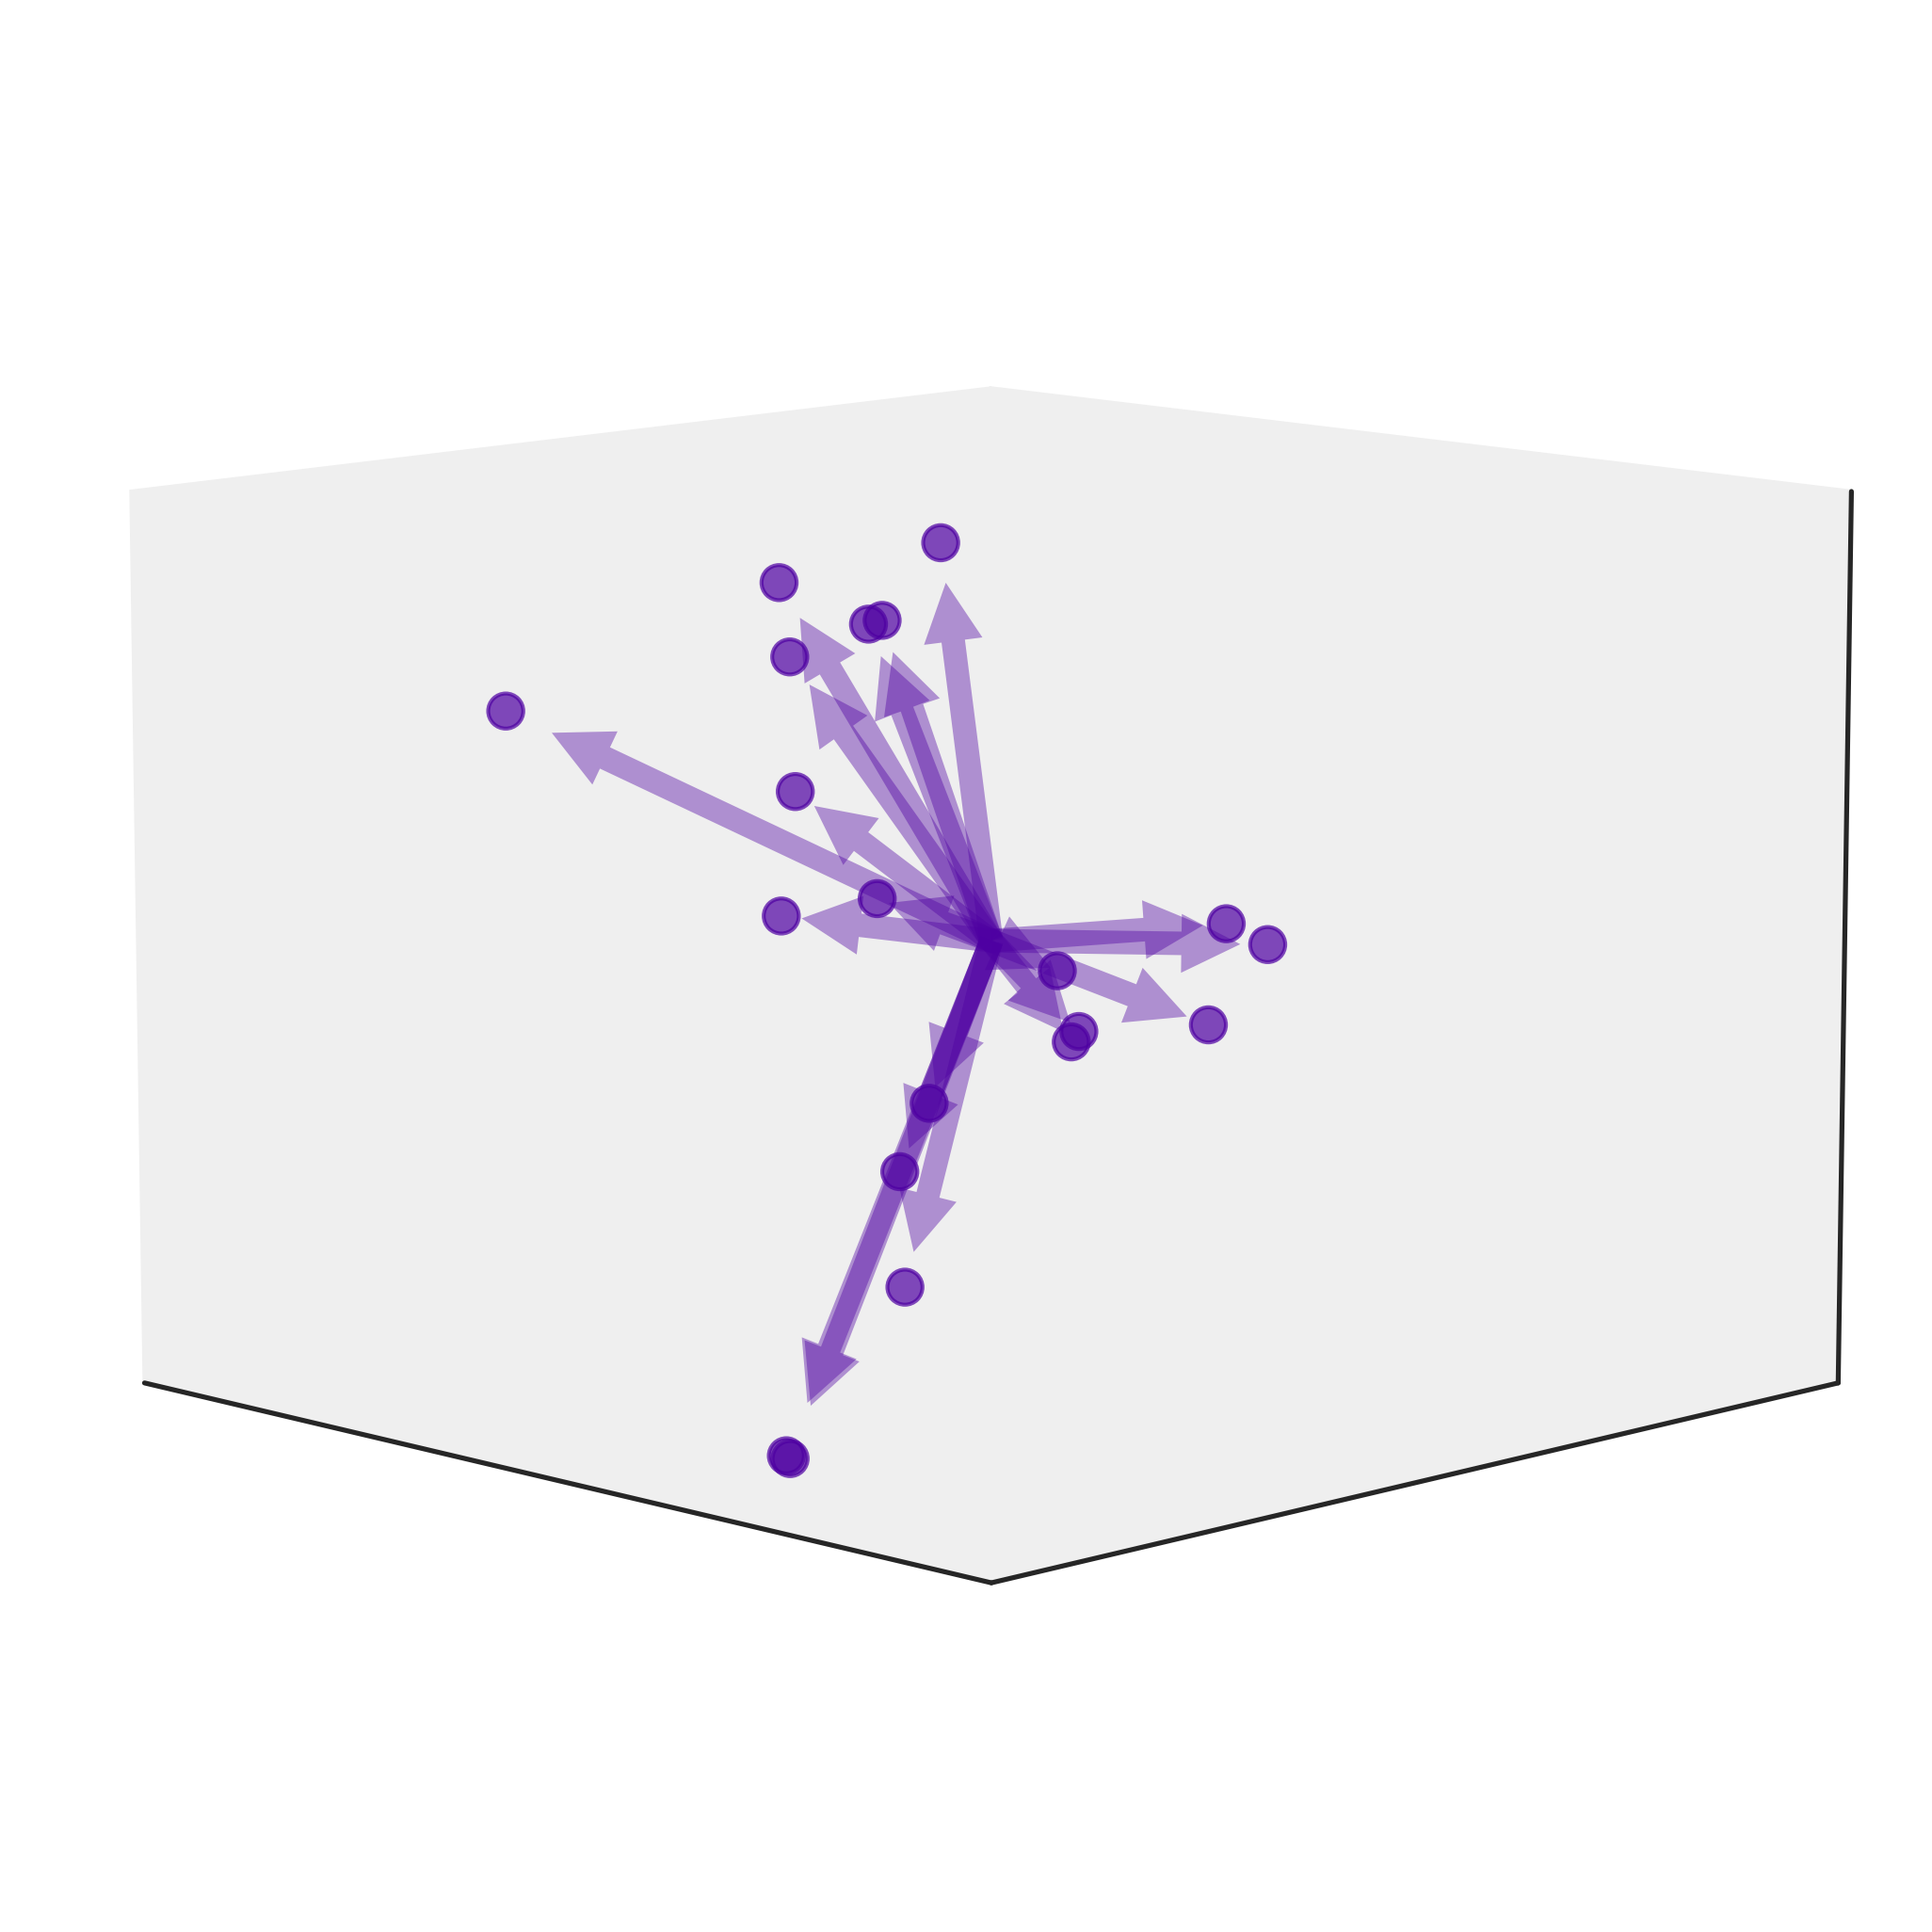

In [26]:
for i,j in zip([main_grads],['main_networks_disp']):
    within_network_dispersion(i,
                              outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_', 
                              #outpath = None,
                              noise_level=0)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd

# Define the Arrow3D class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Function to draw arrows using Arrow3D with a larger arrowhead
def draw_3d_arrow(ax, start, end, color='blue', shorten_factor=.9):
    end_short = start + shorten_factor * (end - start)
    arrow_prop_dict = dict(mutation_scale=30, arrowstyle='simple', color=color, lw=0, shrinkA=0, shrinkB=0, alpha=0.4)
    a = Arrow3D([start[0], end_short[0]], [start[1], end_short[1]], [start[2], end_short[2]], **arrow_prop_dict)
    ax.add_artist(a)

# Updated within_network_dispersion function using Fibonacci sphere for even distribution
def within_network_dispersion(grad, outpath=None, noise_level=0.0, num_points=20, radius=0.8, seed=None):
    global df1 
    fpcn_color = '#4E00A2'
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    # Set random seed and print it
    if seed is None:
        seed = np.random.randint(0, 10000)  # Generate a random seed if none is provided
    np.random.seed(seed)
    print(f"Random seed used: {seed}")

    # Adjust radius if there is no noise
    if noise_level == 0:
        radius = 0.3  # Use a much smaller radius when noise is zero to visibly compact the points
    print(f"Radius used: {radius}")

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Identify FPCN indices and data points
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    fpcn_coords = grad.iloc[fpcn_index, 1:4].values

    # Calculate the center of the FPCN points
    center_point = np.mean(fpcn_coords, axis=0)

    # Use Fibonacci sphere method to evenly distribute points around the sphere
    indices = np.arange(0, num_points, dtype=float) + 0.5
    phi = np.arccos(1 - 2 * indices / num_points)
    theta = np.pi * (1 + 5**0.5) * indices

    # Calculate 3D spherical coordinates with adjusted radius
    x = center_point[0] + radius * np.sin(phi) * np.cos(theta)
    y = center_point[1] + radius * np.sin(phi) * np.sin(theta)
    z = center_point[2] + radius * np.cos(phi)
    spherical_coords = np.column_stack((x, y, z))

    # Apply noise only if noise_level is greater than zero
    if noise_level > 0:
        noisy_coords = spherical_coords + np.random.normal(0, noise_level, spherical_coords.shape)
    else:
        noisy_coords = spherical_coords

    # Set axis limits based on the radius to ensure points remain within bounds
    x_lim = y_lim = z_lim = radius * 1.2
    ax.set_xlim(center_point[0] - x_lim, center_point[0] + x_lim)
    ax.set_ylim(center_point[1] - y_lim, center_point[1] + y_lim)
    ax.set_zlim(center_point[2] - z_lim, center_point[2] + z_lim)

    # Clip noisy coordinates to stay within axis limits
    noisy_coords[:, 0] = np.clip(noisy_coords[:, 0], center_point[0] - x_lim, center_point[0] + x_lim)
    noisy_coords[:, 1] = np.clip(noisy_coords[:, 1], center_point[1] - y_lim, center_point[1] + y_lim)
    noisy_coords[:, 2] = np.clip(noisy_coords[:, 2], center_point[2] - z_lim, center_point[2] + z_lim)

    # Draw 3D arrows from the center to the spherical coordinates
    def ref_plot_arrows(selected_coords, mean, color):
        for coord in selected_coords:
            draw_3d_arrow(ax, mean, coord, color=color, shorten_factor=.9)

    # Plot arrows and scatter the circularly distributed FPCN points
    ref_plot_arrows(noisy_coords, center_point, fpcn_color)
    ax.scatter(noisy_coords[:, 0], noisy_coords[:, 1], noisy_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)

    # Customize appearance for clarity
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(10, 205)
    ax.w_xaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.w_yaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.w_zaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)



Random seed used: 2559
Radius used: 0.8


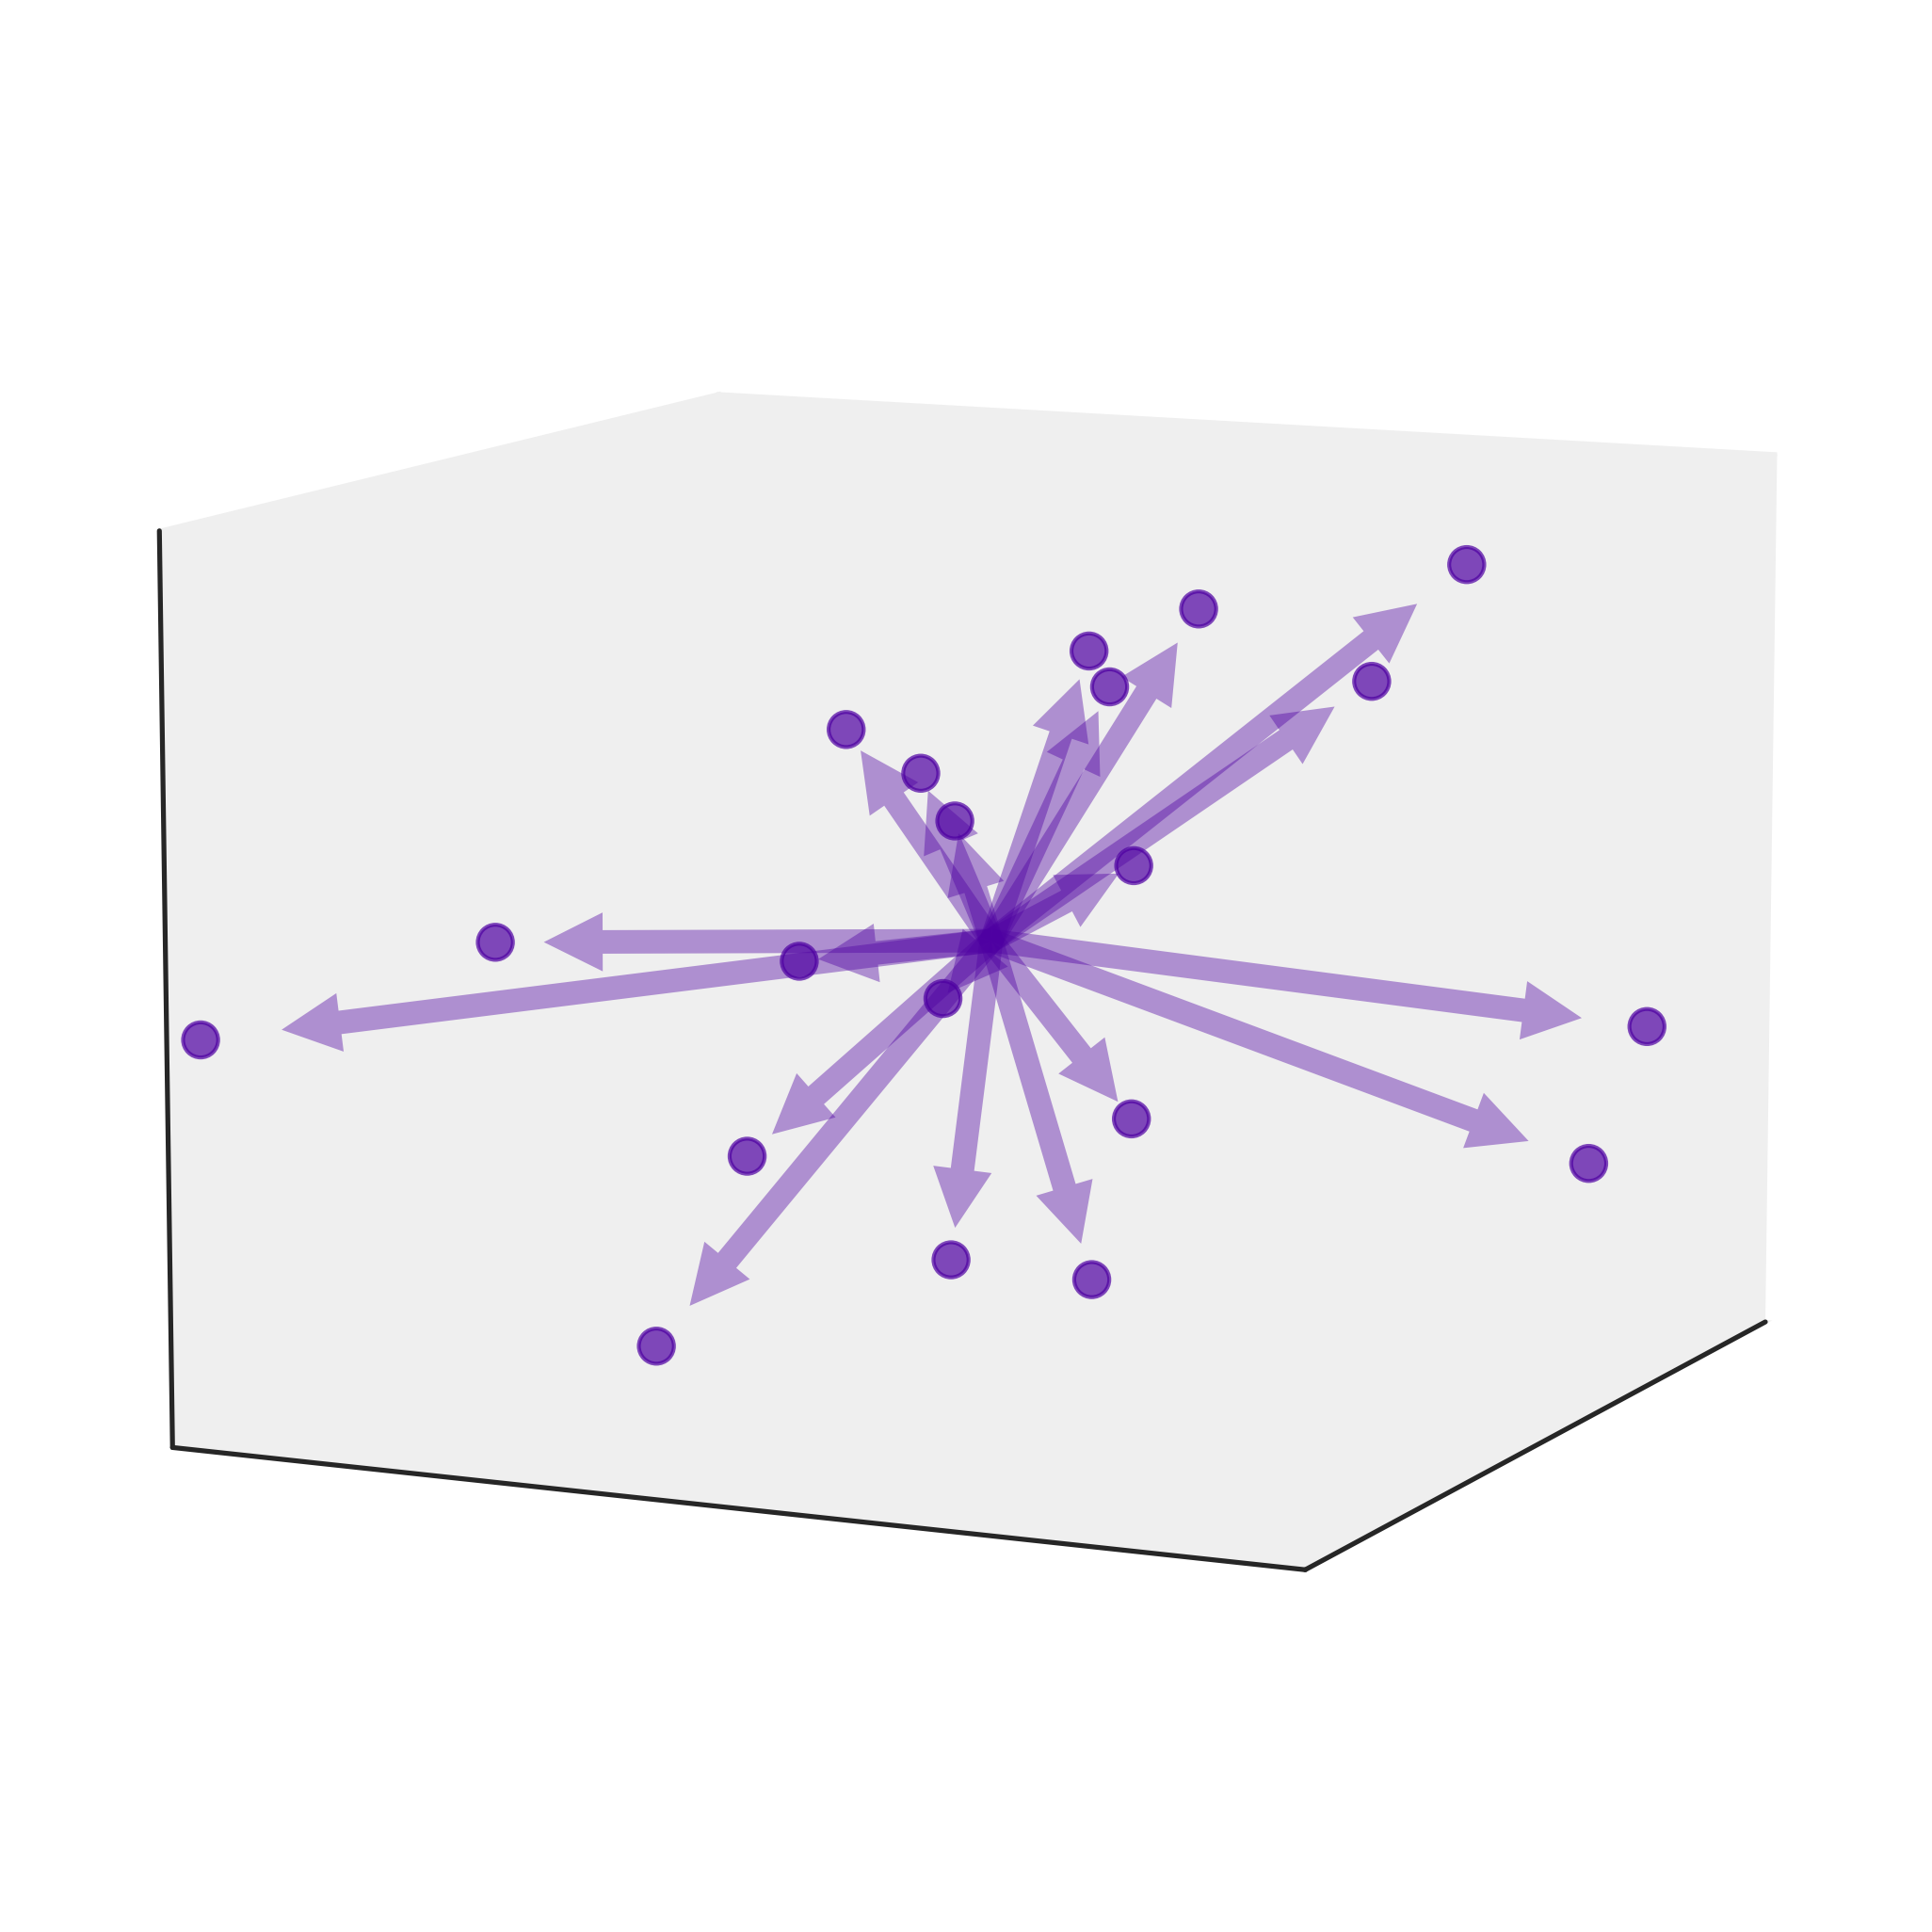

In [28]:
for i,j in zip([main_grads],['main_networks_disp']):
    within_network_dispersion(i,
                              outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_noise', 
                              #outpath = None,
                              noise_level=0.4)

#seed = 7

In [29]:
# within_network_dispersion function with distance_factor for closer points
def within_network_dispersion(grad, outpath=None, noise_level=0.0, num_points=20, radius=0.8, distance_factor=1, seed=None):
    global df1 
    fpcn_color = '#4E00A2'
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    # Set random seed and print it
    if seed is None:
        seed = np.random.randint(0, 10000)  # Generate a random seed if none is provided
    np.random.seed(seed)
    print(f"Random seed used: {seed}")

    # Adjust radius if there is no noise
    if noise_level == 0:
        radius = radius * distance_factor  # Scale radius by distance factor for closer points
    print(f"Radius used: {radius}")

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Identify FPCN indices and data points
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    fpcn_coords = grad.iloc[fpcn_index, 1:4].values

    # Calculate the center of the FPCN points
    center_point = np.mean(fpcn_coords, axis=0)

    # Use Fibonacci sphere method to evenly distribute points around the sphere
    indices = np.arange(0, num_points, dtype=float) + 0.5
    phi = np.arccos(1 - 2 * indices / num_points)
    theta = np.pi * (1 + 5**0.5) * indices

    # Calculate 3D spherical coordinates with adjusted radius
    x = center_point[0] + radius * np.sin(phi) * np.cos(theta)
    y = center_point[1] + radius * np.sin(phi) * np.sin(theta)
    z = center_point[2] + radius * np.cos(phi)
    spherical_coords = np.column_stack((x, y, z))

    # Apply noise only if noise_level is greater than zero
    if noise_level > 0:
        noisy_coords = spherical_coords + np.random.normal(0, noise_level, spherical_coords.shape)
    else:
        noisy_coords = spherical_coords

    # Set axis limits based on the radius to ensure points remain within bounds
    x_lim = y_lim = z_lim = radius * 2
    ax.set_xlim(center_point[0] - x_lim, center_point[0] + x_lim)
    ax.set_ylim(center_point[1] - y_lim, center_point[1] + y_lim)
    ax.set_zlim(center_point[2] - z_lim, center_point[2] + z_lim)

    # Clip noisy coordinates to stay within axis limits
    noisy_coords[:, 0] = np.clip(noisy_coords[:, 0], center_point[0] - x_lim, center_point[0] + x_lim)
    noisy_coords[:, 1] = np.clip(noisy_coords[:, 1], center_point[1] - y_lim, center_point[1] + y_lim)
    noisy_coords[:, 2] = np.clip(noisy_coords[:, 2], center_point[2] - z_lim, center_point[2] + z_lim)

    # Draw 3D arrows from the center to the spherical coordinates
    def ref_plot_arrows(selected_coords, mean, color):
        for coord in selected_coords:
            draw_3d_arrow(ax, mean, coord, color=color, shorten_factor=.9)

    # Plot arrows and scatter the circularly distributed FPCN points
    ref_plot_arrows(noisy_coords, center_point, fpcn_color)
    ax.scatter(noisy_coords[:, 0], noisy_coords[:, 1], noisy_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)

    # Customize appearance for clarity
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.view_init(10, 205)
    ax.w_xaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.w_yaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.w_zaxis.set_pane_color((239/255, 239/255, 239/255, 255/255))
    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)


Random seed used: 7014
Radius used: 0.8


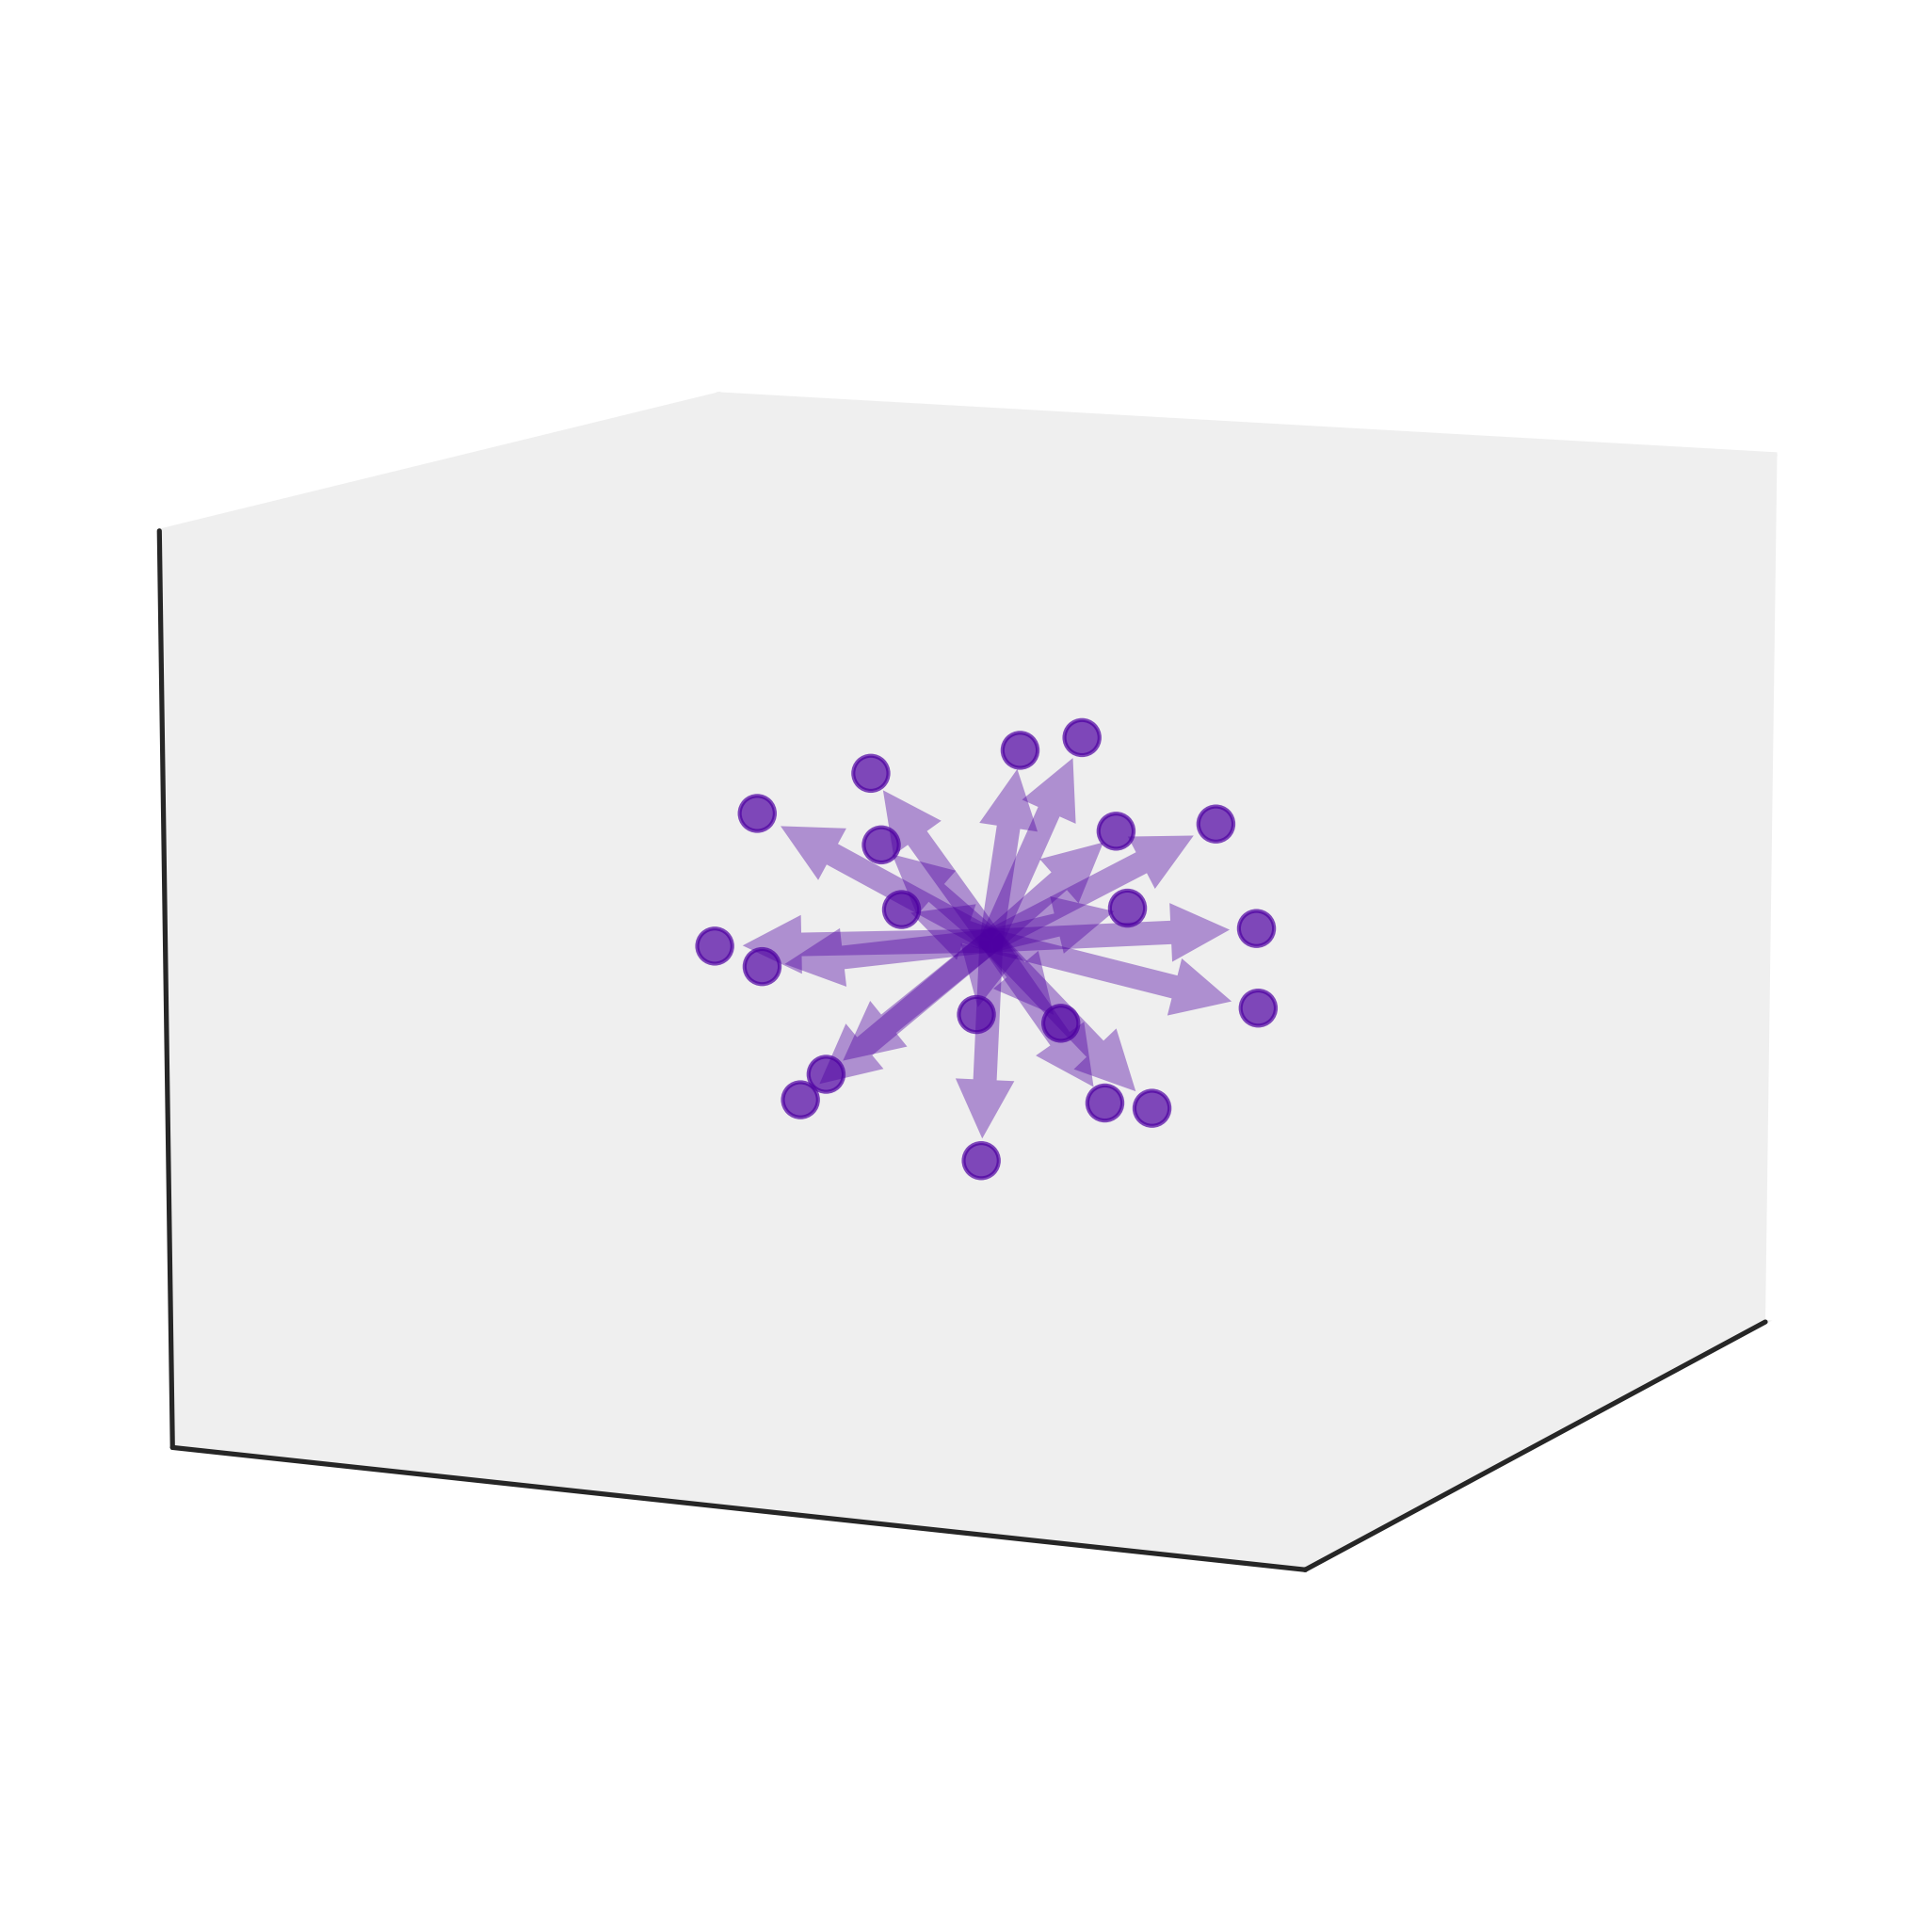

In [30]:
for i,j in zip([main_grads],['main_networks_disp']):
    within_network_dispersion(i,
                              outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_no_noise', 
                              #outpath = None,
                              noise_level=0)

Random Seed: 9


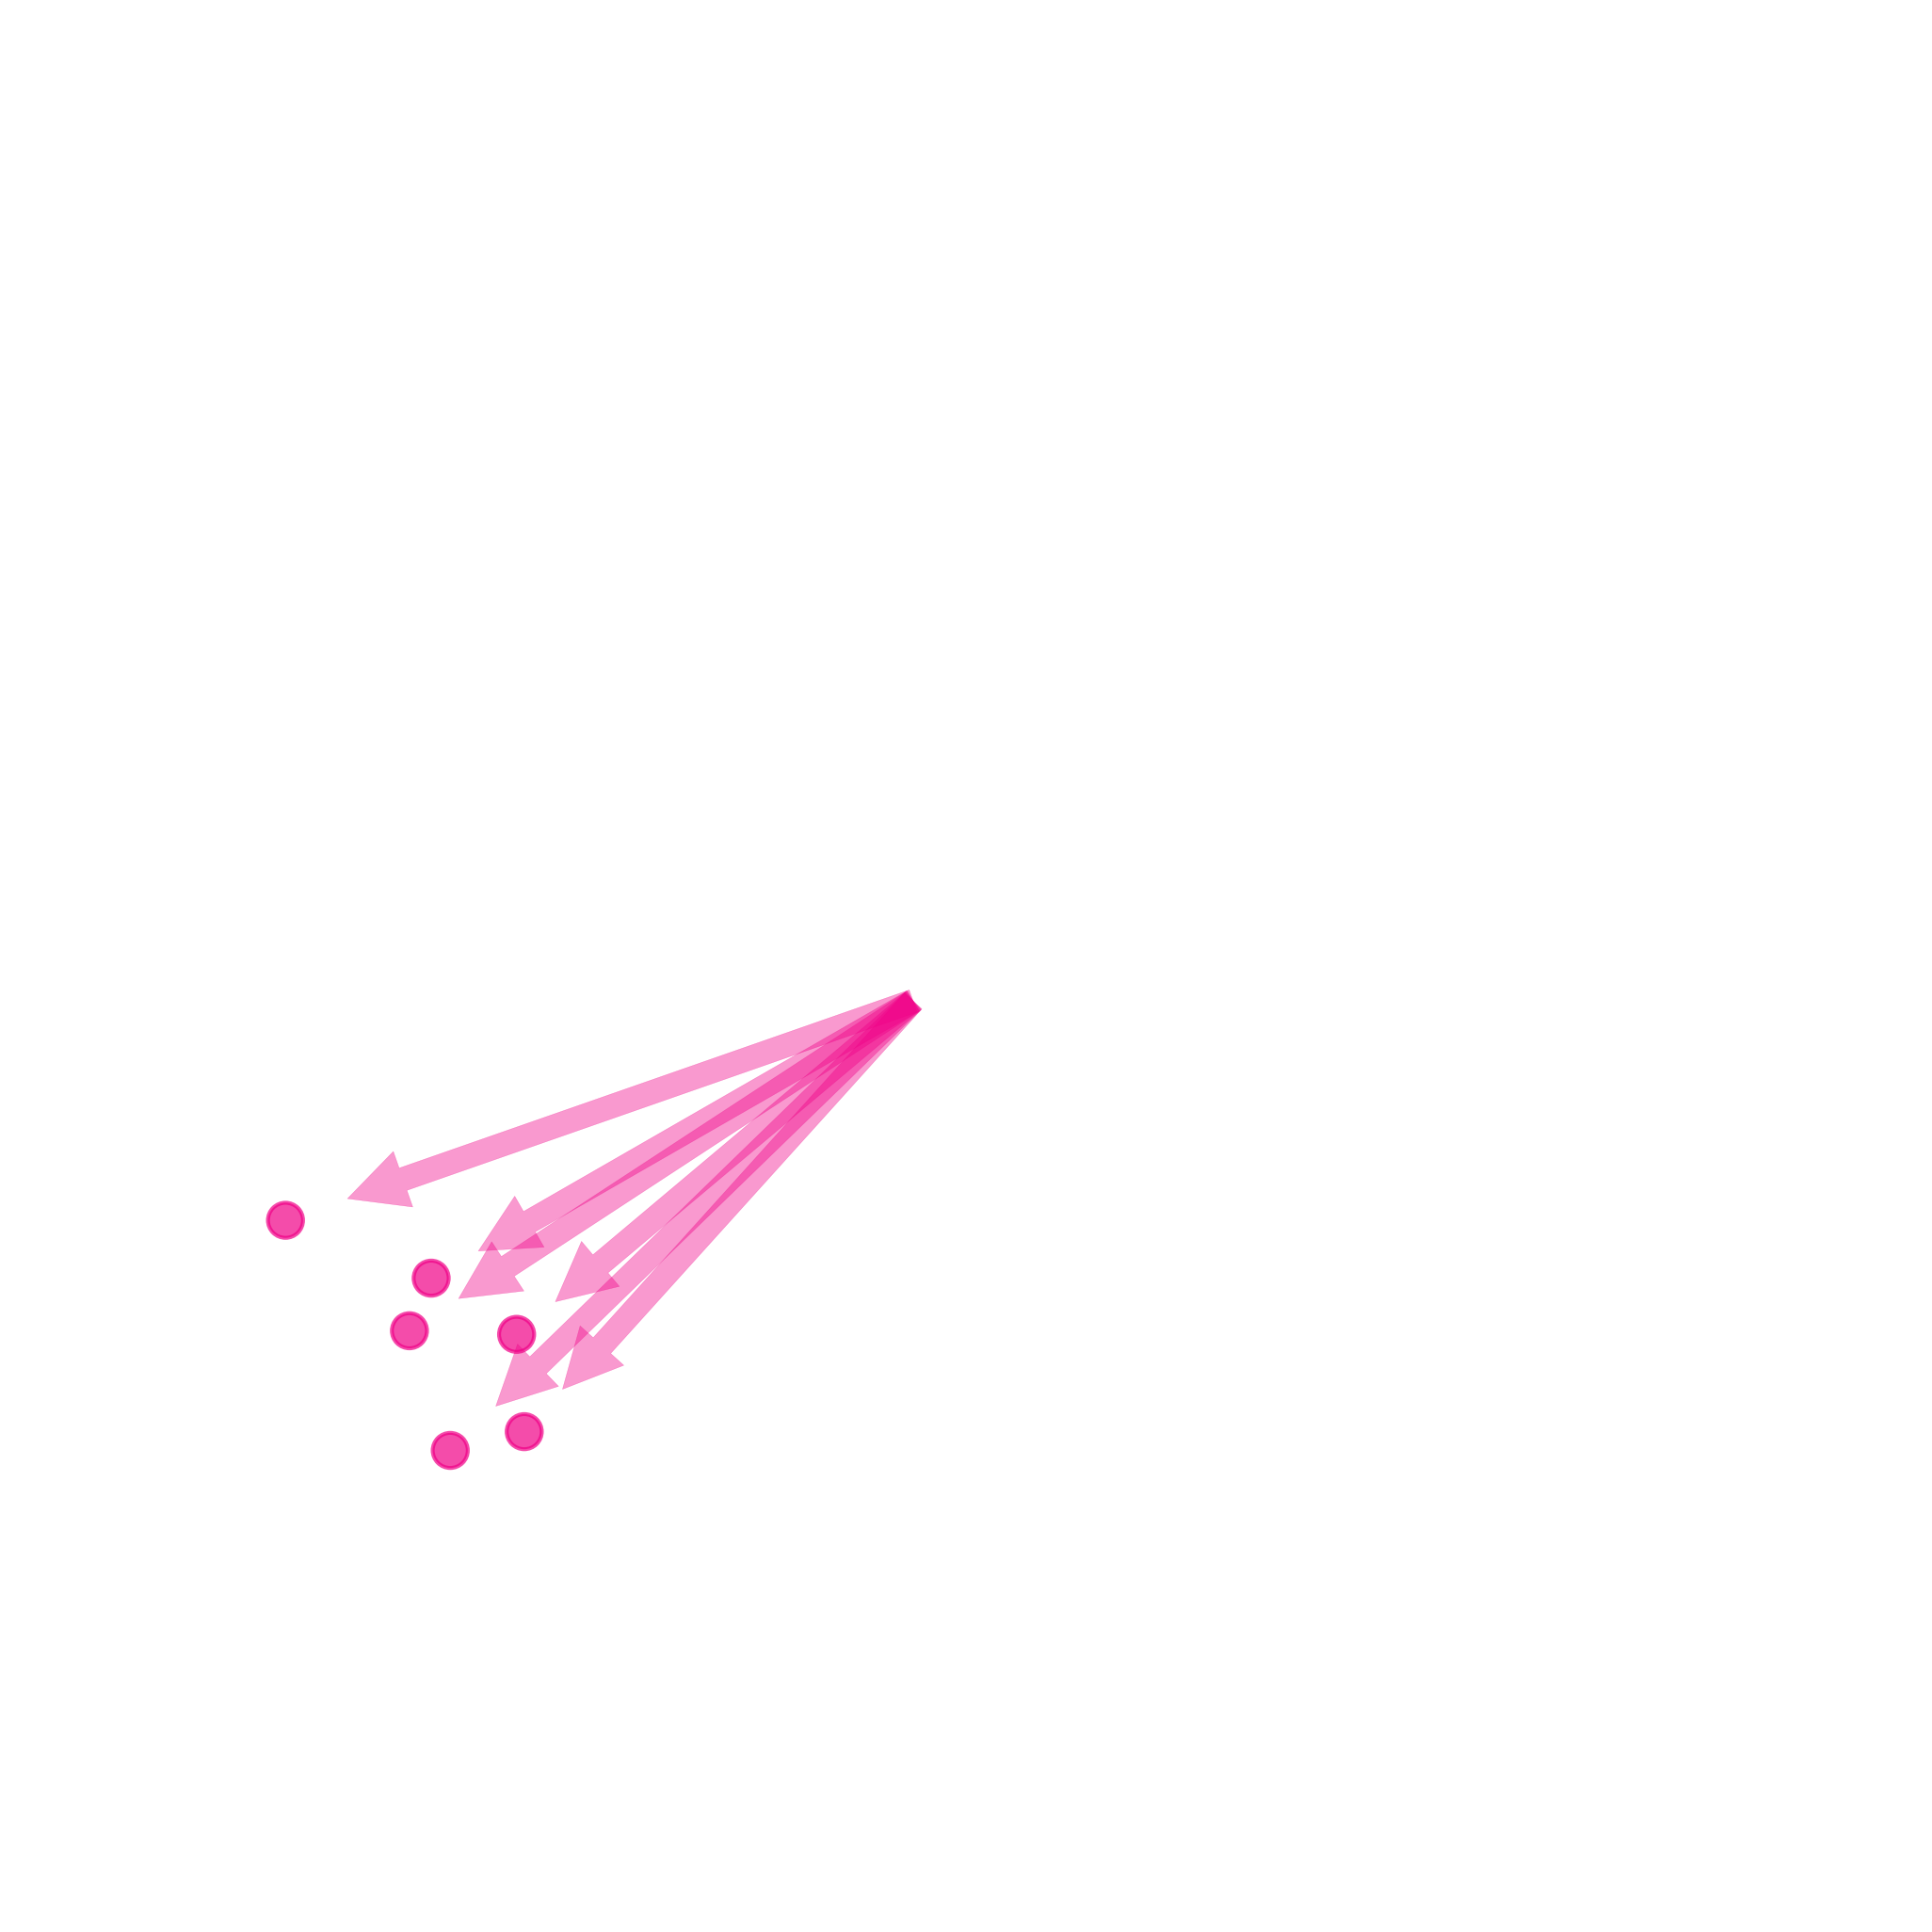

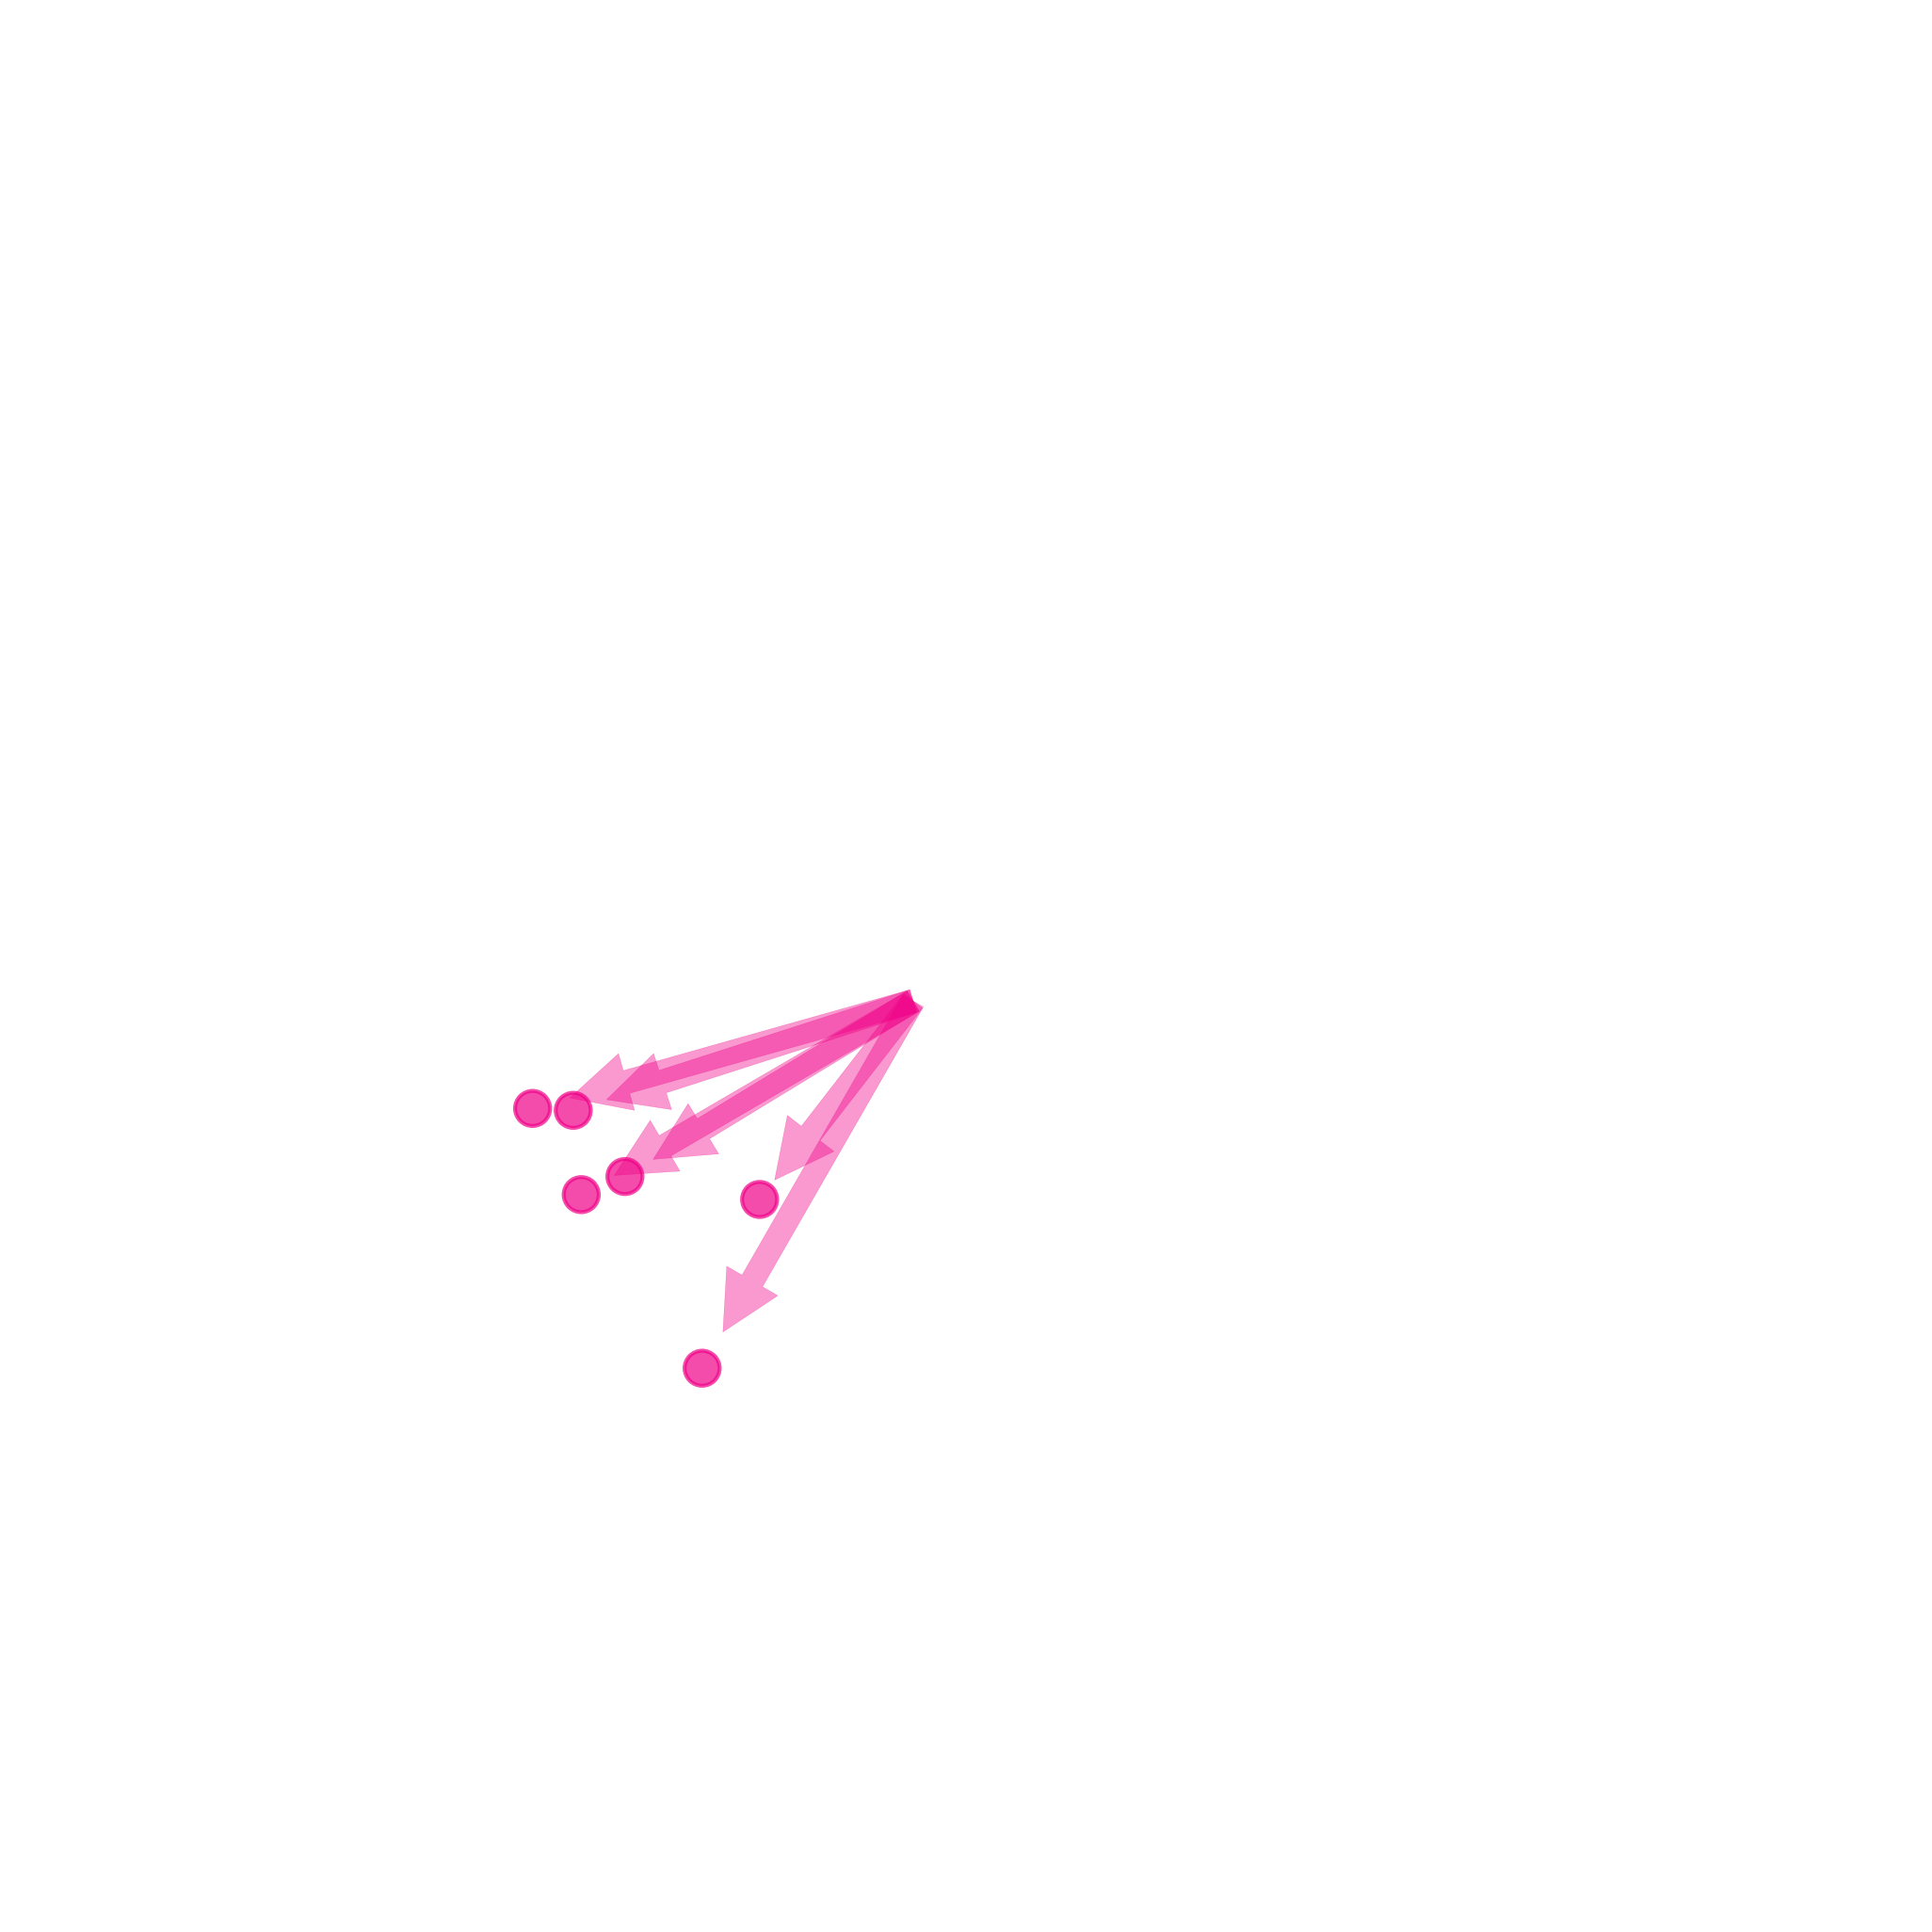

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd
from scipy.spatial import distance
import random

# Set a random seed and print it for reproducibility
random_seed = 9
np.random.seed(random_seed)
print(f"Random Seed: {random_seed}")

# Define the Arrow3D class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Function to draw arrows using Arrow3D with a larger arrowhead
def draw_3d_arrow(ax, start, end, color='blue', shorten_factor=0.9):
    end_short = start + shorten_factor * (end - start)
    arrow_prop_dict = dict(mutation_scale=30, arrowstyle='simple', color=color, lw=0.1, shrinkA=0, shrinkB=0, alpha=0.4)
    a = Arrow3D([start[0], end_short[0]], [start[1], end_short[1]], [start[2], end_short[2]], **arrow_prop_dict)
    ax.add_artist(a)

# Function to add jitter (small random noise) to the network points
def add_jitter(coords, jitter_factor=0.01):
    jitter = np.random.normal(0, jitter_factor, coords.shape)
    return coords + jitter

# Function to select and plot points from all four networks (VN, SMN, FPCN, DMN)
def network_eccentricity(grad, outpath=None, noise_level=0.0, num_points=12, jitter_factor=0.01, vn_factor=0.2, smn_factor=0.3, fpcn_factor=0.4, dmn_factor=0.6):
    global df1
    
    vn_color = '#FCFF0D'
    smn_color = '#21DFB4'
    fpcn_color = '#4E00A2'
    dmn_color = '#F00087'
    
    sns.set(style='white', rc={'figure.figsize': (10, 7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices for each network
    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    global_centroid = grad.iloc[:, 1:].mean().values

    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0.0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0.0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0.0, noise_level, grad.shape[0])

    vn_coords = noisy_grad.iloc[vn_index, 1:4].values
    smn_coords = noisy_grad.iloc[smn_index, 1:4].values
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values

    # Apply outward scaling to each network's coordinates
    vn_coords = global_centroid + vn_factor * (vn_coords - global_centroid)
    smn_coords = global_centroid + smn_factor * (smn_coords - global_centroid)
    fpcn_coords = global_centroid + fpcn_factor * (fpcn_coords - global_centroid)
    dmn_coords = global_centroid + dmn_factor * (dmn_coords - global_centroid)

    vn_coords = add_jitter(vn_coords, jitter_factor)
    smn_coords = add_jitter(smn_coords, jitter_factor)
    fpcn_coords = add_jitter(fpcn_coords, jitter_factor)
    dmn_coords = add_jitter(dmn_coords, jitter_factor)  # Add jitter to adjusted DMN coords

    distances_fpcn_dmn = []
    for i, fpcn_point in enumerate(fpcn_coords):
        for j, dmn_point in enumerate(dmn_coords):
            dist = distance.euclidean(fpcn_point, dmn_point)
            distances_fpcn_dmn.append((dist, i, j))

    distances_fpcn_dmn = sorted(distances_fpcn_dmn, key=lambda x: x[0], reverse=True)

    top_fpcn_indices = set()
    top_dmn_indices = set()
    for dist, fpcn_idx, dmn_idx in distances_fpcn_dmn:
        if len(top_fpcn_indices) < num_points // 2 and fpcn_idx not in top_fpcn_indices:
            top_fpcn_indices.add(fpcn_idx)
        if len(top_dmn_indices) < num_points // 2 and dmn_idx not in top_dmn_indices:
            top_dmn_indices.add(dmn_idx)
        if len(top_fpcn_indices) >= num_points // 2 and len(top_dmn_indices) >= num_points // 2:
            break

    fpcn_farthest = np.array([fpcn_coords[i] for i in top_fpcn_indices])
    dmn_farthest = np.array([dmn_coords[j] for j in top_dmn_indices])

    def ref_plot_arrows(selected_coords, color):
        for coord in selected_coords:
            draw_3d_arrow(ax, global_centroid, coord, color=color, shorten_factor=0.9)

    #ref_plot_arrows(fpcn_farthest, fpcn_color)
    ref_plot_arrows(dmn_farthest, dmn_color)
    #ref_plot_arrows(vn_coords[:num_points // 2], vn_color)
    #ref_plot_arrows(smn_coords[:num_points // 2], smn_color)

    #ax.scatter(fpcn_farthest[:, 0], fpcn_farthest[:, 1], fpcn_farthest[:, 2], s=80, c=fpcn_color, alpha=0.7, label="FPCN")
    ax.scatter(dmn_farthest[:, 0], dmn_farthest[:, 1], dmn_farthest[:, 2], s=80, c=dmn_color, alpha=0.7, label="DMN")
    #ax.scatter(vn_coords[:num_points // 2, 0], vn_coords[:num_points // 2, 1], vn_coords[:num_points // 2, 2], s=80, c=vn_color, alpha=0.7, label="VN")
    #ax.scatter(smn_coords[:num_points // 2, 0], smn_coords[:num_points // 2, 1], smn_coords[:num_points // 2, 2], s=80, c=smn_color, alpha=0.7, label="SMN")

    # Setting axis limits based on the original grad coordinates with padding to center the plot
    padding_ratio = .5  # 10% padding to center the points in the figure
    x_min, x_max = np.min(grad.iloc[:, 1]), np.max(grad.iloc[:, 1])
    y_min, y_max = np.min(grad.iloc[:, 2]), np.max(grad.iloc[:, 2])
    z_min, z_max = np.min(grad.iloc[:, 3]), np.max(grad.iloc[:, 3])

    ax.set_xlim(x_min - padding_ratio * (x_max - x_min), x_max + padding_ratio * (x_max - x_min))
    ax.set_ylim(y_min - padding_ratio * (y_max - y_min), y_max + padding_ratio * (y_max - y_min))
    ax.set_zlim(z_min - padding_ratio * (z_max - z_min), z_max + padding_ratio * (z_max - z_min))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(30, 205)

    pane_rbga = (239 / 255, 239 / 255, 239 / 255, 255 / 255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)
    
    ax.set_axis_off()
    

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}eccentricity_all_networks.png', dpi=300, transparent=True)
        
        
for k, x in zip(['high', 'low'], [1.8, 1]):
    for i, j in zip([main_grads], ['main_networks']):
        network_eccentricity(i,
                             outpath=f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_dmn_{k}_ecc', 
                             vn_factor=1.2,
                             smn_factor=1.3,
                             fpcn_factor=1.4,
                             dmn_factor=x,
                             noise_level=0,
                             jitter_factor=0.03)


Random Seed: 9


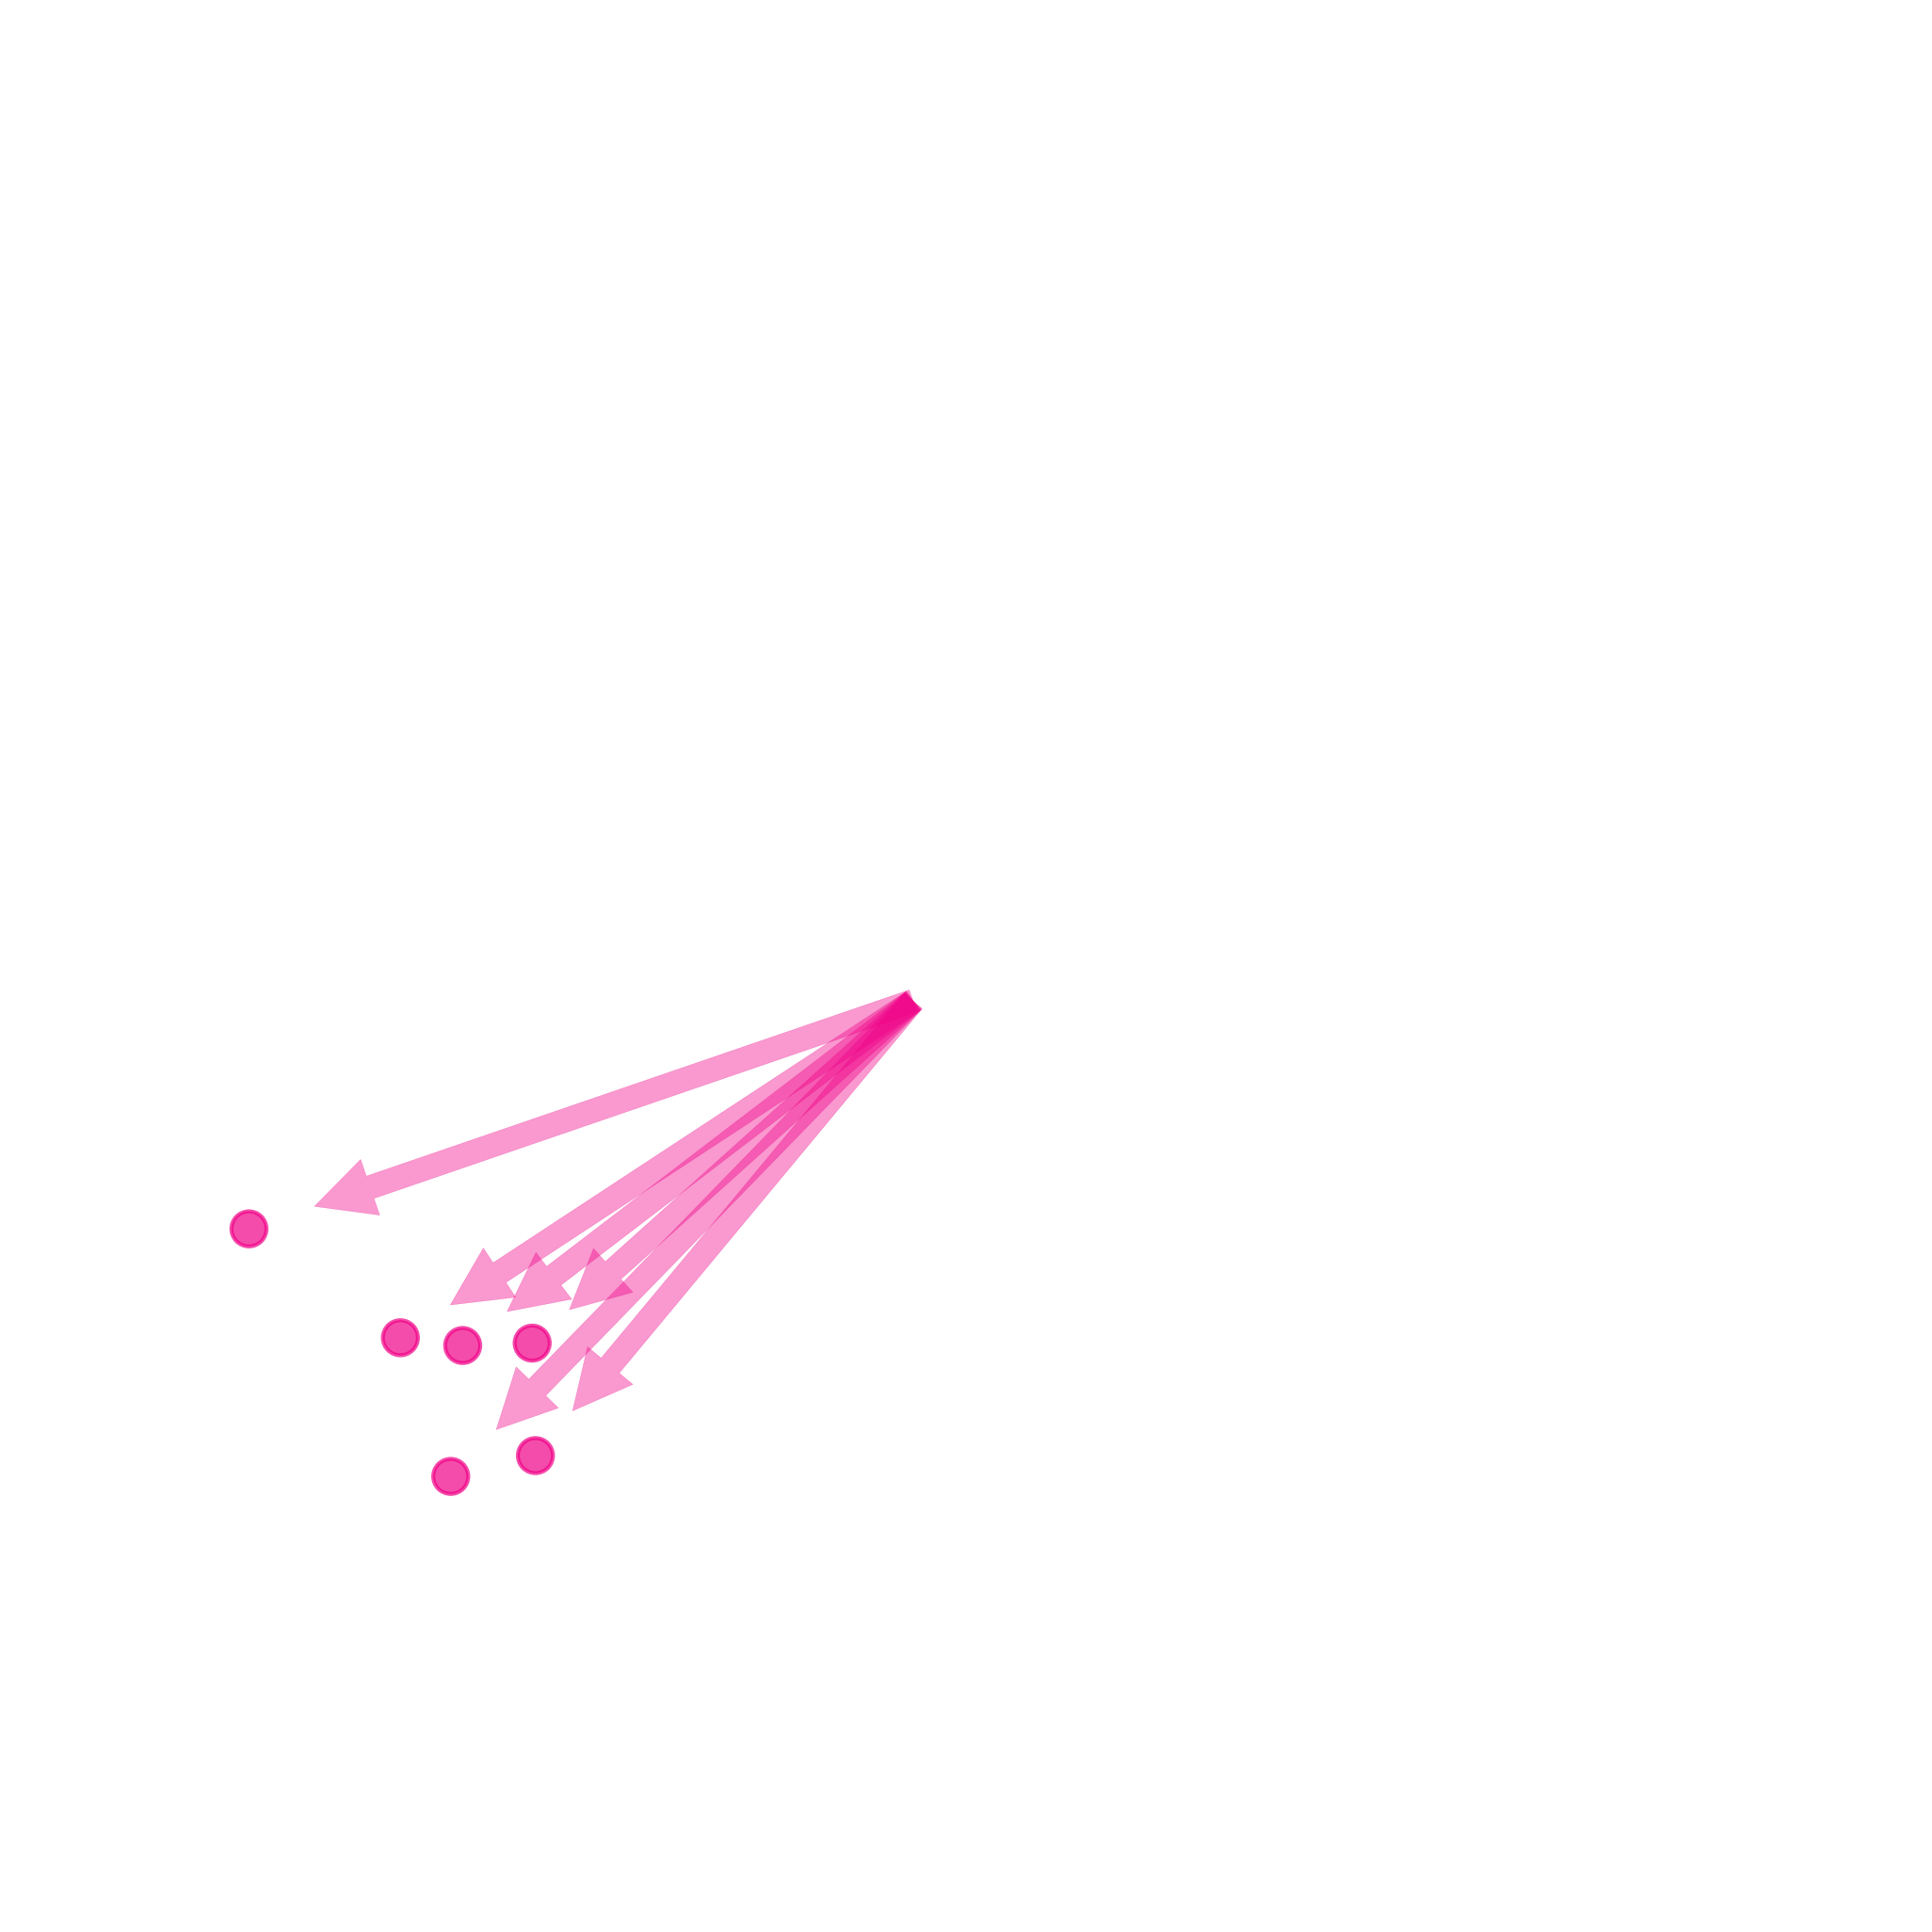

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd
from scipy.spatial import distance
import random

# Set a random seed and print it for reproducibility
random_seed = 9
np.random.seed(random_seed)
print(f"Random Seed: {random_seed}")

# Define the Arrow3D class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Function to draw arrows using Arrow3D with a larger arrowhead
def draw_3d_arrow(ax, start, end, color='blue', shorten_factor=0.9):
    end_short = start + shorten_factor * (end - start)
    arrow_prop_dict = dict(mutation_scale=30, arrowstyle='simple', color=color, lw=0.1, shrinkA=0, shrinkB=0, alpha=0.4)
    a = Arrow3D([start[0], end_short[0]], [start[1], end_short[1]], [start[2], end_short[2]], **arrow_prop_dict)
    ax.add_artist(a)

# Function to add jitter (small random noise) to the network points
def add_jitter(coords, jitter_factor=0.01):
    jitter = np.random.normal(0, jitter_factor, coords.shape)
    return coords + jitter

# Function to select and plot points from all four networks (VN, SMN, FPCN, DMN)
def network_eccentricity(grad, outpath=None, noise_level=0.0, num_points=12, jitter_factor=0.01, vn_factor=0.2, smn_factor=0.3, fpcn_factor=0.4, dmn_factor=0.6):
    global df1
    
    vn_color = '#FCFF0D'
    smn_color = '#21DFB4'
    fpcn_color = '#4E00A2'
    dmn_color = '#F00087'
    
    sns.set(style='white', rc={'figure.figsize': (10, 7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices for each network
    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    global_centroid = grad.iloc[:, 1:].mean().values

    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0.0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0.0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0.0, noise_level, grad.shape[0])

    vn_coords = noisy_grad.iloc[vn_index, 1:4].values
    smn_coords = noisy_grad.iloc[smn_index, 1:4].values
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values

    # Apply outward scaling to each network's coordinates
    vn_coords = global_centroid + vn_factor * (vn_coords - global_centroid)
    smn_coords = global_centroid + smn_factor * (smn_coords - global_centroid)
    fpcn_coords = global_centroid + fpcn_factor * (fpcn_coords - global_centroid)
    dmn_coords = global_centroid + dmn_factor * (dmn_coords - global_centroid)

    vn_coords = add_jitter(vn_coords, jitter_factor)
    smn_coords = add_jitter(smn_coords, .005)
    fpcn_coords = add_jitter(fpcn_coords, jitter_factor)
    dmn_coords = add_jitter(dmn_coords, jitter_factor)  # Add jitter to adjusted DMN coords

    distances_fpcn_dmn = []
    for i, fpcn_point in enumerate(fpcn_coords):
        for j, dmn_point in enumerate(dmn_coords):
            dist = distance.euclidean(fpcn_point, dmn_point)
            distances_fpcn_dmn.append((dist, i, j))

    distances_fpcn_dmn = sorted(distances_fpcn_dmn, key=lambda x: x[0], reverse=True)

    top_fpcn_indices = set()
    top_dmn_indices = set()
    for dist, fpcn_idx, dmn_idx in distances_fpcn_dmn:
        if len(top_fpcn_indices) < num_points // 2 and fpcn_idx not in top_fpcn_indices:
            top_fpcn_indices.add(fpcn_idx)
        if len(top_dmn_indices) < num_points // 2 and dmn_idx not in top_dmn_indices:
            top_dmn_indices.add(dmn_idx)
        if len(top_fpcn_indices) >= num_points // 2 and len(top_dmn_indices) >= num_points // 2:
            break

    fpcn_farthest = np.array([fpcn_coords[i] for i in top_fpcn_indices])
    dmn_farthest = np.array([dmn_coords[j] for j in top_dmn_indices])

    def ref_plot_arrows(selected_coords, color):
        for coord in selected_coords:
            draw_3d_arrow(ax, global_centroid, coord, color=color, shorten_factor=0.9)

    #ref_plot_arrows(fpcn_farthest, fpcn_color)
    ref_plot_arrows(dmn_farthest, dmn_color)
    #ref_plot_arrows(vn_coords[:num_points // 2], vn_color)
    #ref_plot_arrows(smn_coords[:num_points // 2], smn_color)

    #ax.scatter(fpcn_farthest[:, 0], fpcn_farthest[:, 1], fpcn_farthest[:, 2], s=80, c=fpcn_color, alpha=0.7, label="FPCN")
    ax.scatter(dmn_farthest[:, 0], dmn_farthest[:, 1], dmn_farthest[:, 2], s=80, c=dmn_color, alpha=0.7, label="DMN")
    #ax.scatter(vn_coords[:num_points // 2, 0], vn_coords[:num_points // 2, 1], vn_coords[:num_points // 2, 2], s=80, c=vn_color, alpha=0.7, label="VN")
    #ax.scatter(smn_coords[:num_points // 2, 0], smn_coords[:num_points // 2, 1], smn_coords[:num_points // 2, 2], s=80, c=smn_color, alpha=0.7, label="SMN")

    # Setting axis limits based on the original grad coordinates with padding to center the plot
    padding_ratio = .5  # 10% padding to center the points in the figure
    x_min, x_max = np.min(grad.iloc[:, 1]), np.max(grad.iloc[:, 1])
    y_min, y_max = np.min(grad.iloc[:, 2]), np.max(grad.iloc[:, 2])
    z_min, z_max = np.min(grad.iloc[:, 3]), np.max(grad.iloc[:, 3])

    ax.set_xlim(x_min - padding_ratio * (x_max - x_min), x_max + padding_ratio * (x_max - x_min))
    ax.set_ylim(y_min - padding_ratio * (y_max - y_min), y_max + padding_ratio * (y_max - y_min))
    ax.set_zlim(z_min - padding_ratio * (z_max - z_min), z_max + padding_ratio * (z_max - z_min))

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(30, 205)

    pane_rbga = (239 / 255, 239 / 255, 239 / 255, 255 / 255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)
    
    ax.set_axis_off()
    

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}eccentricity_all_networks.png', dpi=300, transparent=True)
        
        
for k, x in zip(['high'], [1.8]):
    for i, j in zip([main_grads], ['main_networks']):
        network_eccentricity(i,
                             outpath=f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_dmn_{k}_ecc', 
                             vn_factor=2,
                             smn_factor=1.5,
                             fpcn_factor=2,
                             dmn_factor=x,
                             noise_level=0,
                             jitter_factor=0.035)


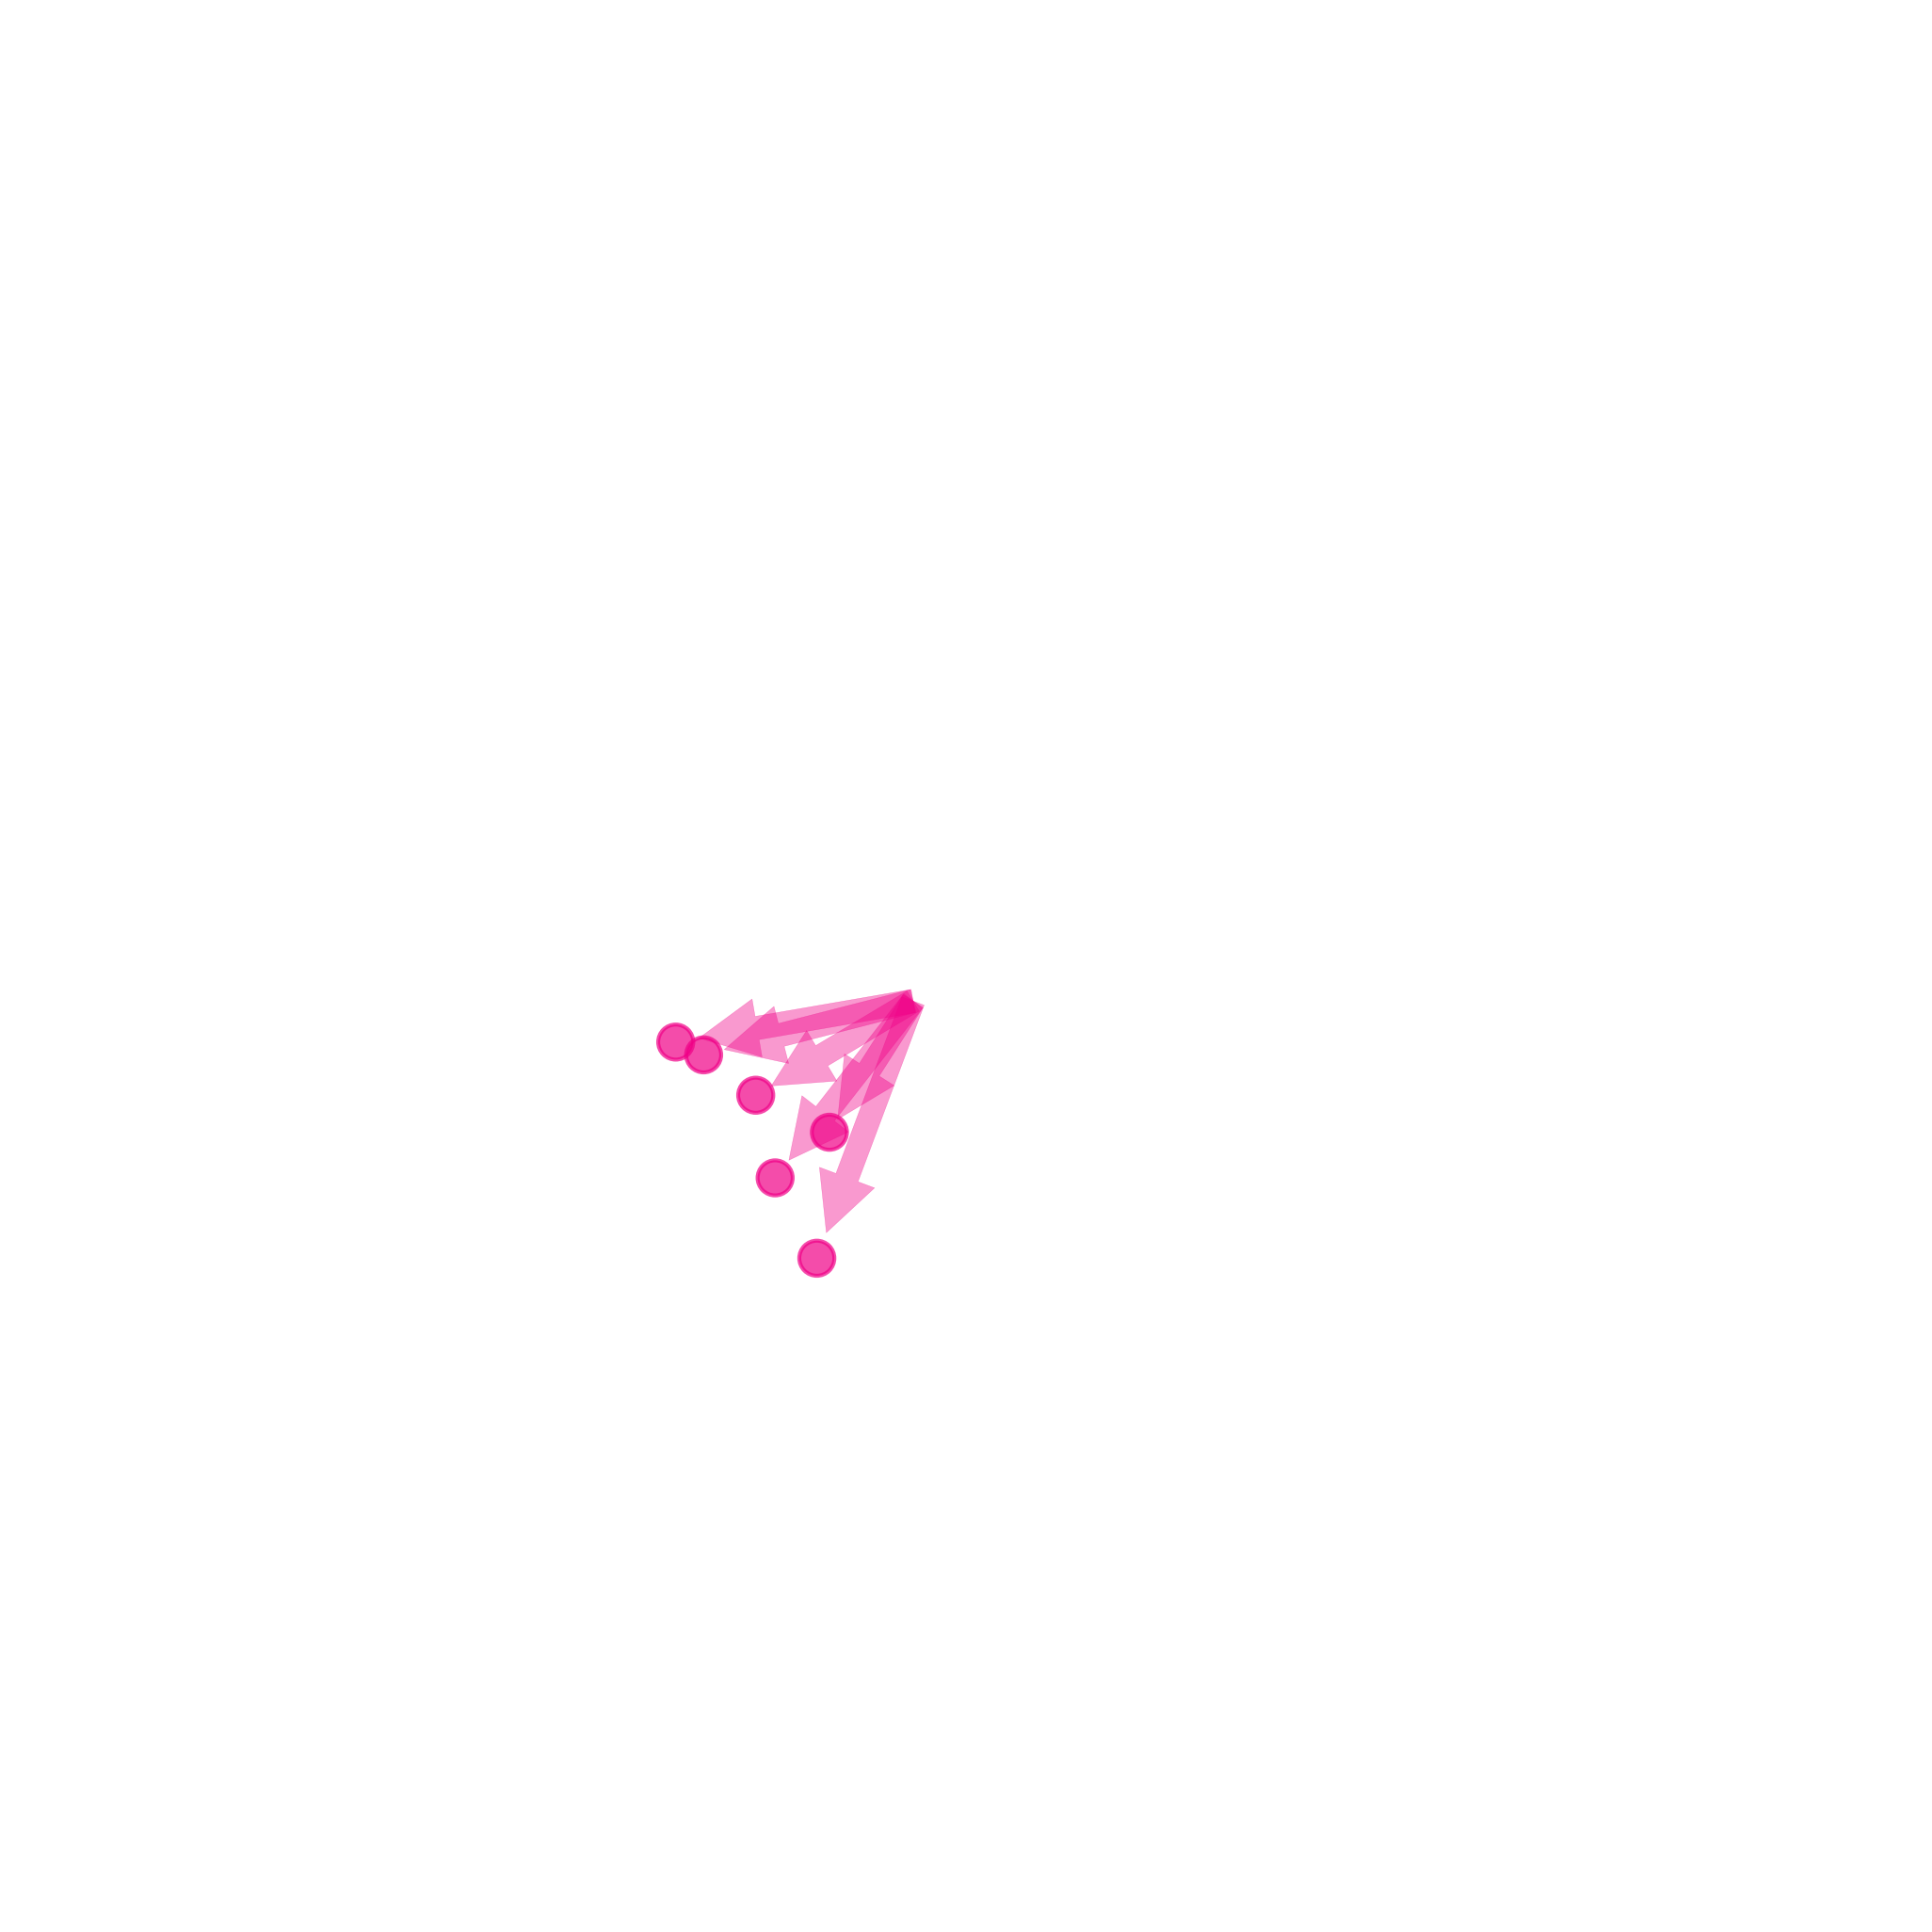

In [33]:
        
for k, x in zip(['low'], [.5]):
    for i, j in zip([main_grads], ['main_networks']):
        network_eccentricity(i,
                             outpath=f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/fpcn_dmn_{k}_ecc', 
                             vn_factor=1.2,
                             smn_factor=1,
                             fpcn_factor=.9,
                             dmn_factor=x,
                             noise_level=0,
                             jitter_factor=0.025)

In [ ]:
dont_run = '''
plt.rcParams["font.family"] = "Arial"

for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads], 
               ['main', 'replace', 'suppress', 'clear']):
    
    arry = np.array(i.iloc[:, 1:])

    x = arry[:, 0]
    y = arry[:, 1]
    z = arry[:, 2]

    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    fig = plt.figure(figsize=(9.5, 5.5))

    ax1 = fig.add_subplot(121)
    ax1.set_facecolor((239/255, 239/255, 239/255))
    ax1.scatter(x, y, alpha=0.8, c=y, cmap='jet')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title('Parcels Colored by Gradient', fontweight='bold', loc='left', fontname='Arial')
    ax1.set_xlabel('Gradient 1', fontweight='bold', fontname='Arial')
    ax1.set_ylabel('Gradient 2', fontweight='bold', fontname='Arial')
    ax1.set_xticks([min(x), max(x)])
    ax1.set_yticks([min(y), max(y)])

    ax2 = fig.add_subplot(122)
    ax2.set_facecolor((239/255, 239/255, 239/255))
    ax2.scatter(x, y, alpha=0.8, c=colors, cmap='jet')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_title('Parcels Colored by Network', fontweight='bold', loc='left', fontname='Arial')
    ax2.set_xlabel('Gradient 1', fontweight='bold', fontname='Arial')
    ax2.set_ylabel('Gradient 2', fontweight='bold', fontname='Arial')
    ax2.set_xticks([min(x), max(x)])
    ax2.set_yticks([min(y), max(y)])

    fig.tight_layout()

    fig.savefig(f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/{j}_grad_axes.png', dpi=700)
    
'''

In [ ]:
outpath= '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/network_dispersion/group/'

#for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
#               ['main_networks','replace_networks','suppress_networks','clear_networks']): 
#               grad3d(i, outpath = outpath+j)
    
#for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
#               ['main_grads','replace_grads','suppress_grads','clear_grds']): 
#               grad3d(i, gradient=True, outpath = outpath+j)
            
#for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
#               ['main_networks_disp','replace_networks_disp','suppress_networks_disp','clear_networks_disp']): 
#               network_dispersion(i ,outpath+j)

#for i,j in zip([main_grads, replace_grads, suppress_grads, clear_grads],
#               ['main_networks_disp','replace_networks_disp','suppress_networks_disp','clear_networks_disp']): 
#               network_dispersion(i , None)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def across_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
    
    net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    #net_cols = ['grey', 'grey', '#4E00A2', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    scat = ax.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, alpha=0.1, c=colors)
    scat_means = ax.scatter(all_means[:,0], all_means[:,1], zs=all_means[:,2],
                            s=60, alpha=1, edgecolors='black', c=net_cols)

    net_cols = ['red', 'blue', 'green', 'purple']  # Colors for the networks

    # Function to add lines between centroids
    def add_lines_between_centroids(means, color='black'):
        for i in range(len(means)):
            for j in range(i + 1, len(means)):
                line = np.array([means[i], means[j]])
                ax.plot(line[:,0], line[:,1], line[:,2], c=color, alpha=1, lw=3.5)

    # Add lines between centroids
    add_lines_between_centroids(all_means)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Get rid of colored axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        # Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)
        anim.save(outpath+'.gif', writer=writergif, savefig_kwargs={'facecolor':'white'})
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_across_net.png', dpi=300)


In [36]:
#for i,j in zip([main_grads],['main_networks_disp']): 
#               across_network_dispersion(i , None)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def network_eccentricity(grad, outpath=None, noise_level=0.1):
    global df1 
    
    net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    #net_cols = ['grey', 'grey', 'grey', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    global_centroid = np.mean(all_means, axis=0)

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    scat = ax.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, alpha=0.7, c = colors)
    
    # Function to add lines from each network mean to the global centroid
    def add_lines(network_coords, network_mean, color):
        for coord in network_coords:
            line = np.array([coord, global_centroid])
            ax.plot(line[:,0], line[:,1], line[:,2],
                    c=color, alpha=0.3, lw=.8)

    # VN lines
    vn_coords = noisy_grad.iloc[vn_index, 1:4].values
    add_lines(vn_coords, all_means[0], net_cols[0])

    # SMN lines
    smn_coords = noisy_grad.iloc[smn_index, 1:4].values
    add_lines(smn_coords, all_means[1], net_cols[1])

    # FPCN lines
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values
    add_lines(fpcn_coords, all_means[2], net_cols[2])

    # DMN lines
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values
    add_lines(dmn_coords, all_means[3], net_cols[3])

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Get rid of colored axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        # Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)
        anim.save(f'{outpath}eccentricity.gif',writer=writergif, savefig_kwargs={'facecolor':'white'})
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/gradient_net_ecc.png', dpi=300, transparent=True)
        plt.show()

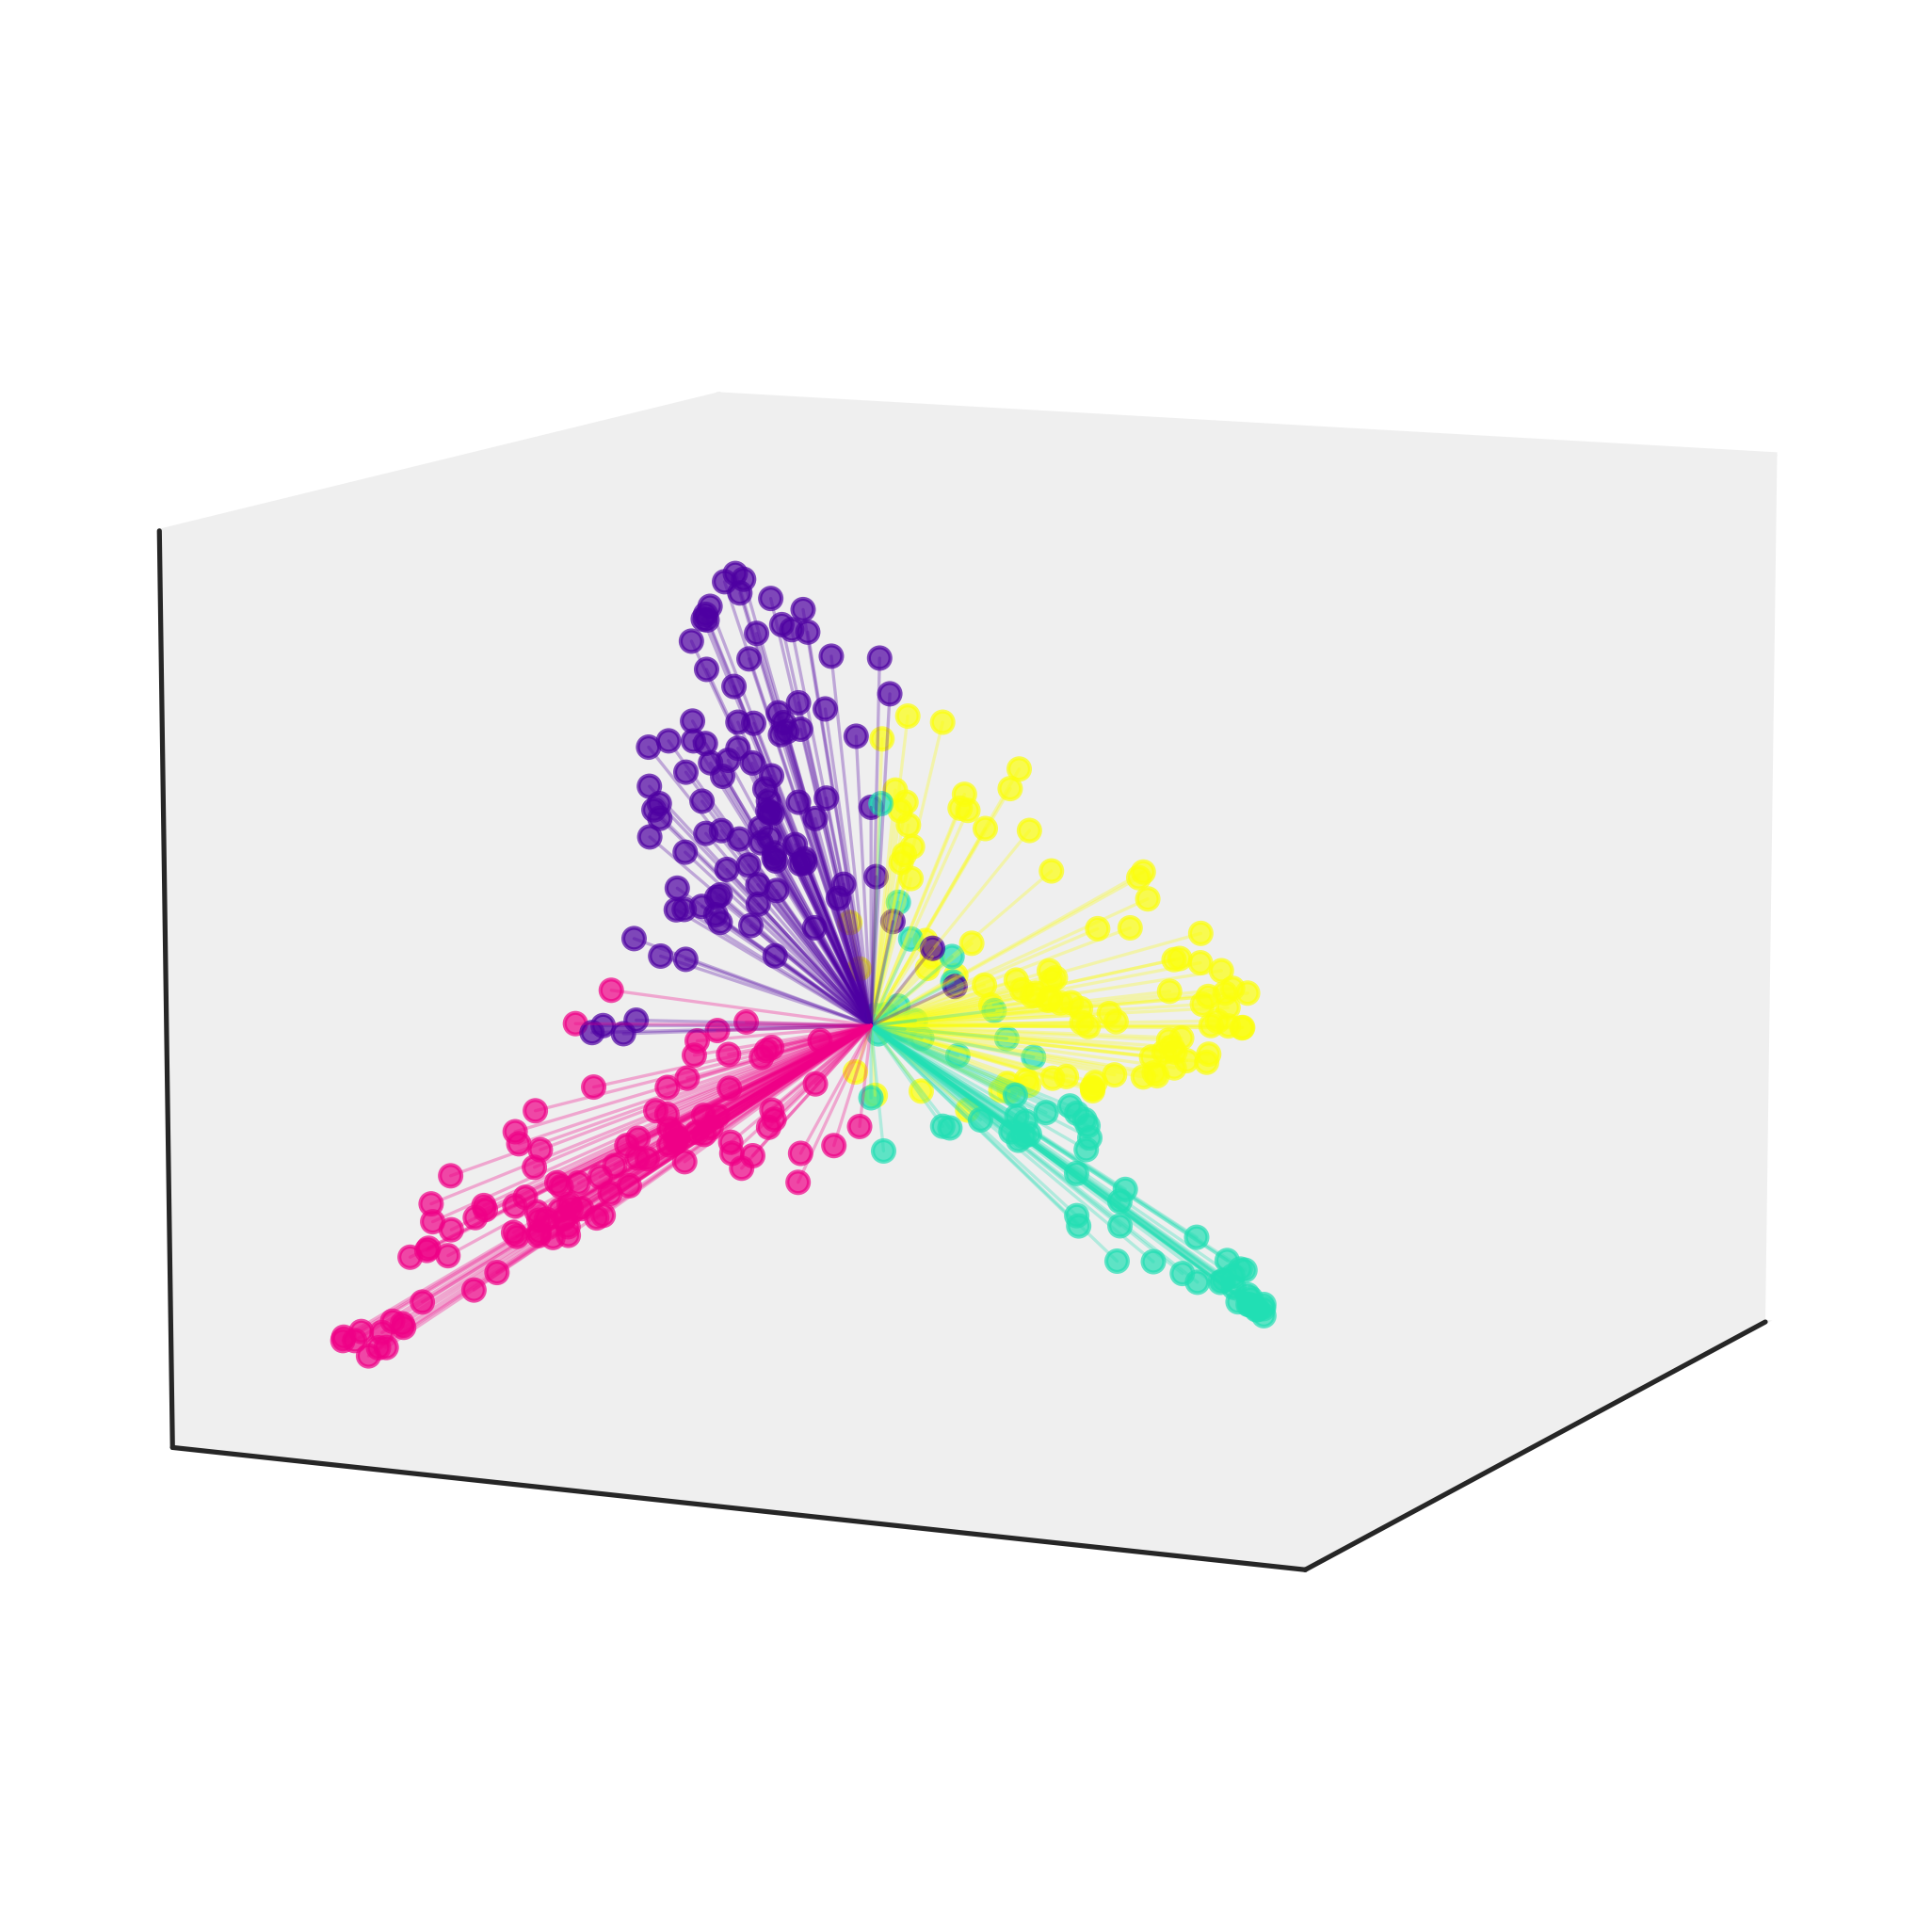

In [38]:
for i,j in zip([main_grads],['main_networks_ecc']): 
    network_eccentricity(i ,  
                         outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/', 
                         noise_level=0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def network_eccentricity(grad, outpath=None, noise_level=0.1):
    global df1 
    
    # Define network colors, with DMN highlighted
    net_cols = ['grey', 'grey', 'grey', '#F00087']  # Highlight only DMN-RSN
    dmn_color = '#F00087'  # DMN-RSN color

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices for each network and calculate mean coordinates for global centroid
    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    # Calculate global centroid using means of all networks
    global_centroid = np.array([
        np.mean([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]),
        np.mean([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]),
        np.mean([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]])
    ])

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Define DMN points with noise
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values

    # Set axis limits symmetrically around the global centroid
    max_extent = np.max(np.abs(dmn_coords - global_centroid), axis=0) * 1.2  # Expand for padding
    x_lim = [global_centroid[0] - max_extent[0], global_centroid[0] + max_extent[0]]
    y_lim = [global_centroid[1] - max_extent[1], global_centroid[1] + max_extent[1]]
    z_lim = [global_centroid[2] - max_extent[2], global_centroid[2] + max_extent[2]]
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)

    # Plot lines from DMN parcels to the global centroid
    for coord in dmn_coords:
        line = np.vstack([coord, global_centroid])  # Stack to make it a 2D array
        ax.plot(line[:, 0], line[:, 1], line[:, 2], c=dmn_color, alpha=0.3, lw=0.8)

    # Scatter plot for DMN points
    ax.scatter(dmn_coords[:, 0], dmn_coords[:, 1], dmn_coords[:, 2], s=80, c=dmn_color, alpha=0.7)
    
    # Plot the global centroid as a central reference point
    #ax.scatter(global_centroid[0], global_centroid[1], global_centroid[2], s=160, c='black', alpha=1, edgecolors='black', label="Global Centroid")

        # Remove tick labels and turn off axes visibility
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()  # Turns off the axes, removing all spines and borders

    ax.view_init(30, 190)

    # Remove colored axes planes for clarity
    pane_rgba = (239/255, 239/255, 239/255, 1)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)
    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        fig.savefig(f'{outpath}dmn_eccentricity_centered_plot.png', dpi=300, transparent=True)
        plt.show()


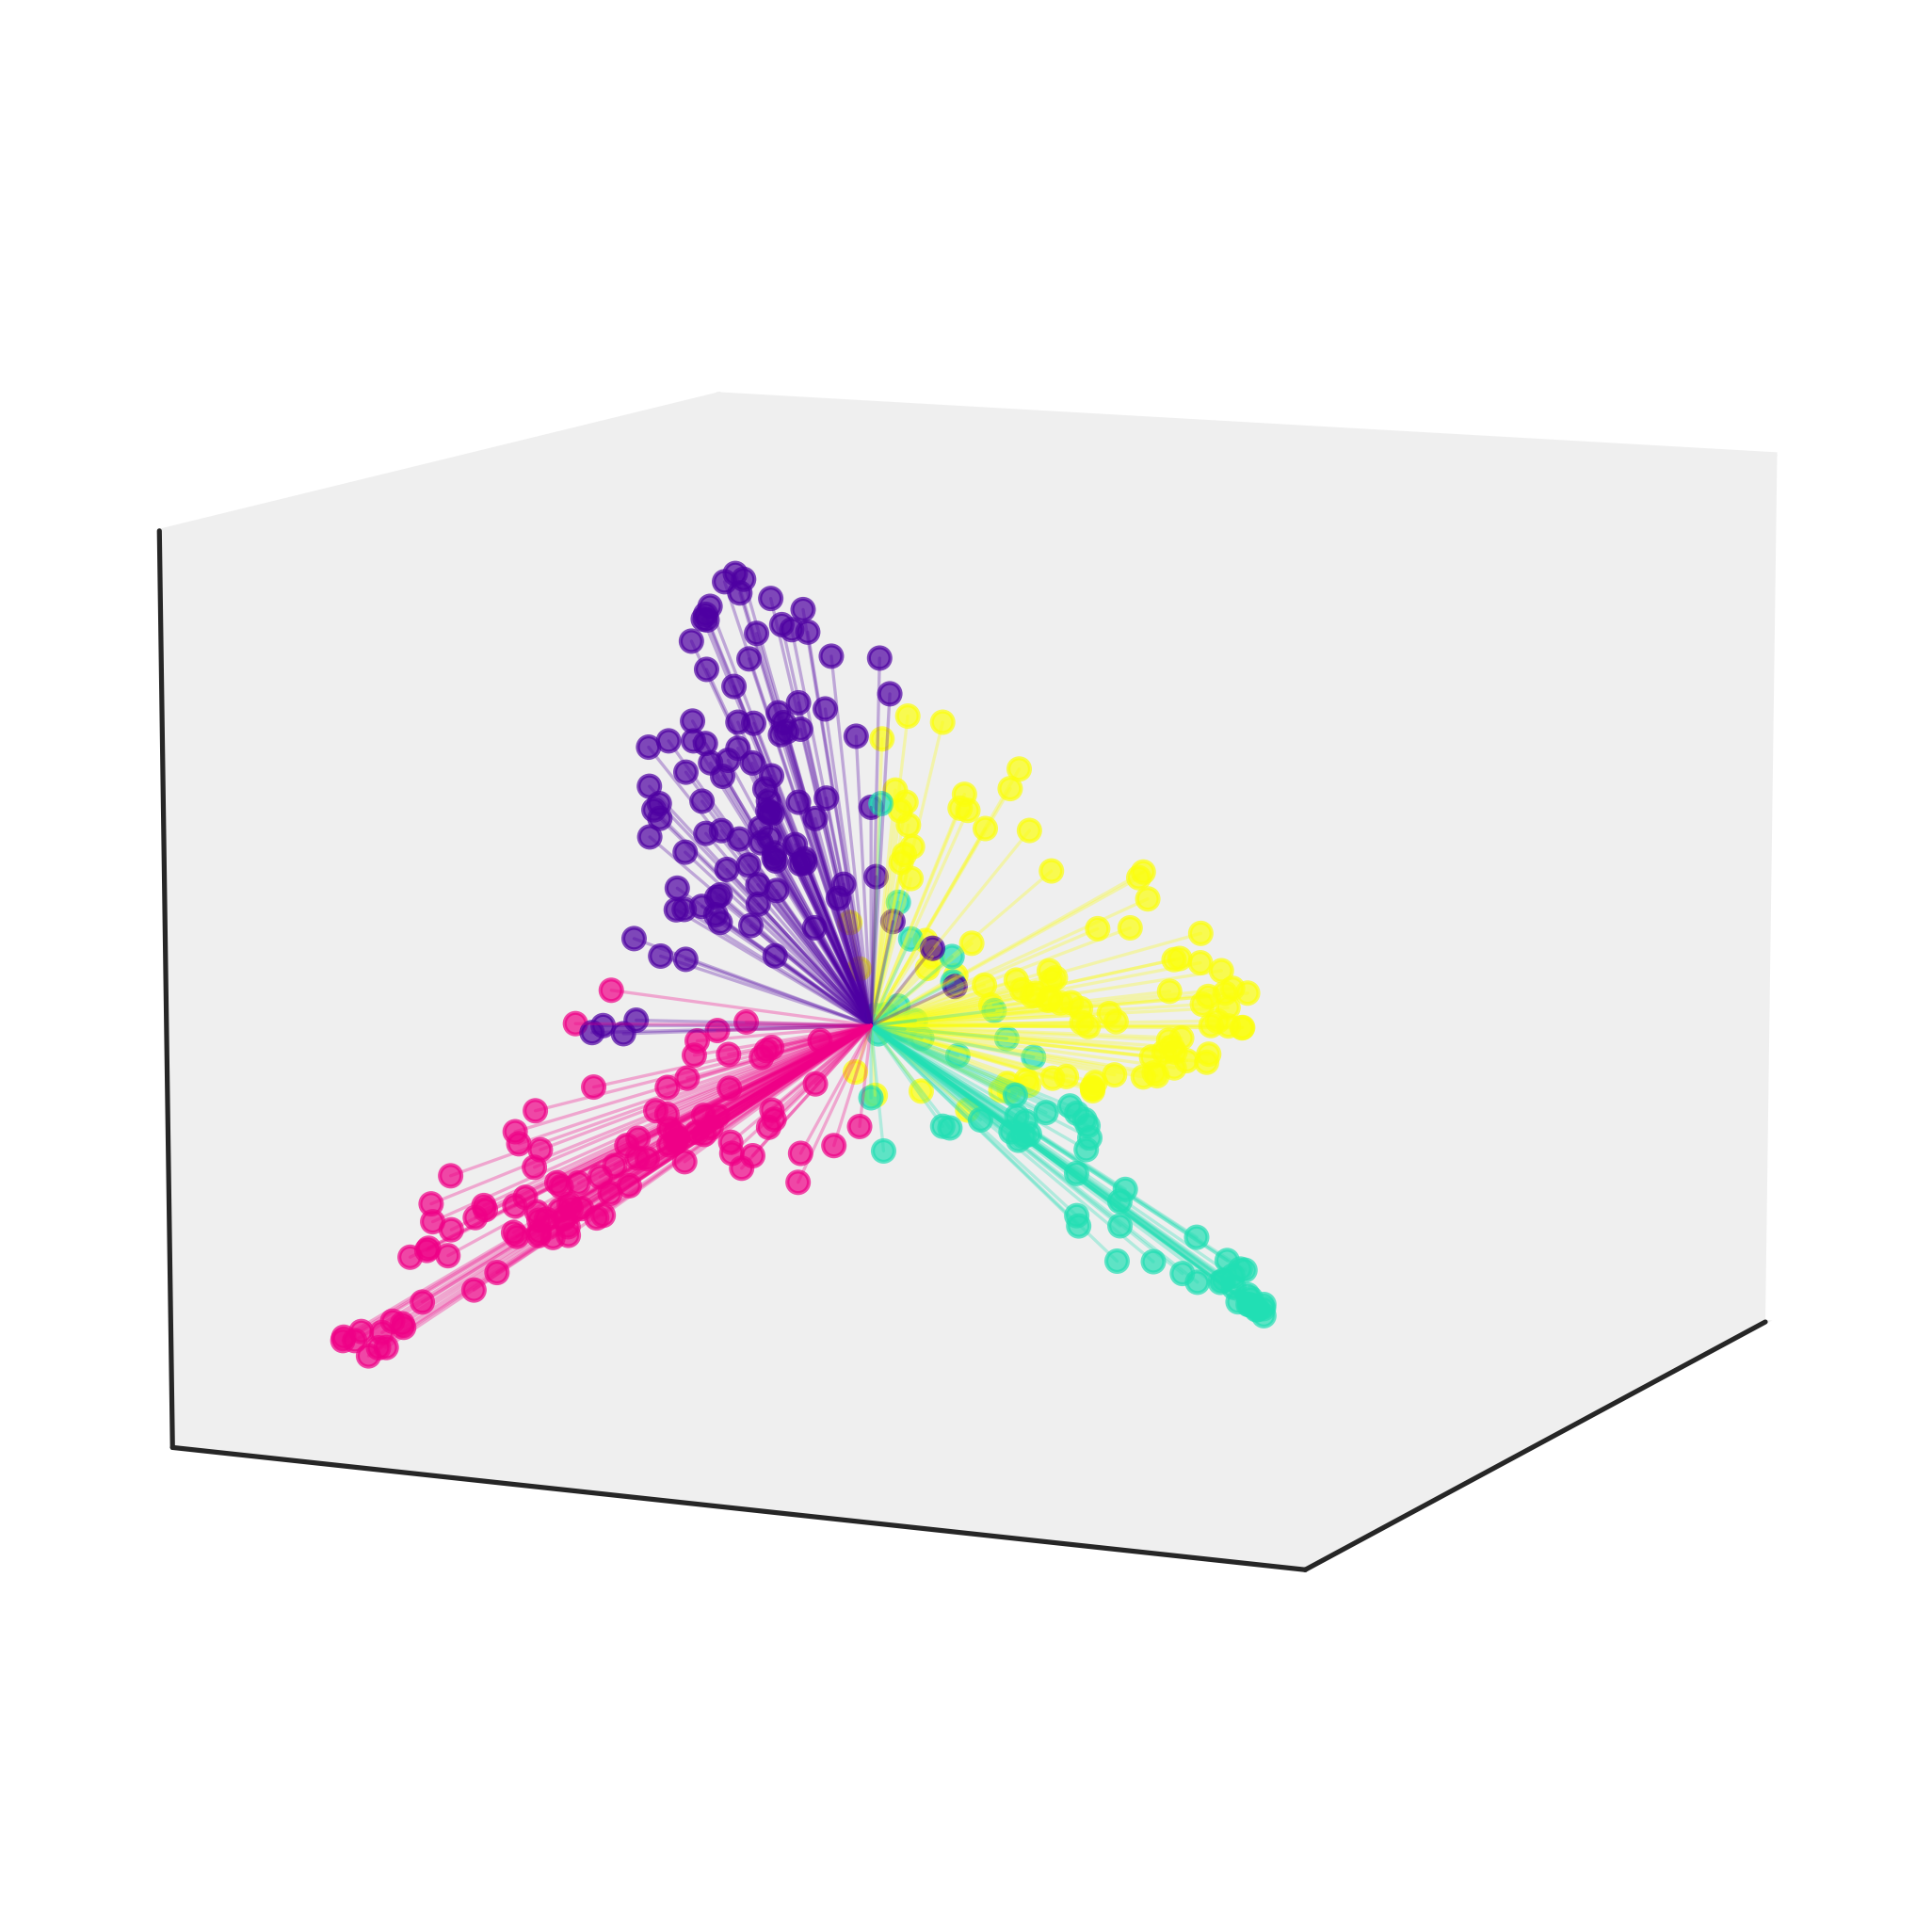

In [39]:
for i,j in zip([main_grads],['main_networks_ecc']): 
    network_eccentricity(i ,  
                         outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/dmnn_ecc_only_', 
                         noise_level=0)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def network_eccentricity(grad, outpath=None, noise_level=0.1):
    global df1 
    
    # Define network colors with DMN-RSN highlighted
    net_cols = ['grey', 'grey', 'grey', '#F00087']  # Highlight only DMN-RSN
    dmn_color = '#F00087'  # DMN-RSN color

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices for DMN only
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    # Calculate DMN mean coordinates for eccentricity
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T
    dmn_des = dmn_mds.describe().T[['mean']]
    dmn_mean = np.array([dmn_des['mean'][0], dmn_des['mean'][1], dmn_des['mean'][2]])

    # Define the global centroid based on DMN mean only for this specific plot
    global_centroid = np.mean(dmn_mean, axis=0)

    # Generate noise for DMN points if needed
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Define DMN points with noise
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values

    # Set axis limits based only on DMN coordinates
    x_lim = [dmn_coords[:, 0].min(), dmn_coords[:, 0].max()]
    y_lim = [dmn_coords[:, 1].min(), dmn_coords[:, 1].max()]
    z_lim = [dmn_coords[:, 2].min(), dmn_coords[:, 2].max()]
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)

    # Plot lines from DMN parcels to the global centroid (eccentricity lines)
    for coord in dmn_coords:
        line = np.array([coord, global_centroid])
        ax.plot(line[:, 0], line[:, 1], line[:, 2], c=dmn_color, alpha=0.3, lw=0.8)

    # Scatter plot for DMN points
    ax.scatter(dmn_coords[:, 0], dmn_coords[:, 1], dmn_coords[:, 2], s=80, c=dmn_color, alpha=0.7)
    
    # Plot the DMN mean
    ax.scatter(dmn_mean[0], dmn_mean[1], dmn_mean[2], s=160, c=dmn_color, alpha=1, edgecolors='black')

    # Remove tick labels and turn off axes visibility
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Remove colored axes planes for clarity
    pane_rgba = (239/255, 239/255, 239/255, 1)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)
    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        fig.savefig(f'{outpath}dmn_eccentricity_plot.png', dpi=300, transparent=True)
        plt.show()


In [41]:
from glob import glob
import pandas as pd
import numpy as np

def process_gradients(sub_id, op, gradient_type='rsa'):
    if gradient_type == 'rsa':
        # Define paths for gradients
        g1_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/subj/*_sm_vector/*_sm_vector_g1_all_ops.csv'
        g2_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/subj/*_sm_vector/*_sm_vector_g2_all_ops.csv'
        g3_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/subj/*_sm_vector/*_sm_vector_g3_all_ops.csv'
    elif gradient_type == 'fc':
        # Define paths for functional connectivity gradients
        g1_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/sub/*/g1_all_ops.csv'
        g2_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/sub/*/g2_all_ops.csv'
        g3_path = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/task_conn/task_gradients/sub/*/g3_all_ops.csv'
    else:
        raise ValueError("Invalid gradient_type. Choose 'sm_vector' or 'fc'.")

    def sub_grads(paths, grad):
        g_dfs = []
        for i in sorted(glob(paths, recursive=True)):
            df = pd.read_csv(i).iloc[:, 2:]
            df['sub'] = i.split('/')[-2].replace('_sm_vector', '').replace('sub', '')
            g_dfs.append(df)
        sub_g = pd.concat(g_dfs).assign(gradient=grad)
        sub_g['sub'] = sub_g['sub'].astype(int)
        return sub_g
    
    # Process all three gradients
    sub_g_list = []
    for path, grad in zip([g1_path, g2_path, g3_path], range(1, 4)):
        sub_g_list.append(sub_grads(path, grad))
    
    # Combine all gradients
    sub_gs = pd.concat(sub_g_list)
    
    # Filter for the specified subject
    sub_data = sub_gs.query('sub == @sub_id')
    
    # Convert the data to a long format based on the operation
    def long_grads(data, op):
        grad = (data[[op, 'gradient']]
                .reset_index()
                .pivot(index='index', columns='gradient', values=op)
                .reset_index(drop=True))
        grad = pd.DataFrame(np.array(grad)).reset_index()
        return grad
    
    # Get the DataFrame for the specified operation
    result_df = long_grads(sub_data, op)
    
    return result_df

# Example usage:
# Process sm_vector gradients
sub1_main = process_gradients(1, 'maintain', gradient_type='rsa')

# Process functional connectivity gradients
fc_sub5_main = process_gradients(5, 'maintain', gradient_type='fc')
fc_sub36_clear = process_gradients(36, 'clear', gradient_type='fc')

In [14]:
def average_gradients(sub_ids, operation, gradient_type):
    gradients_list = [process_gradients(sub_id, operation, gradient_type=gradient_type) for sub_id in sub_ids]
    
    # Initialize an empty DataFrame with the same structure as the first DataFrame in the list
    avg_gradients = gradients_list[0].copy()
    
    # Sum all DataFrames in the list
    for df in gradients_list[1:]:
        avg_gradients += df
    
    # Divide by the number of DataFrames to get the average
    avg_gradients /= len(gradients_list)
    
    return avg_gradients

low_subids = [5, 1, 45]
medium_subids = [62, 17, 67]
high_subids = [54, 46, 83]
# Compute averages for low, medium, and high groups
low_fc_main_ecc = average_gradients(low_subids, 'maintain', gradient_type='fc')
medium_fc_main_ecc = average_gradients(medium_subids, 'maintain', gradient_type='fc')
high_fc_main_ecc = average_gradients(high_subids, 'maintain', gradient_type='fc')

# Now, low_fc_main_ecc, medium_fc_main_ecc, and high_fc_main_ecc contain the averaged gradients for each group.


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def across_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
    
    net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    net_cols = ['grey', 'grey', '#4E00A2', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_median = vn_mds.median()
    smn_median = smn_mds.median()
    fpcn_median = fpcn_mds.median()
    dmn_median = dmn_mds.median()

    all_x_median = np.array([vn_median[0], smn_median[0], fpcn_median[0], dmn_median[0]]).flatten()
    all_y_median = np.array([vn_median[1], smn_median[1], fpcn_median[1], dmn_median[1]]).flatten()
    all_z_median = np.array([vn_median[2], smn_median[2], fpcn_median[2], dmn_median[2]]).flatten()

    all_medians = np.array([all_x_median, all_y_median, all_z_median]).T

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    scat = ax.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, alpha=0.2, c=colors)
    
    #net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})
    
    #scat_medians = ax.scatter(all_medians[:,0], all_medians[:,1], zs=all_medians[:,2],
    #                        s=60, alpha=1, edgecolors='black', c=net_cols)

    # Function to add lines between centroids (using medians)
    def add_lines_between_medians(medians, color='black'):
        for i in range(len(medians)):
            for j in range(i + 1, len(medians)):
                line = np.array([medians[i], medians[j]])
                ax.plot(line[:,0], line[:,1], line[:,2], c=color, alpha=0.8, lw=1.5)

    # Add lines between medians
   # add_lines_between_medians(all_medians)

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Get rid of colored axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        # Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)
        anim.save(outpath+'.gif', writer=writergif, savefig_kwargs={'facecolor':'white'})
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_across_net.png', dpi=300)


In [43]:
#across_network_dispersion(sub1_main, None)

In [44]:
#across_network_dispersion(sub12_main, None)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def network_eccentricity(grad, outpath=None, noise_level=0.1):
    global df1 
    
    #net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', '#F00087']
    net_cols = ['grey', 'grey', 'grey', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    global_centroid = np.mean(all_means, axis=0)

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    scat = ax.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, alpha=0.7, c = colors)
    
    # Function to add lines from each network mean to the global centroid
    def add_lines(network_coords, network_mean, color):
        for coord in network_coords:
            line = np.array([coord, global_centroid])
            ax.plot(line[:,0], line[:,1], line[:,2],
                    c=color, alpha=0.3, lw=.8)

    # VN lines
    #vn_coords = noisy_grad.iloc[vn_index, 1:4].values
    #add_lines(vn_coords, all_means[0], net_cols[0])

    # SMN lines
    #smn_coords = noisy_grad.iloc[smn_index, 1:4].values
    #add_lines(smn_coords, all_means[1], net_cols[1])

    # FPCN lines
    #fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values
    #add_lines(fpcn_coords, all_means[2], net_cols[2])

    # DMN lines
    dmn_coords = noisy_grad.iloc[dmn_index, 1:4].values
    add_lines(dmn_coords, all_means[3], net_cols[3])

    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(30, 205)

    # Get rid of colored axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        # Animate
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        writergif = animation.PillowWriter(fps=30)
        anim.save(outpath+'.gif', writer=writergif, savefig_kwargs={'facecolor':'white'})
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_net_ecc.png', dpi=300)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

def network_eccentricity(grad, outpath=None, noise_level=0.1):
    global df1 
    
    net_cols = ['grey', 'grey', 'grey', '#F00087']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})

    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    # Compute mean and standard deviation for each network
    networks = {'VN': vn_index, 'SMN': smn_index, 'FPCN': fpcn_index, 'DMN': dmn_index}
    means, stds = {}, {}
    for name, indices in networks.items():
        network_data = grad.iloc[indices, 1:4]
        means[name] = network_data.mean(axis=0)
        stds[name] = network_data.std(axis=0)

    # Plot each network's mean as a cross with standard deviation bars
    for i, (name, mean) in enumerate(means.items()):
        color = net_cols[i]
        ax.scatter(mean[0], mean[1], mean[2], s=100, color=color, label=name)

        # Draw lines to indicate ±1 SD along each axis
        ax.plot([mean[0] - stds[name][0], mean[0] + stds[name][0]], [mean[1], mean[1]], [mean[2], mean[2]], color=color, lw=1.5)
        ax.plot([mean[0], mean[0]], [mean[1] - stds[name][1], mean[1] + stds[name][1]], [mean[2], mean[2]], color=color, lw=1.5)
        ax.plot([mean[0], mean[0]], [mean[1], mean[1]], [mean[2] - stds[name][2], mean[2] + stds[name][2]], color=color, lw=1.5)

    # Remove tick labels and grid lines for a cleaner look
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.grid(False)

    ax.view_init(30, 205)

    # Set background color for axes planes
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    plt.draw()
    plt.tight_layout()

    # Animation setup
    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        # Animate
        #anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        # Save
        #writergif = animation.PillowWriter(fps=30)
        #anim.save(outpath + '.gif', writer=writergif, savefig_kwargs={'facecolor': 'white'})
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_net_ecc.png', dpi=300)


In [47]:
network_eccentricity(low_fc_main_ecc, None, noise_level=.000)
network_eccentricity(medium_fc_main_ecc, None, noise_level=.000)
network_eccentricity(high_fc_main_ecc, None, noise_level=.0)

NameError: name 'low_fc_main_ecc' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Define the Arrow3D class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# Function to draw arrows using Arrow3D with a larger arrowhead
def draw_3d_arrow(ax, start, end, color='blue', shorten_factor=0.9):
    end_short = start + shorten_factor * (end - start)
    arrow_prop_dict = dict(mutation_scale=30, arrowstyle='simple', color=color, lw=0.1, shrinkA=0, shrinkB=0, alpha=0.7)
    a = Arrow3D([start[0], end_short[0]], [start[1], end_short[1]], [start[2], end_short[2]], **arrow_prop_dict)
    ax.add_artist(a)

def dmn_eccentricity(subject1_df, subject2_df, grad, outpath=None, noise_level=0.1):
    sns.set(style='white', rc={'figure.figsize':(10,7)})
    
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    
    # Set color and alpha transparency
    dmn_color = '#F00087'  # DMN color for both subjects
    global_color = 'black'
    alpha = 0.7

    # Add noise to each subject's data for slight variability
    noisy_subject1 = subject1_df.copy()
    noisy_subject2 = subject2_df.copy()
    noisy_subject1.iloc[:, 1:] += np.random.normal(0, noise_level, subject1_df.iloc[:, 1:].shape)
    noisy_subject2.iloc[:, 1:] += np.random.normal(0, noise_level, subject2_df.iloc[:, 1:].shape)
    
    # Calculate global centroid for each subject (mean of all points)
    subject1_centroid = noisy_subject1.iloc[:, 1:].mean(axis=0).values
    subject2_centroid = noisy_subject2.iloc[:, 1:].mean(axis=0).values
    
    # Calculate the overall central point (mean of the two centroids)
    global_center = (subject1_centroid + subject2_centroid) / 2
    
    # Extract DMN indices from `df1` based on `Subtype == 4`
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()
    
    # Subset DMN points for each subject using the extracted indices
    subject1_dmn = noisy_subject1.loc[dmn_index]
    subject2_dmn = noisy_subject2.loc[dmn_index]
    
    # Calculate mean and standard deviation for each subject's DMN points
    subject1_dmn_mean = subject1_dmn.iloc[:, 1:].mean(axis=0).values
    subject2_dmn_mean = subject2_dmn.iloc[:, 1:].mean(axis=0).values
    subject1_dmn_std = subject1_dmn.iloc[:, 1:].std(axis=0).values
    subject2_dmn_std = subject2_dmn.iloc[:, 1:].std(axis=0).values
    
    # Calculate distances to the global centroid
    distance_subject1 = np.linalg.norm(subject1_dmn_mean - global_center)
    distance_subject2 = np.linalg.norm(subject2_dmn_mean - global_center)

    # Determine highlighting colors based on distance
    farther_subject_color = 'lightblue' if distance_subject1 > distance_subject2 else 'lightcoral'
    closer_subject_color = 'lightcoral' if distance_subject1 > distance_subject2 else 'lightblue'
    
    # Plot DMN mean and standard deviation bars for both subjects with larger marker size
    ax.scatter(subject1_dmn_mean[0], subject1_dmn_mean[1], subject1_dmn_mean[2], 
               s=250, color=dmn_color, edgecolor=farther_subject_color if distance_subject1 > distance_subject2 else closer_subject_color, 
               linewidth=3, marker='o', label="Subject 1 DMN Mean", alpha=alpha)
    
    ax.scatter(subject2_dmn_mean[0], subject2_dmn_mean[1], subject2_dmn_mean[2], 
               s=250, color=dmn_color, edgecolor=farther_subject_color if distance_subject2 > distance_subject1 else closer_subject_color, 
               linewidth=5, marker='o', label="Subject 2 DMN Mean", alpha=alpha)

    # Plot global centroid with larger marker size
    ax.scatter(global_center[0], global_center[1], global_center[2],
               s=300, color=global_color, marker='o', label="Global Center")

    # Draw arrows from the global centroid to DMN means for each subject with matching outline colors
    draw_3d_arrow(ax, global_center, subject1_dmn_mean, color=farther_subject_color if distance_subject1 > distance_subject2 else closer_subject_color)
    draw_3d_arrow(ax, global_center, subject2_dmn_mean, color=farther_subject_color if distance_subject2 > distance_subject1 else closer_subject_color)
    
    # Plot standard deviation lines for subject 1
    ax.plot([subject1_dmn_mean[0] - subject1_dmn_std[0], subject1_dmn_mean[0] + subject1_dmn_std[0]],
            [subject1_dmn_mean[1], subject1_dmn_mean[1]], [subject1_dmn_mean[2], subject1_dmn_mean[2]], color=dmn_color, lw=1.5, alpha=alpha)
    ax.plot([subject1_dmn_mean[0], subject1_dmn_mean[0]], 
            [subject1_dmn_mean[1] - subject1_dmn_std[1], subject1_dmn_mean[1] + subject1_dmn_std[1]], [subject1_dmn_mean[2], subject1_dmn_mean[2]], color=dmn_color, lw=1.5, alpha=alpha)
    ax.plot([subject1_dmn_mean[0], subject1_dmn_mean[0]], 
            [subject1_dmn_mean[1], subject1_dmn_mean[1]], [subject1_dmn_mean[2] - subject1_dmn_std[2], subject1_dmn_mean[2] + subject1_dmn_std[2]], color=dmn_color, lw=1.5, alpha=alpha)
    
    # Plot standard deviation lines for subject 2
    ax.plot([subject2_dmn_mean[0] - subject2_dmn_std[0], subject2_dmn_mean[0] + subject2_dmn_std[0]],
            [subject2_dmn_mean[1], subject2_dmn_mean[1]], [subject2_dmn_mean[2], subject2_dmn_mean[2]], color=dmn_color, lw=1.5, alpha=alpha)
    ax.plot([subject2_dmn_mean[0], subject2_dmn_mean[0]], 
            [subject2_dmn_mean[1] - subject2_dmn_std[1], subject2_dmn_mean[1] + subject2_dmn_std[1]], [subject2_dmn_mean[2], subject2_dmn_mean[2]], color=dmn_color, lw=1.5, alpha=alpha)
    ax.plot([subject2_dmn_mean[0], subject2_dmn_mean[0]], 
            [subject2_dmn_mean[1], subject2_dmn_mean[1]], [subject2_dmn_mean[2] - subject2_dmn_std[2], subject2_dmn_mean[2] + subject2_dmn_std[2]], color=dmn_color, lw=1.5, alpha=alpha)

    # Remove tick labels and grid lines for a cleaner look
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.grid(False)

    # Set view and background color for axes planes
    ax.view_init(30, 45)
    pane_rbga = (239/255, 239/255, 239/255, 255/255)
    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/sub/sub_dif_gradient_net_ecc.png', dpi=300, transparent = True)


In [ ]:
dmn_eccentricity(process_gradients(1, 'suppress', gradient_type='rsa'), 
                     process_gradients(36, 'suppress', gradient_type='rsa'), 
                     None, outpath = True, noise_level=.0)

In [ ]:
dmn_eccentricity(process_gradients(1, 'maintain', gradient_type='fc'), 
                     process_gradients(62, 'maintain', gradient_type='fc'), 
                     None, noise_level=.0)

In [ ]:
dmn_eccentricity(process_gradients(1, 'suppress', gradient_type='fc'), 
                     process_gradients(36, 'suppress', gradient_type='fc'), 
                     None, noise_level=.0)

In [ ]:
#network_eccentricity(sub1_clear , None, noise_level=.01)
#network_eccentricity(process_gradients(1, 'suppress', gradient_type='rsa'), None, noise_level=.0)

In [ ]:
#network_eccentricity(sub1_clear , None, noise_level=.01)
#network_eccentricity(process_gradients(36, 'suppress', gradient_type='rsa'), None, noise_level=.0)

In [ ]:
#network_eccentricity(sub1_clear , None, noise_level=.01)
network_eccentricity(process_gradients(1, 'maintain', gradient_type='fc'), None, noise_level=.0)

In [ ]:
#network_eccentricity(sub1_clear , None, noise_level=.01)
network_eccentricity(process_gradients(62, 'maintain', gradient_type='fc'), None, noise_level=0)

In [16]:
def within_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
   # net_cols = ['#FCFF0D', '#21DFB4', '#4E00A2', ]
    net_cols = ['grey', 'grey', 'grey', '#F00087']
    #net_cols = ['grey', 'grey', '#4E00A2', 'grey']
    colors = df1.Subtype.map({1:net_cols[0], 2:net_cols[1], 3:net_cols[2], 4:net_cols[3]})
    
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi = 300)
    ax = fig.add_subplot(111, projection='3d')

    vn_index = df1[df1['Subtype'] == 1].index.to_list()
    smn_index = df1[df1['Subtype'] == 2].index.to_list()
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    dmn_index = df1[df1['Subtype'] == 4].index.to_list()

    vn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[vn_index].T
    smn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[smn_index].T
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T
    dmn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[dmn_index].T

    vn_des = vn_mds.describe().T[['mean']]
    smn_des = smn_mds.describe().T[['mean']]
    fpcn_des = fpcn_mds.describe().T[['mean']]
    dmn_des = dmn_mds.describe().T[['mean']]

    all_x_mean = np.array([vn_des['mean'][0], smn_des['mean'][0], fpcn_des['mean'][0], dmn_des['mean'][0]]).flatten()
    all_y_mean = np.array([vn_des['mean'][1], smn_des['mean'][1], fpcn_des['mean'][1], dmn_des['mean'][1]]).flatten()
    all_z_mean = np.array([vn_des['mean'][2], smn_des['mean'][2], fpcn_des['mean'][2], dmn_des['mean'][2]]).flatten()

    all_means = np.array([all_x_mean, all_y_mean, all_z_mean]).T

    fx = all_means[:,0]
    fy = all_means[:,1]
    fz = all_means[:,2] 

    # Add noise to the grad data
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Add lines from VN parcels to VN mean
    vn_mask = df1['Subtype'] == 1
    vn_coords = noisy_grad.iloc[np.where(vn_mask)[0], 1:4].values
    vn_mean = all_means[0]
    for coord in vn_coords:
        line = np.array([coord, vn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2],
                c=net_cols[0], 
                alpha=0.5, lw=.8)

    # Add lines from SMN parcels to SMN mean
    smn_mask = df1['Subtype'] == 2
    smn_coords = noisy_grad.iloc[np.where(smn_mask)[0], 1:4].values
    smn_mean = all_means[1]
    for coord in smn_coords:
        line = np.array([coord, smn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[1], 
                alpha=0.5, lw=.8)
        
     # Add lines from FPCN parcels to FPCN mean
    fpcn_mask = df1['Subtype'] == 3
    fpcn_coords = noisy_grad.iloc[np.where(fpcn_mask)[0], 1:4].values
    fpcn_mean = all_means[2]
    for coord in fpcn_coords:
        line = np.array([coord, fpcn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[2], 
                alpha=0.5, lw=.8)

    # Add lines from DMN parcels to DMN mean
    dmn_mask = df1['Subtype'] == 4
    dmn_coords = noisy_grad.iloc[np.where(dmn_mask)[0], 1:4].values
    dmn_mean = all_means[3]
    for coord in dmn_coords:
        line = np.array([coord, dmn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], 
                c=net_cols[3], 
                alpha=.5, lw=.8,
               )
        
    scat = plt.scatter(noisy_grad.iloc[:,1], noisy_grad.iloc[:,2], zs=noisy_grad.iloc[:,3], s=30, c = colors, alpha=0.7)
    scat_means = plt.scatter(all_means[:,0], all_means[:,1], zs=all_means[:,2],
                             s=60, c = net_cols, alpha=1,  edgecolors='black')

    plt.set_edgecolors = plt.set_facecolors = lambda *args:None
    # Remove tick labels
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.view_init(10, 205)

    # Get rid of colored axes planes
    # First remove fill
    pane_rbga = (239/255, 239/255, 239/255, 255/255)

    ax.w_xaxis.set_pane_color(pane_rbga)
    ax.w_yaxis.set_pane_color(pane_rbga)
    ax.w_zaxis.set_pane_color(pane_rbga)

    ax.grid(False)

    plt.draw()
    plt.tight_layout()

    def init():
        ax.view_init(elev=10., azim=0)
        return [fig]

    def animate(i):
        ax.view_init(elev=10., azim=i)
        return [fig]

    if outpath is not None:
        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
        writergif = animation.PillowWriter(fps=30)
        anim.save(outpath+'.gif',writer=writergif, savefig_kwargs={'facecolor':'white'})
        plt.show()
        fig.savefig('/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_net.png', dpi=300)


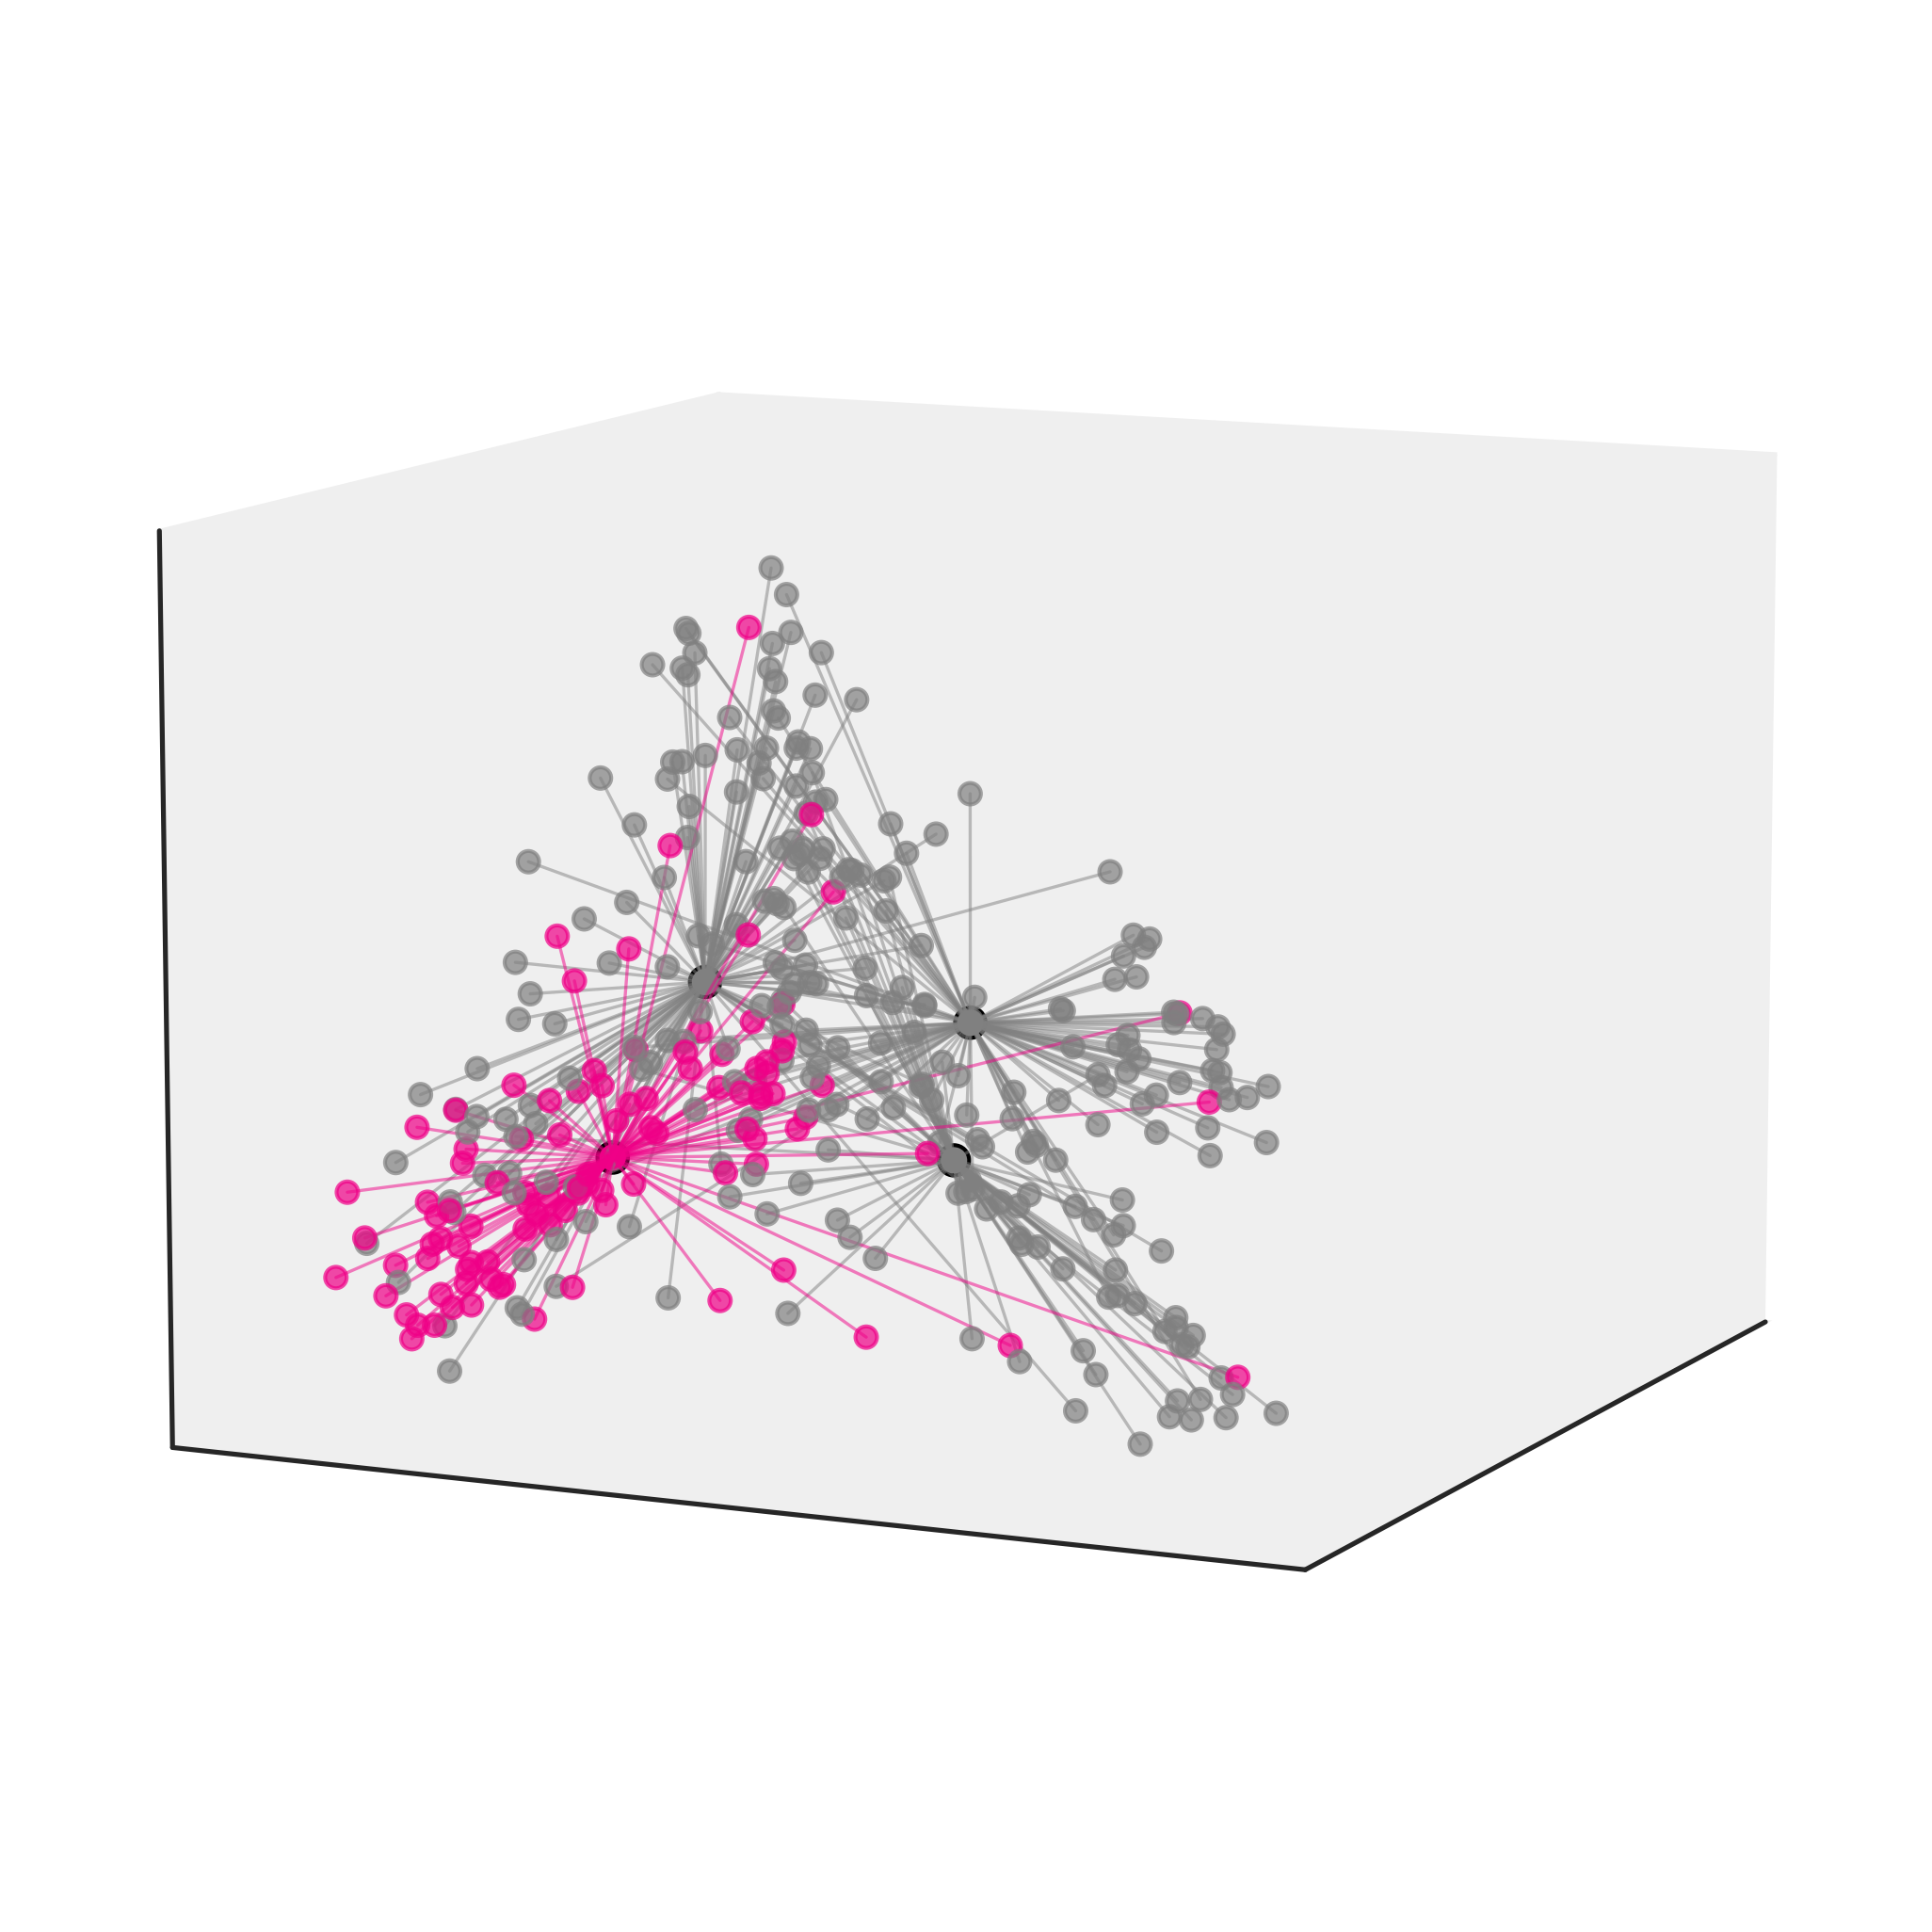

In [17]:
within_network_dispersion(process_gradients(1, 'suppress', gradient_type='rsa'), None, noise_level=0.005)

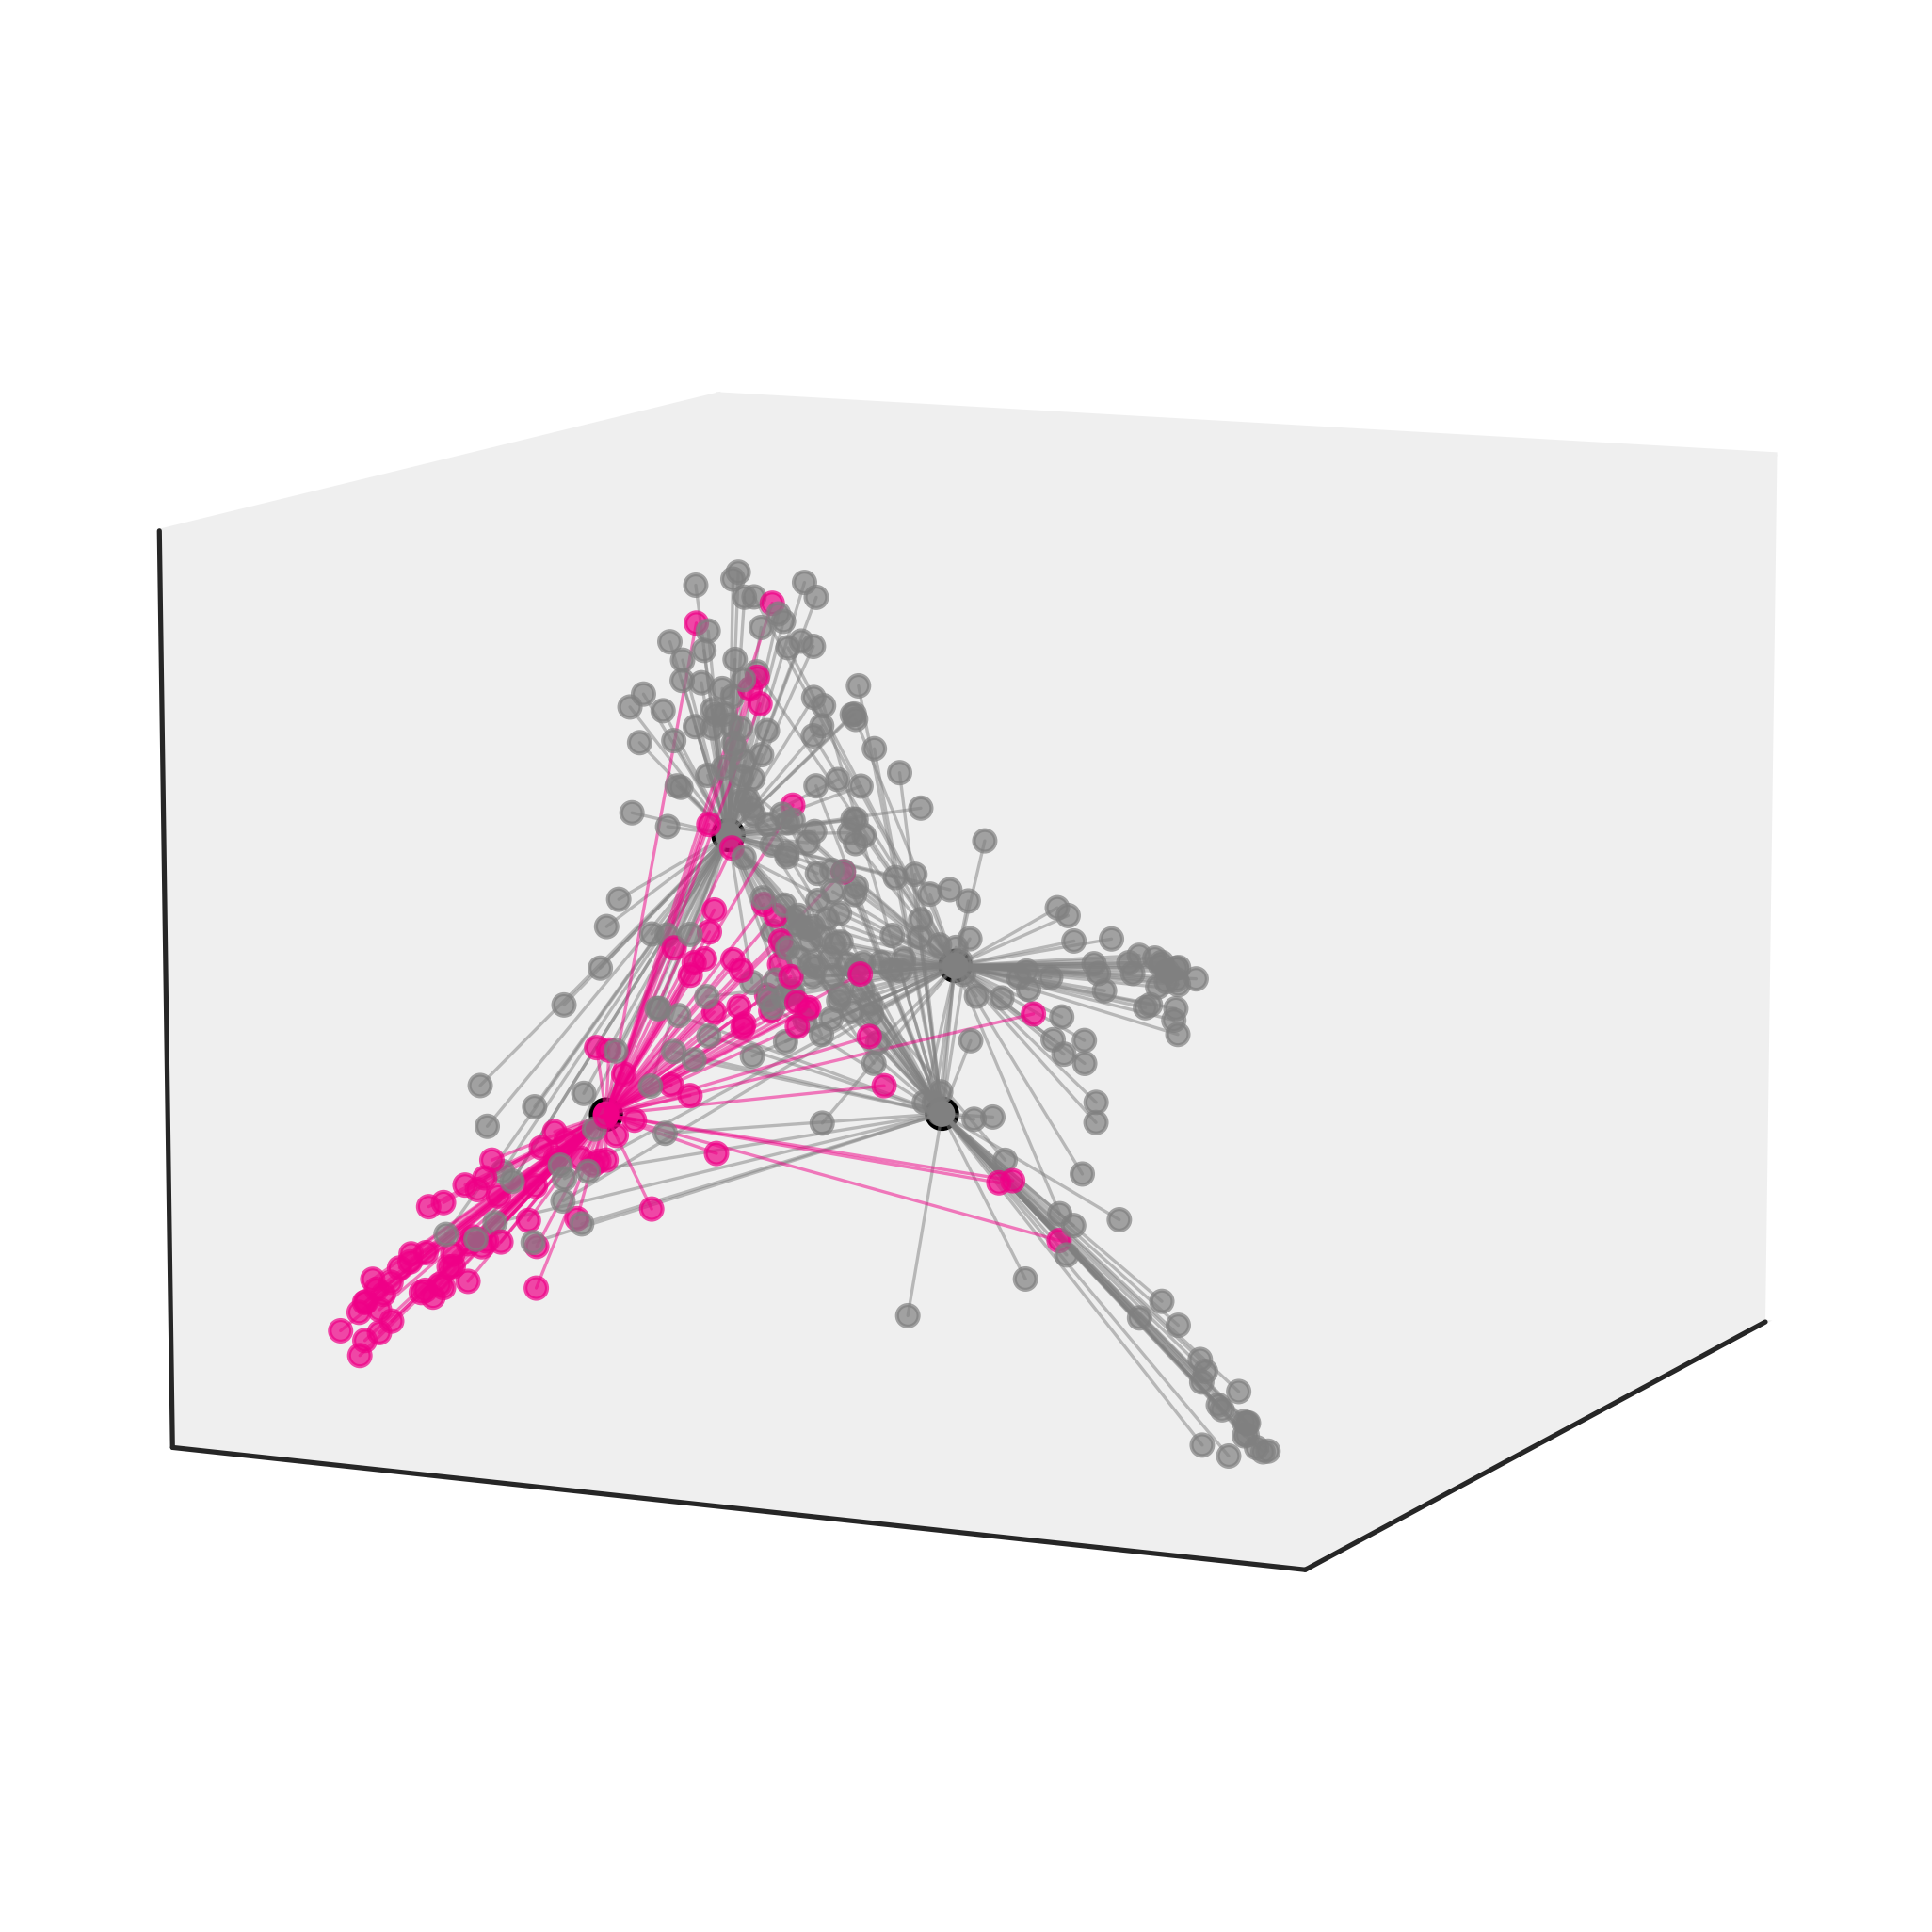

In [18]:
within_network_dispersion(process_gradients(12, 'suppress', gradient_type='rsa'), None, noise_level=0)

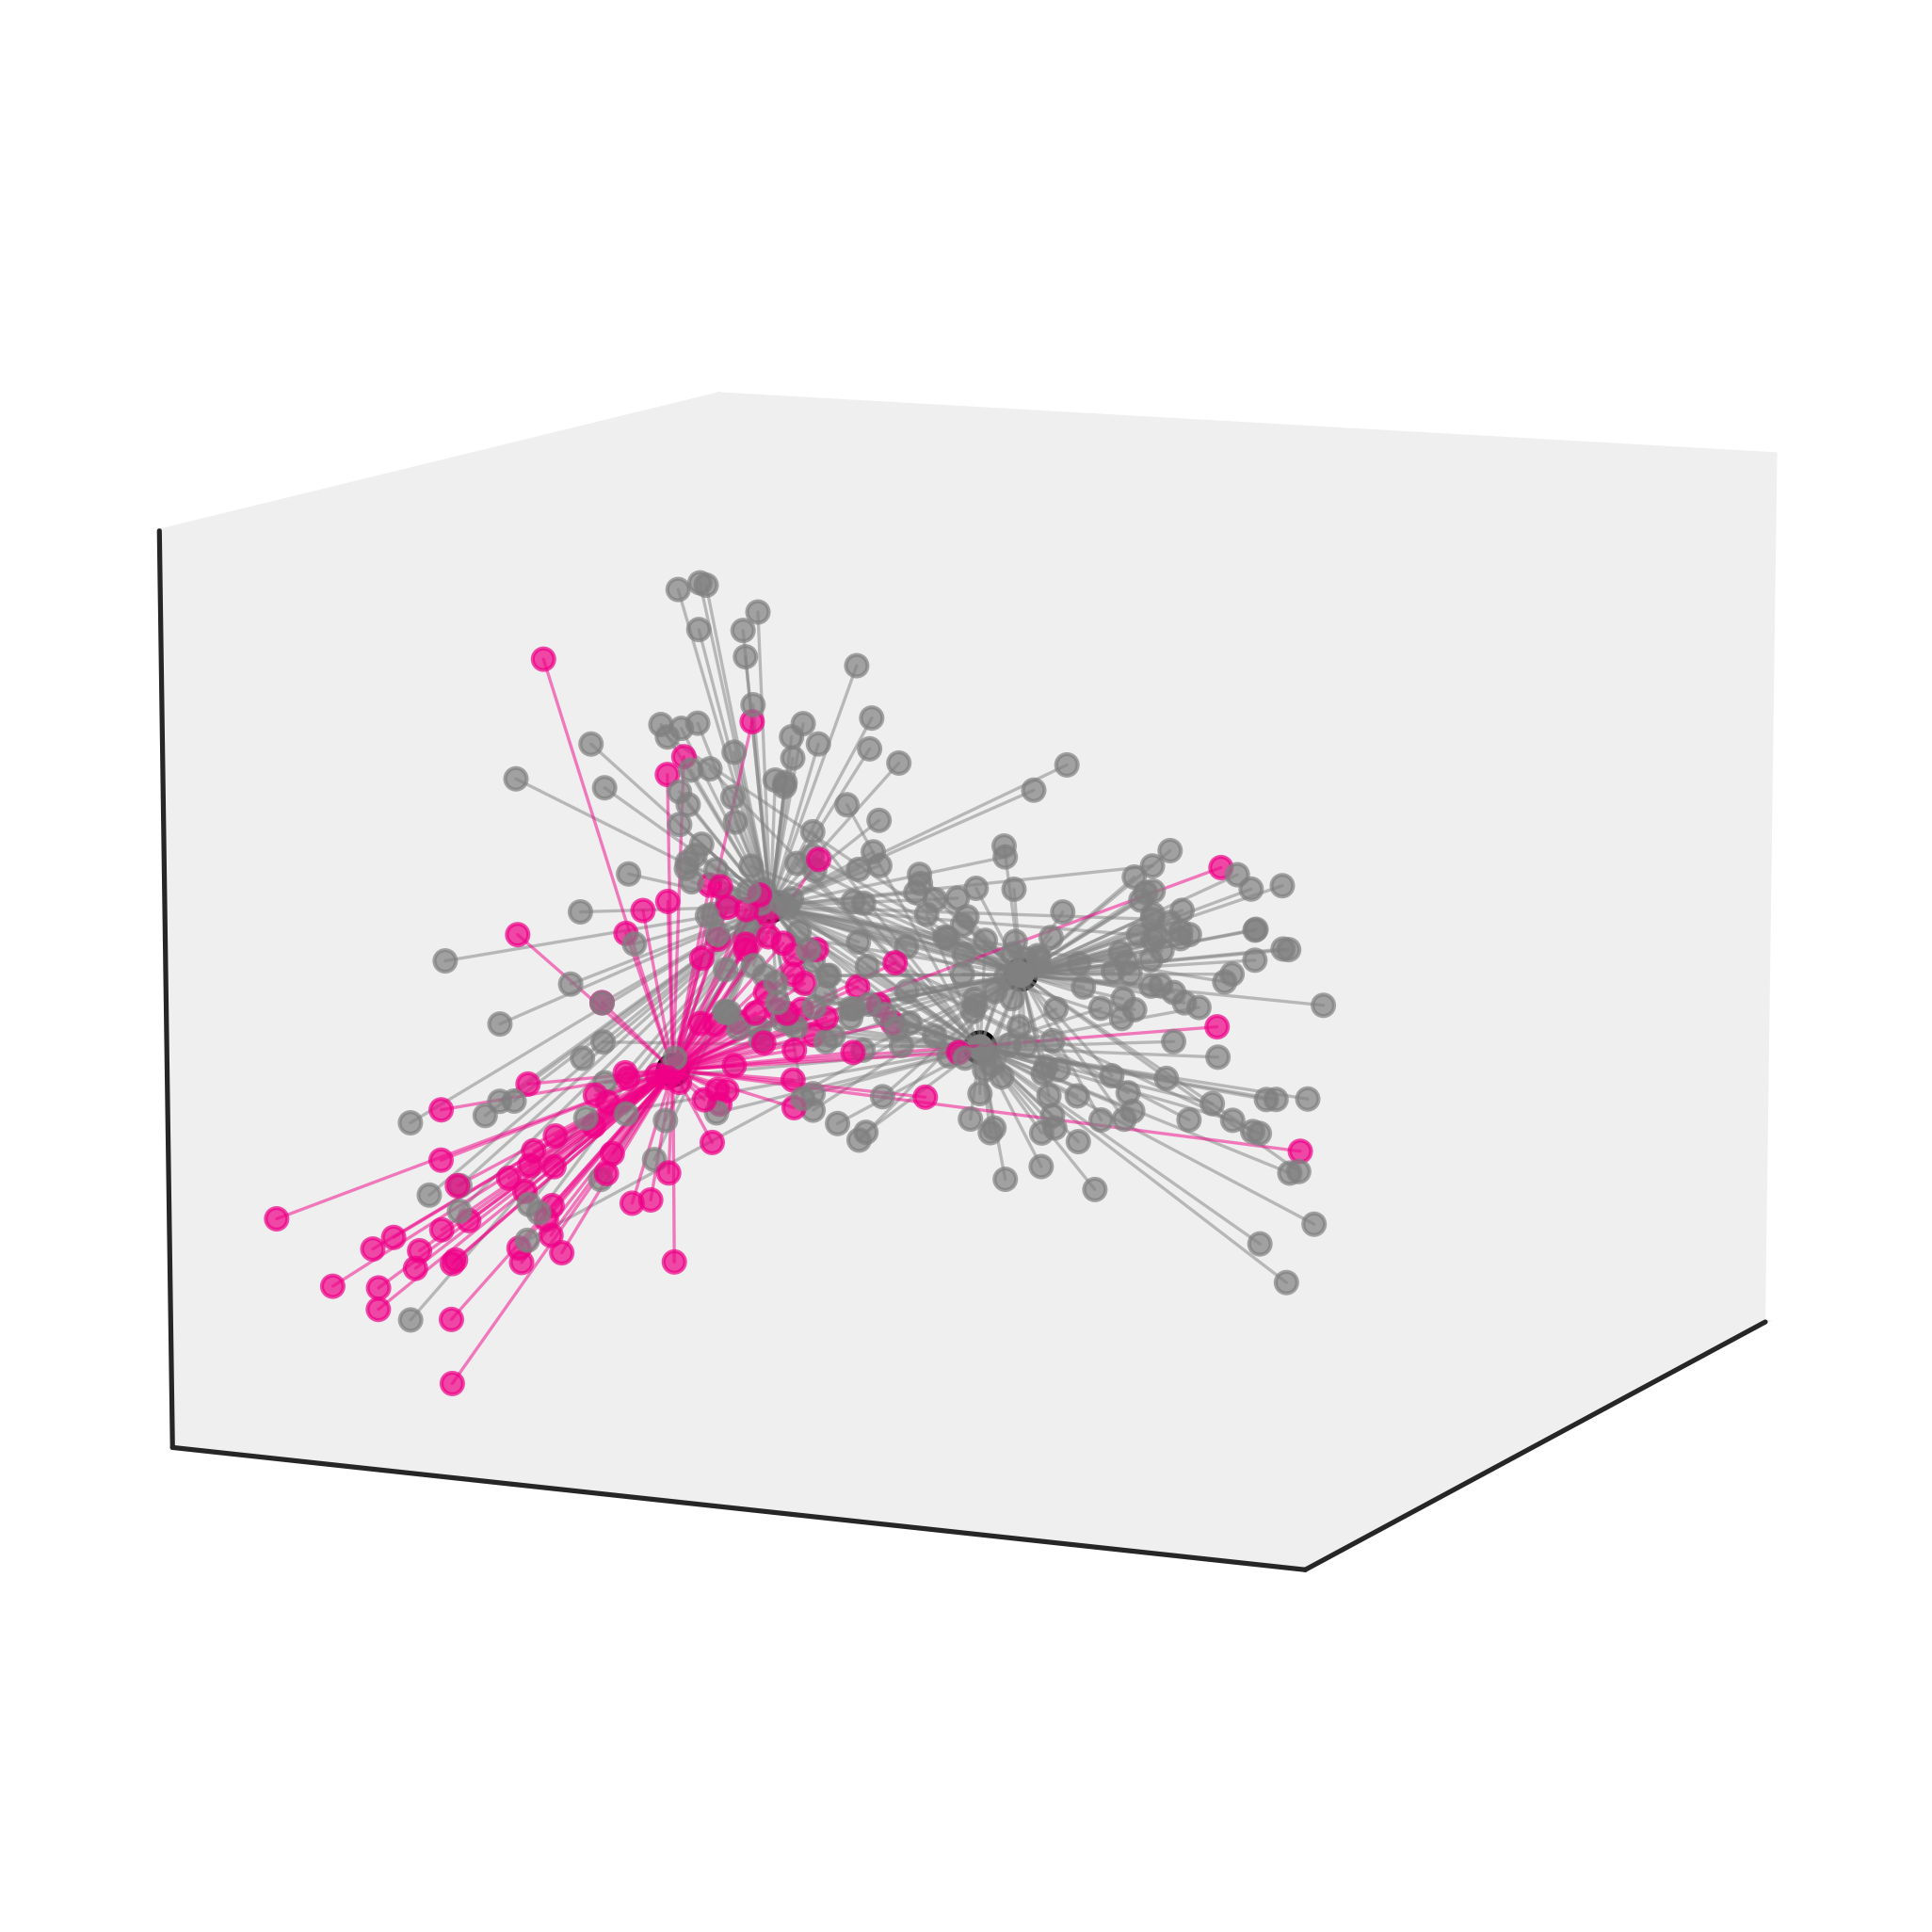

In [19]:
within_network_dispersion(process_gradients(1, 'maintain', gradient_type='rsa'), None, noise_level=0.008)

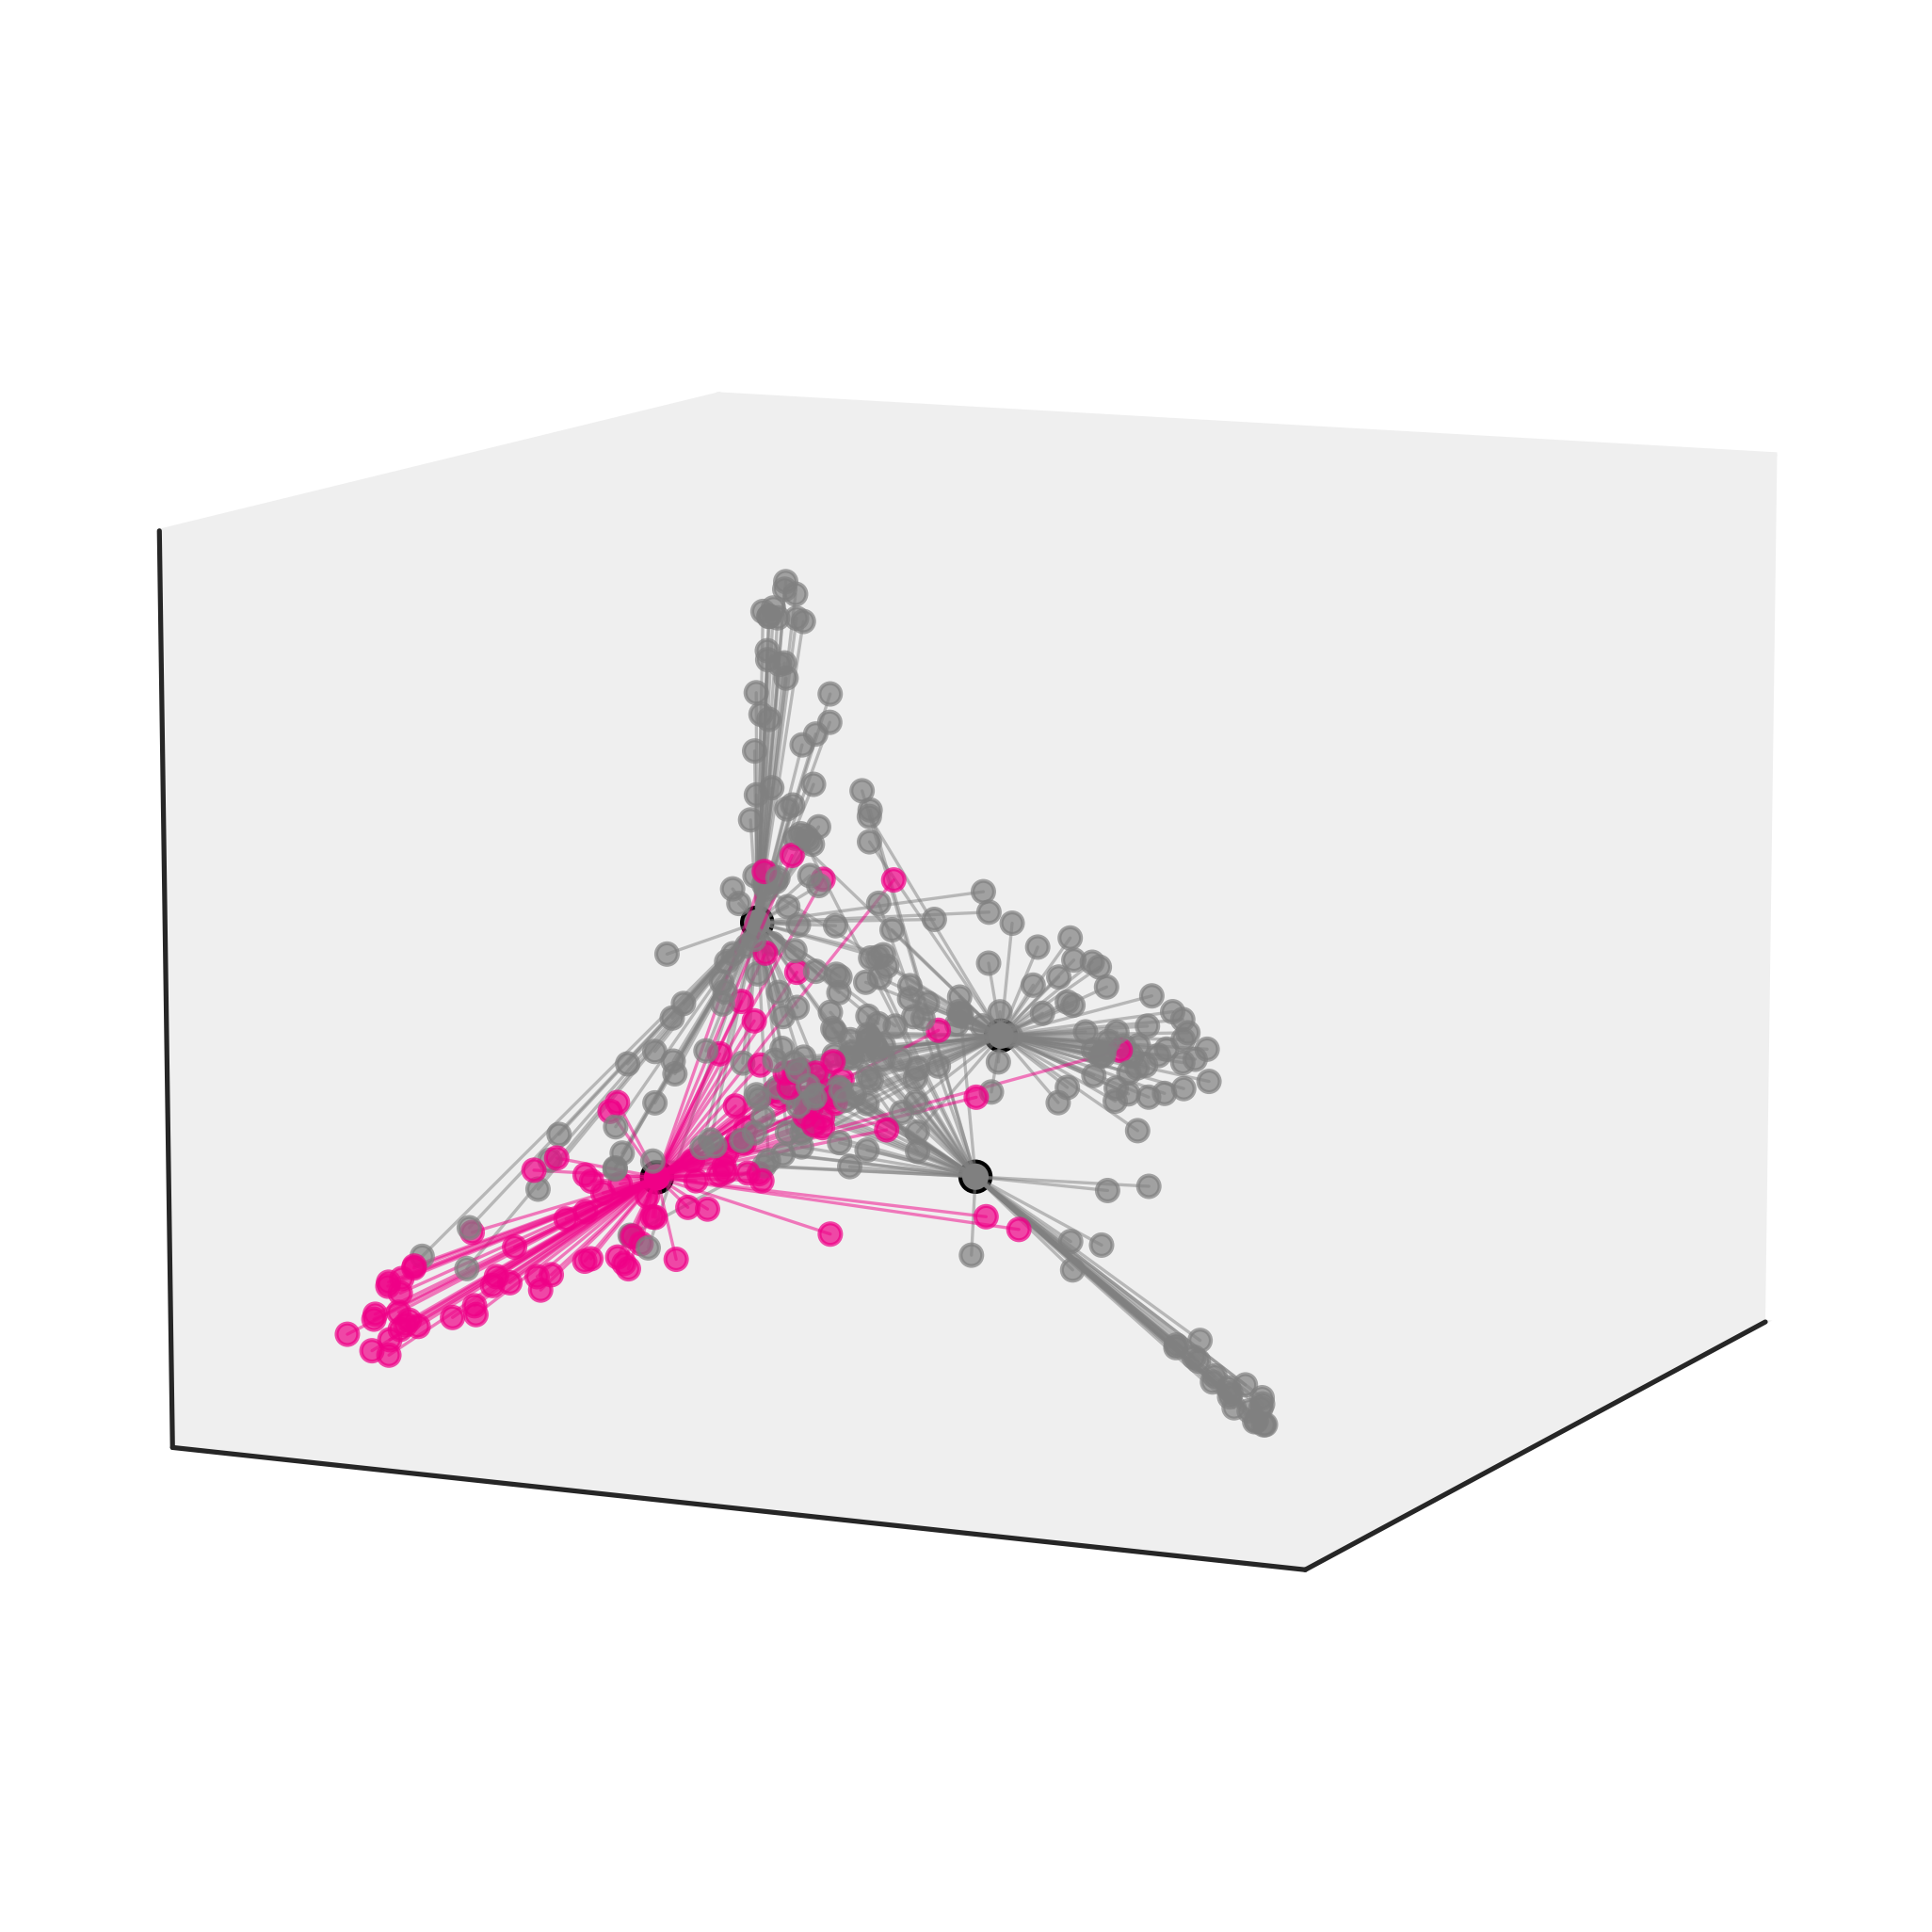

In [20]:
within_network_dispersion(process_gradients(12, 'maintain', gradient_type='rsa'), None, noise_level=0)

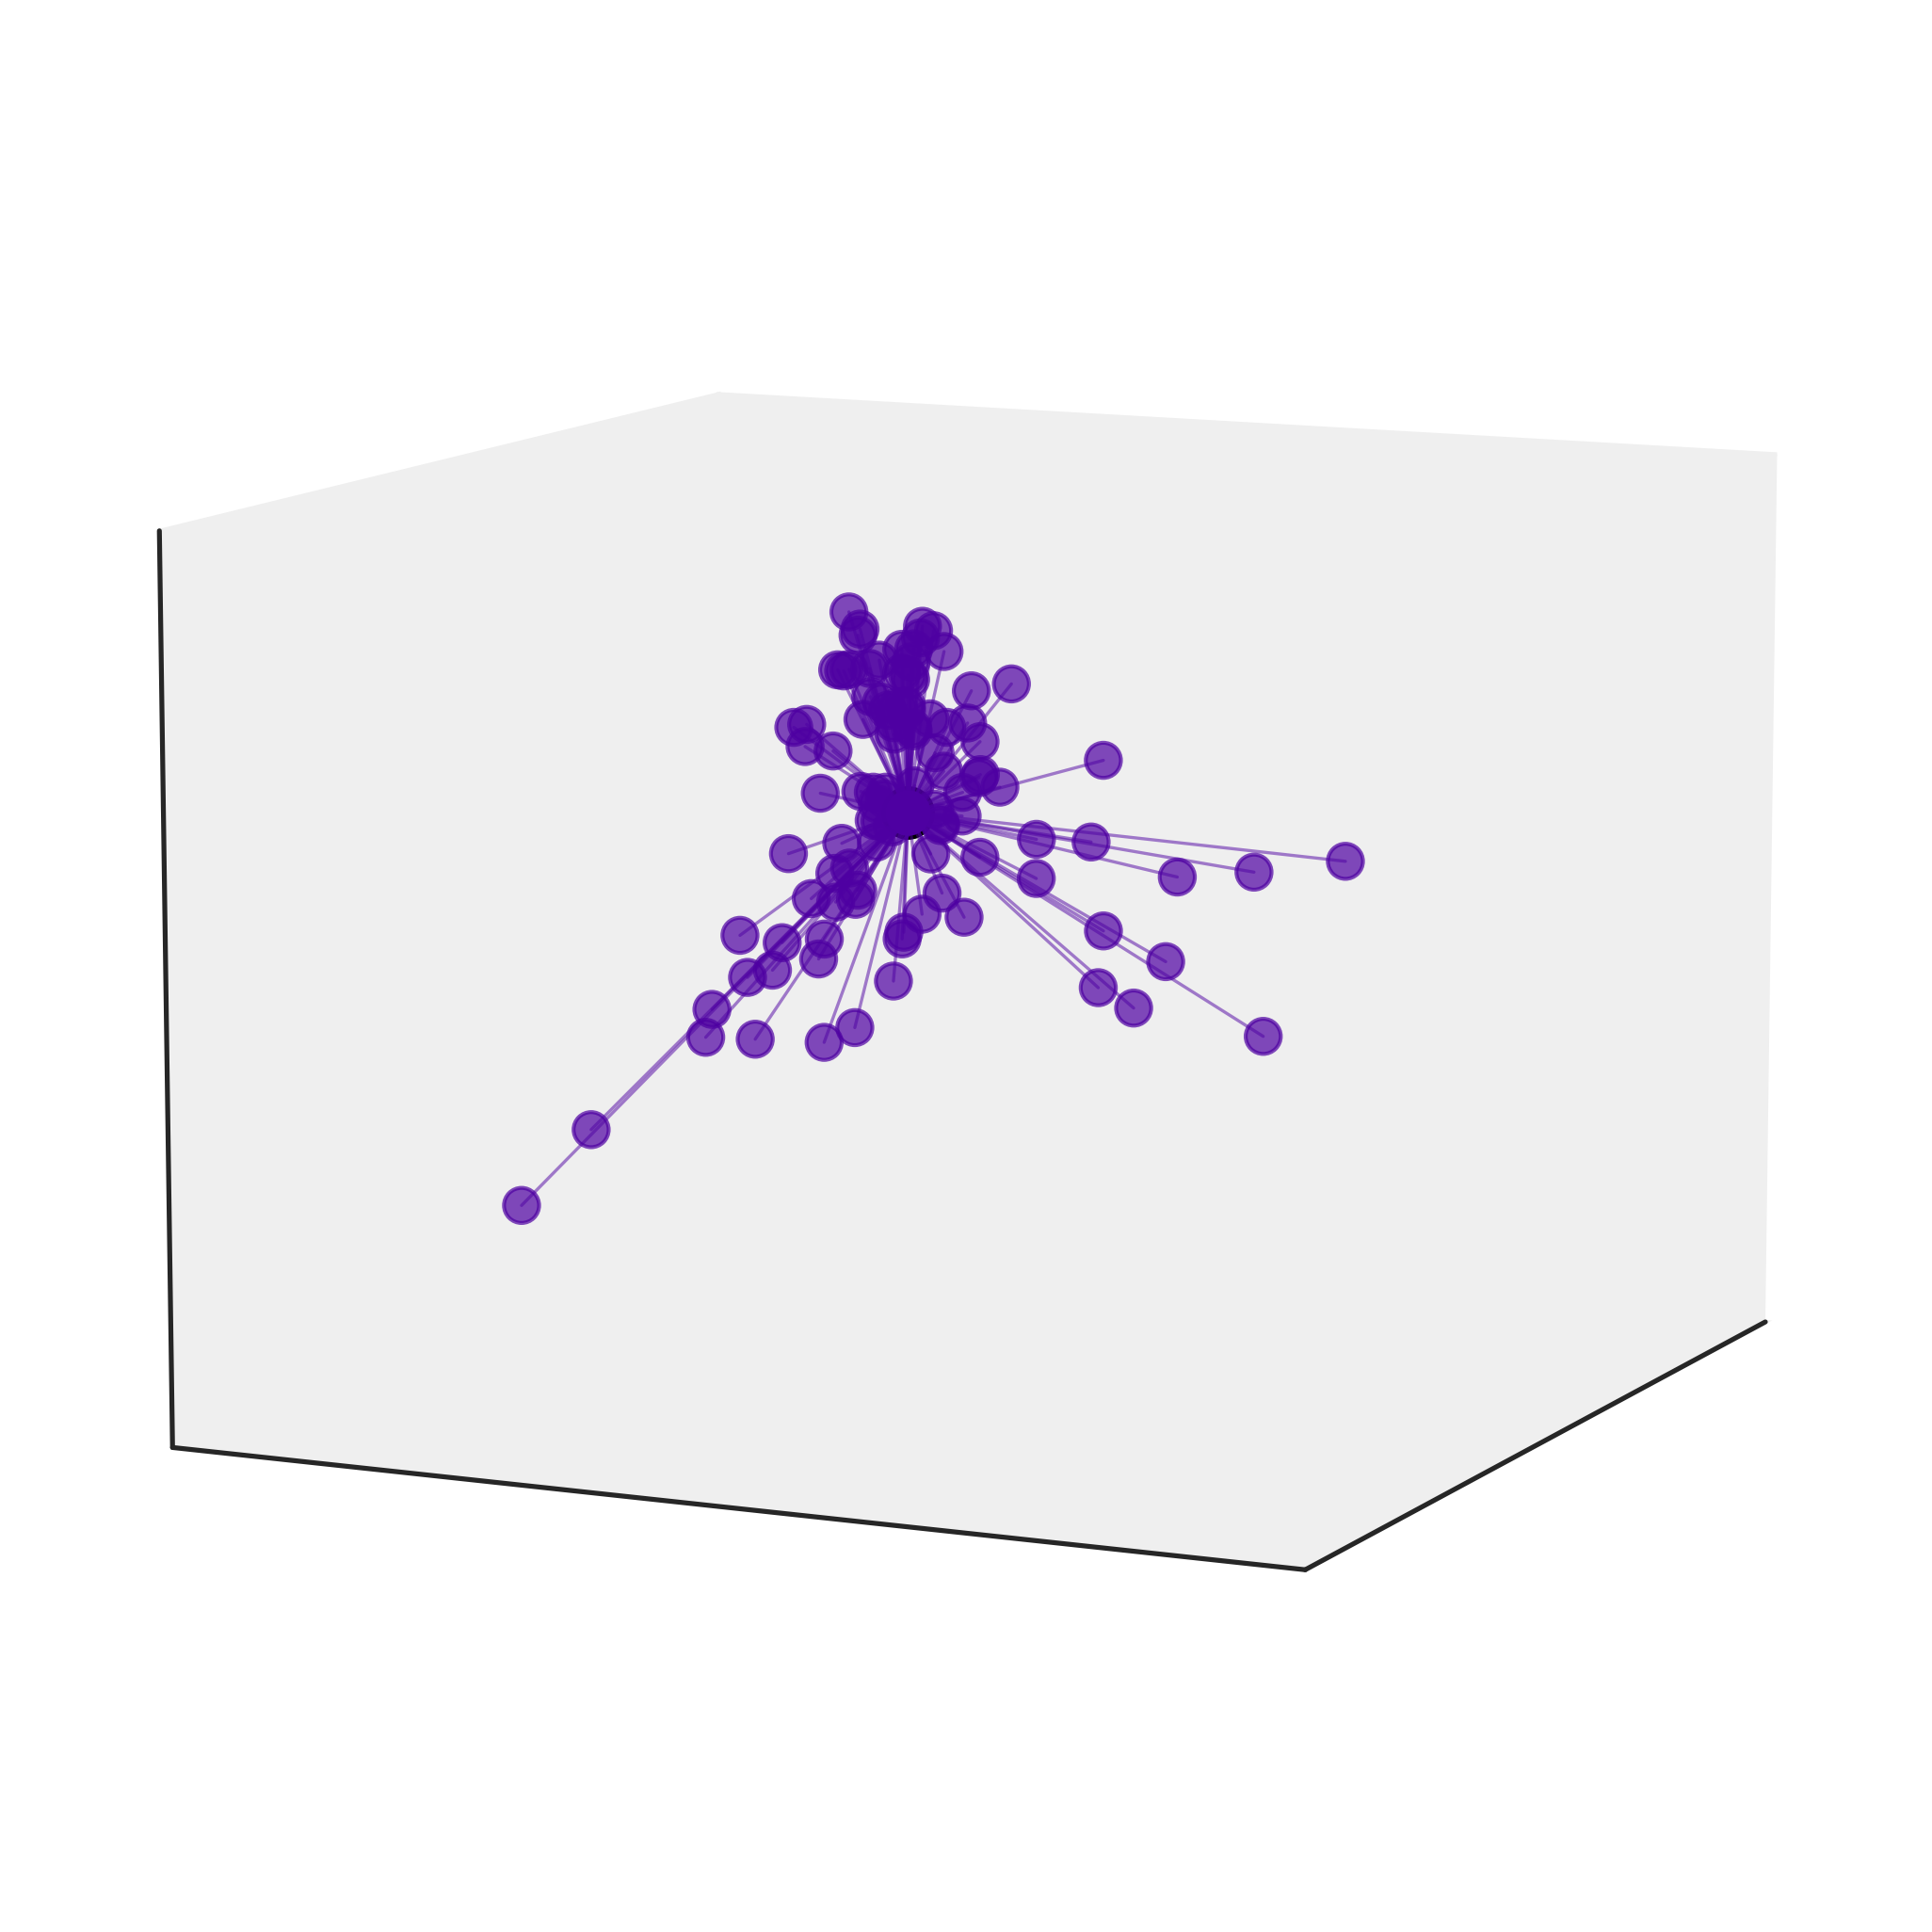

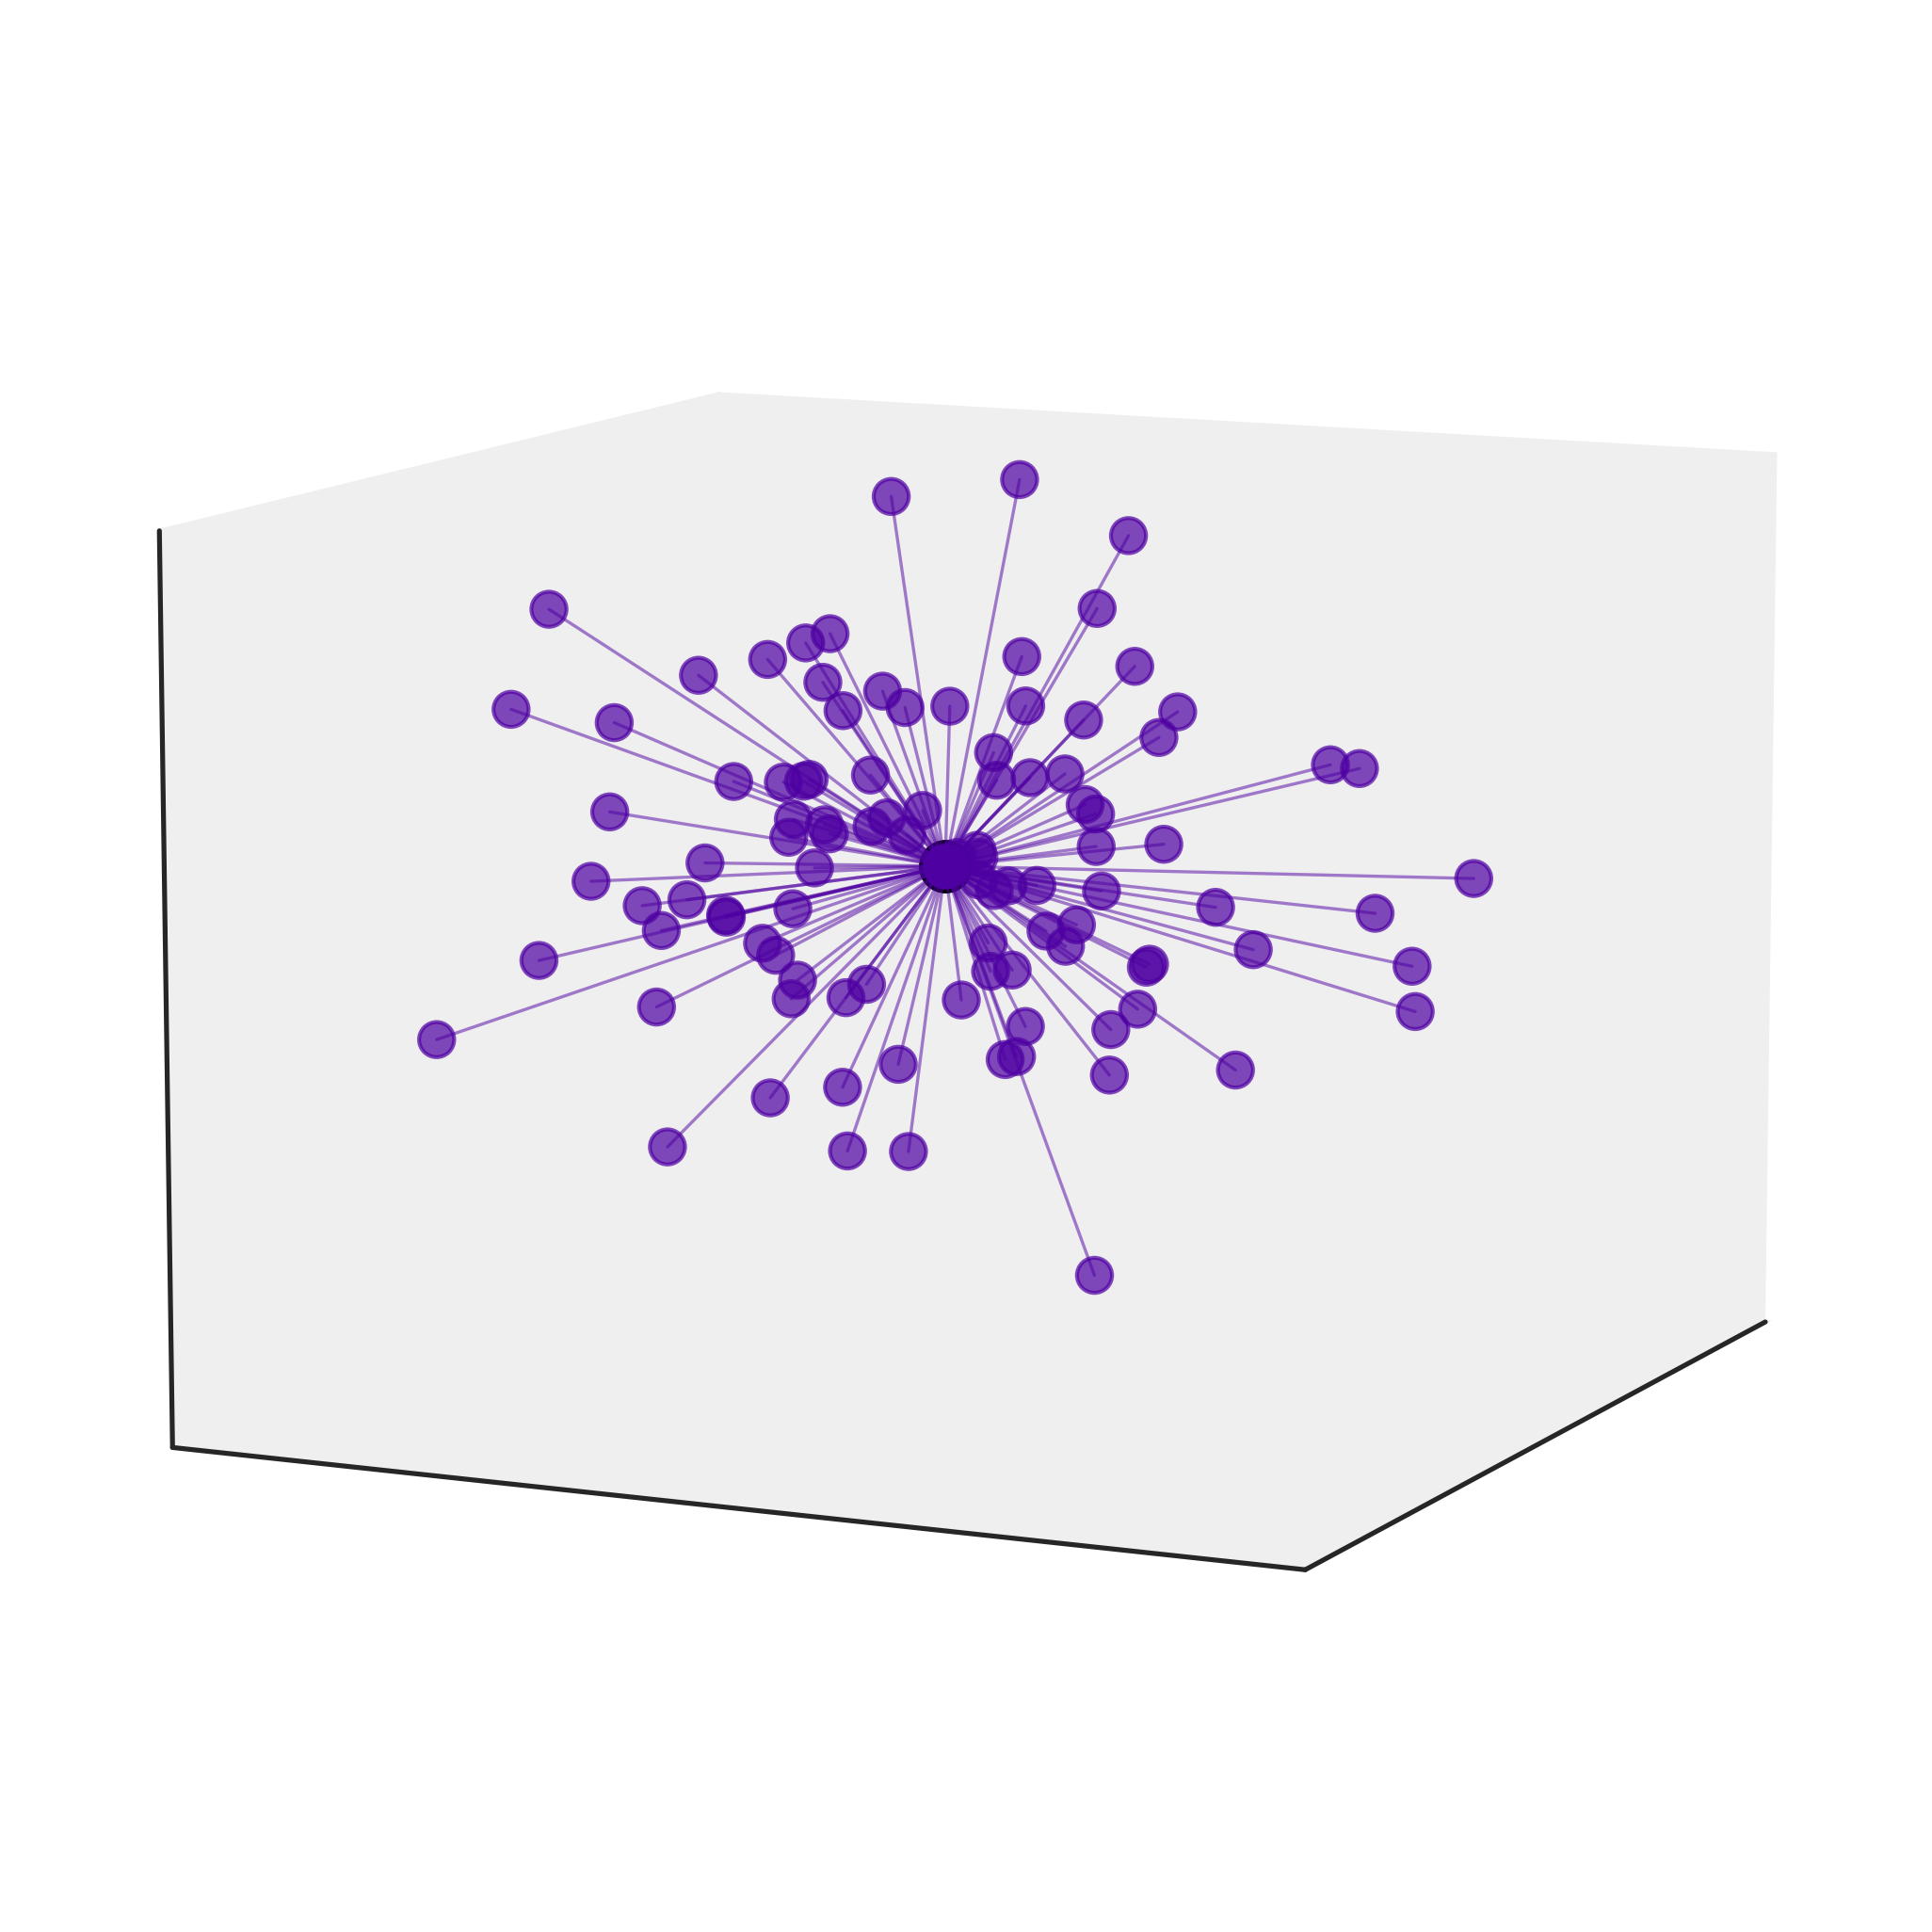

In [33]:
def within_network_dispersion(grad, center, max_spread, outpath=None, sub=None, noise_level=0.0):
    fpcn_color = '#4E00A2'  # FPCN color
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Adjust gradients by subtracting the global center
    centered_grad = grad.copy()
    centered_grad.iloc[:, 1] -= center[0]
    centered_grad.iloc[:, 2] -= center[1]
    centered_grad.iloc[:, 3] -= center[2]

    # Get indices and coordinates for FPCN only
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    fpcn_mds = pd.DataFrame(centered_grad.iloc[:, 1:]).T[fpcn_index].T

    # Calculate FPCN mean coordinates for line plotting
    fpcn_des = fpcn_mds.describe().T[['mean']]
    fpcn_mean = np.array([fpcn_des['mean'][0], fpcn_des['mean'][1], fpcn_des['mean'][2]])

    # Generate noise for FPCN points if needed
    noisy_grad = centered_grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, centered_grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, centered_grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, centered_grad.shape[0])

    # Define FPCN points with noise
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values

    # Expand axis limits to accommodate noise
    expanded_spread = max_spread + 2 * noise_level
    ax.set_xlim([-expanded_spread / 2, expanded_spread / 2])
    ax.set_ylim([-expanded_spread / 2, expanded_spread / 2])
    ax.set_zlim([-expanded_spread / 2, expanded_spread / 2])

    # Plot lines from FPCN parcels to FPCN mean
    for coord in fpcn_coords:
        line = np.array([coord, fpcn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], c=fpcn_color, alpha=0.5, lw=0.8)

    # Scatter plot for FPCN points
    ax.scatter(fpcn_coords[:, 0], fpcn_coords[:, 1], fpcn_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)
    
    # Plot the FPCN mean
    ax.scatter(fpcn_mean[0], fpcn_mean[1], fpcn_mean[2], s=160, c=fpcn_color, alpha=1, edgecolors='black')

    # Remove tick labels and turn off axes visibility
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    ax.view_init(10, 205)

    # Remove colored axes planes for clarity
    pane_rgba = (239/255, 239/255, 239/255, 1)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)
    
    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}_{sub}_sub_dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)

    
# Load and process gradients for both subjects
grad_53 = process_gradients(35, 'suppress', gradient_type='rsa')
grad_46 = process_gradients(46, 'suppress', gradient_type='rsa')

# Compute global center and max spread based on multiple subjects
def get_center_and_max_spread(subjects_grads):
    # Stack all coordinates from each subject gradient
    all_coords = np.vstack([grad.iloc[:, 1:4].values for grad in subjects_grads])
    # Calculate the mean center of all points
    center = all_coords.mean(axis=0)
    
    # Calculate the spread in each dimension and take the maximum
    x_spread = all_coords[:, 0].max() - all_coords[:, 0].min()
    y_spread = all_coords[:, 1].max() - all_coords[:, 1].min()
    z_spread = all_coords[:, 2].max() - all_coords[:, 2].min()
    max_spread = max(x_spread, y_spread, z_spread)
    
    return center, max_spread

# Get global center and maximum spread
center, max_spread = get_center_and_max_spread([grad_53, grad_46])

outpath = '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/sub'
# Plot both subjects in the same space, centered at origin
within_network_dispersion(grad_53, center, max_spread, outpath, "low", noise_level=0)
within_network_dispersion(grad_46, center, max_spread, outpath, "high", noise_level=0.04)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import seaborn as sns
import pandas as pd

def within_network_dispersion(grad, outpath=None, noise_level=0.0):
    global df1 
    fpcn_color = '#4E00A2'  # FPCN color
    sns.set(style='white', rc={'figure.figsize':(10,7)})

    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # Get indices and coordinates for FPCN only
    fpcn_index = df1[df1['Subtype'] == 3].index.to_list()
    fpcn_mds = pd.DataFrame(grad.iloc[:, 1:]).T[fpcn_index].T

    # Calculate FPCN mean coordinates for line plotting
    fpcn_des = fpcn_mds.describe().T[['mean']]
    fpcn_mean = np.array([fpcn_des['mean'][0], fpcn_des['mean'][1], fpcn_des['mean'][2]])

    # Generate noise for FPCN points if needed
    noisy_grad = grad.copy()
    noisy_grad.iloc[:, 1] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 2] += np.random.normal(0, noise_level, grad.shape[0])
    noisy_grad.iloc[:, 3] += np.random.normal(0, noise_level, grad.shape[0])

    # Define FPCN points with noise
    fpcn_coords = noisy_grad.iloc[fpcn_index, 1:4].values

    # Set axis limits based only on FPCN coordinates
    x_lim = [fpcn_coords[:, 0].min(), fpcn_coords[:, 0].max()]
    y_lim = [fpcn_coords[:, 1].min(), fpcn_coords[:, 1].max()]
    z_lim = [fpcn_coords[:, 2].min(), fpcn_coords[:, 2].max()]
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)

    # Plot lines from FPCN parcels to FPCN mean
    for coord in fpcn_coords:
        line = np.array([coord, fpcn_mean])
        ax.plot(line[:,0], line[:,1], line[:,2], c=fpcn_color, alpha=0.5, lw=0.8)

    # Scatter plot for FPCN points
    ax.scatter(fpcn_coords[:, 0], fpcn_coords[:, 1], fpcn_coords[:, 2], s=80, c=fpcn_color, alpha=0.7)
    
    # Plot the FPCN mean
    ax.scatter(fpcn_mean[0], fpcn_mean[1], fpcn_mean[2], s=160, c=fpcn_color, alpha=1, edgecolors='black')

    # Remove tick labels and turn off axes visibility
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()  # Turns off the axes, removing all spines and borders

    ax.view_init(10, 205)

    # Remove colored axes planes for clarity
    pane_rgba = (239/255, 239/255, 239/255, 1)
    ax.w_xaxis.set_pane_color(pane_rgba)
    ax.w_yaxis.set_pane_color(pane_rgba)
    ax.w_zaxis.set_pane_color(pane_rgba)
    
    #ax.grid(False)
    

    plt.draw()
    plt.tight_layout()

    if outpath is not None:
        plt.show()
        fig.savefig(f'{outpath}_sub_dispersion_gradient_net_fpcn.png', dpi=300, transparent=True)

In [ ]:
within_network_dispersion(process_gradients(21, 'maintain', gradient_type='rsa'), None, noise_level=0)

In [ ]:
within_network_dispersion(process_gradients(34, 'suppress', gradient_type='rsa'), None, noise_level=0)

In [ ]:
dont_run = '''
for i,j in zip([sub1_main, sub1_replace, sub1_suppress, sub1_clear], 
               ['main', 'replace', 'suppress', 'clear']):
    
    arry = np.array(i.iloc[:, 1:])

    x = arry[:, 0]
    y = arry[:, 1]
    z = arry[:, 2]

    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    fig = plt.figure(figsize=(9.5, 5.5))

    ax1 = fig.add_subplot(121)
    ax1.set_facecolor((239/255, 239/255, 239/255))
    ax1.scatter(x, y, alpha=0.8, c=y, cmap='jet')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_title('Parcels Colored by Gradient', fontweight='bold', loc='left', fontname='Arial')
    ax1.set_xlabel('Gradient 1', fontweight='bold', fontname='Arial')
    ax1.set_ylabel('Gradient 2', fontweight='bold', fontname='Arial')
    ax1.set_xticks([min(x), max(x)])
    ax1.set_yticks([min(y), max(y)])

    ax2 = fig.add_subplot(122)
    ax2.set_facecolor((239/255, 239/255, 239/255))
    ax2.scatter(x, y, alpha=0.8, c=colors, cmap='jet')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_title('Parcels Colored by Network', fontweight='bold', loc='left', fontname='Arial')
    ax2.set_xlabel('Gradient 1', fontweight='bold', fontname='Arial')
    ax2.set_ylabel('Gradient 2', fontweight='bold', fontname='Arial')
    ax2.set_xticks([min(x), max(x)])
    ax2.set_yticks([min(y), max(y)])

    fig.tight_layout()

    fig.savefig(f'/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/gradient_axes/sub/sub1_{j}_grad_axes.png', dpi=700)
'''

In [ ]:
dont_run = '''
outpath= '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/network_dispersion/subj/sub1/'

for i,j in zip([sub1_main,sub1_replace,sub1_suppress,sub1_clear],
               ['main_networks','replace_networks','suppress_networks','clear_networks']): 
               grad3d(i, outpath+j)
    
for i,j in zip([sub1_main,sub1_replace,sub1_suppress,sub1_clear],
       ['main_networks_disp','replace_networks_disp','suppress_networks_disp','clear_networks_disp']): 
               network_dispersion(i,outpath+j)
'''

In [ ]:
dont_run = '''
outpath= '/pl/active/banich/studies/wmem/fmri/operation_rsa/grp/gradients/analysis/network_dispersion/subj/sub12/'

for i,j in zip([sub12_main,sub12_replace,sub12_suppress,sub12_clear],
               ['main_networks','replace_networks','suppress_networks','clear_networks']): 
               grad3d(i, outpath+j)
    
for i,j in zip([sub12_main,sub12_replace,sub12_suppress,sub12_clear],
               ['main_networks_disp','replace_networks_disp','suppress_networks_disp','clear_networks_disp']): 
               network_dispersion(i,outpath+j)
'''

In [ ]:
def mah_cent_dist(data, sub, op):
    
    data_sub = (data
                .query('sub =='+str(sub))[['sub', 'gradient', op]].reset_index()
                .pivot(index=['index', 'sub'], columns='gradient', values=op)
               ).reset_index()
   
    from scipy.spatial.distance import mahalanobis

    # Generate a random data frame with 95 rows and 3 columns
    df = data_sub.iloc[:, 2:]

    # Calculate the mean vector for each column
    mu = df.mean()

    cov = df.cov()
    # Calculate the inverse of the covariance matrix
    inv_cov = np.linalg.inv(cov)

    # Calculate the pairwise Mahalanobis distance between each row and the mean vector
    distances = []
    for index, row in df.iterrows():
        distance = mahalanobis(row, mu, inv_cov)
        distances.append(distance)

    # Convert the distances list to a pandas series and add it as a new column to the data frame
    df['md'] = pd.DataFrame(distances, index=df.index)
    df = df.assign(op = op, sub=sub, parcel=data_sub['index'])
    df = df.assign(cent_mah_md = df['op'] +'_'+ df['parcel'].astype(str) + '_md')
    df = df[['cent_mah_md', 'sub', 'op', 'md']]
    return df


def mah_dist(data, sub, op, parcels, network):
    
    data_sub = (data
                .query('sub =='+str(sub))[['sub', 'gradient', op]].reset_index()
                .pivot(index=['index', 'sub'], columns='gradient', values=op)
               ).reset_index().iloc[parcels]
   
    from scipy.spatial.distance import mahalanobis

    # Generate a random data frame with 95 rows and 3 columns
    df = data_sub.iloc[:, 2:]

    # Calculate the mean vector for each column
    mu = df.mean()

    cov = df.cov()
    # Calculate the inverse of the covariance matrix
    inv_cov = np.linalg.inv(cov)

    # Calculate the pairwise Mahalanobis distance between each row and the mean vector
    distances = []
    for index, row in df.iterrows():
        distance = mahalanobis(row, mu, inv_cov)
        distances.append(distance)

    # Convert the distances list to a pandas series and add it as a new column to the data frame
    df['md'] = pd.DataFrame(distances, index=df.index)
    df['md'] = df['md']*-1
    df = df.assign(op = op, sub=sub, parcel=data_sub['index'], net=network)
    df = df.assign(net_mah_md = df['op'] +'_'+ df['parcel'].astype(str) + '_md_'+df['net'])
    df = df[['net_mah_md', 'parcel', 'sub', 'op', 'md']]
    return df

In [ ]:
#!jupyter nbconvert --to script gradient_network_plots.ipynb